# <u> An Analysis of Beer, Beer Styles, and Breweries</u>  <a id='top'></a>
## by Carl Smith

#### Table of Contents:  
<ul>
    
<li><a href="#pre_wrangling">Preliminary Wrangling</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#exports">Data Exports</a></li>

-------

<a id='pre_wrangling'></a>
## <u> Preliminary Wrangling</u>  <a href="#top" style="font-size :12px">(Back to top)</a>

This analysis will be exploring a dataset of about 1.5 million beer reviews from [BeerAdvocate](https://data.world/socialmediadata/beeradvocate). In addition, the database/API called [Open Brewery DB](https://www.openbrewerydb.org/) is also used for more detailed brewery data. 

A few notes about the dataset:    
- Each row contains one unique review from one unique reviewer. Each beer can have more than one review from the same reviewer or a different reviewer.     
- Some key column definitions: 
    - `weighted_review`: engineered variable that calculates a weighted average of all 5 review categories. This is the primary review score that is listed on BeerAdvocate's website. Each weight is defined by BeerAdvocate as 20%, 24%, 6%, 10% and 40% respectively to the following review categories.    
    - `review_overall`: overall review score given for overall impression of the beer. 
    - `review_aroma`: review score given for any malt, hops, yeast, and other aromatics present in the beer.
    - `review_appearance`: review score given for the beer's color, clarity, head retention, and lacing. 
    - `review_palate`: review score given for the beer's body, carbonation, warmth, creaminess, astringency and other palate sensations. 
    - `review_taste`: review score given for any malt, hops, fermentation byproducts, balance, finish or aftertaste and other flavor characteristics.
    

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [40]:
beer_df = pd.read_csv('data/raw/master_dataset_beer_reviews.csv')
beer_df

brewery_id                 brewery_name  review_time  review_overall  \
0             10325              Vecchio Birraio   1234817823             1.5   
1             10325              Vecchio Birraio   1235915097             3.0   
2             10325              Vecchio Birraio   1235916604             3.0   
3             10325              Vecchio Birraio   1234725145             3.0   
4              1075      Caldera Brewing Company   1293735206             4.0   
...             ...                          ...          ...             ...   
1586609       14359  The Defiant Brewing Company   1162684892             5.0   
1586610       14359  The Defiant Brewing Company   1161048566             4.0   
1586611       14359  The Defiant Brewing Company   1160702513             4.5   
1586612       14359  The Defiant Brewing Company   1160023044             4.0   
1586613       14359  The Defiant Brewing Company   1160005319             5.0   

         review_aroma  review_appearance review_profilename  \
0                 2.0                2.5            stcules   
1                 2.5                3.0            stcules   
2                 2.5                3.0            stcules   
3                 3.0                3.5            stcules   
4                 4.5                4.0     johnmichaelsen   
...               ...                ...                ...   
1586609           4.0                3.5         maddogruss   
1586610           5.0                2.5          yelterdow   
1586611           3.5                3.0           TongoRad   
1586612           4.5                4.5           dherling   
1586613           4.5                4.5               cbl2   

                             beer_style  review_palate  review_taste  \
0                            Hefeweizen            1.5           1.5   
1                    English Strong Ale            3.0           3.0   
2                Foreign / Export Stout            3.0           3.0   
3                       German Pilsener            2.5           3.0   
4        American Double / Imperial IPA            4.0           4.5   
...                                 ...            ...           ...   
1586609                     Pumpkin Ale            4.0           4.0   
1586610                     Pumpkin Ale            2.0           4.0   
1586611                     Pumpkin Ale            3.5           4.0   
1586612                     Pumpkin Ale            4.5           4.5   
1586613                     Pumpkin Ale            4.5           4.5   

                      beer_name  beer_abv  beer_beerid  
0                  Sausa Weizen       5.0        47986  
1                      Red Moon       6.2        48213  
2        Black Horse Black Beer       6.5        48215  
3                    Sausa Pils       5.0        47969  
4                 Cauldron DIPA       7.7        64883  
...                         ...       ...          ...  
1586609      The Horseman's Ale       5.2        33061  
1586610      The Horseman's Ale       5.2        33061  
1586611      The Horseman's Ale       5.2        33061  
1586612      The Horseman's Ale       5.2        33061  
1586613      The Horseman's Ale       5.2        33061  

[1586614 rows x 13 columns]

In [41]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


> Let's clean up our dataframe a bit, by removing some unwanted columns and dealing with missing values. 

In [42]:
# remove unwanted columns, and rearrange some columns. 
beer_df_clean = beer_df.drop(columns=['review_time'])
beer_df_clean = beer_df_clean[['brewery_id', 'brewery_name', 'beer_beerid', 'beer_name', 'beer_style', 'beer_abv', 
                              'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
                              'review_profilename']]
beer_df_clean

brewery_id                 brewery_name  beer_beerid  \
0             10325              Vecchio Birraio        47986   
1             10325              Vecchio Birraio        48213   
2             10325              Vecchio Birraio        48215   
3             10325              Vecchio Birraio        47969   
4              1075      Caldera Brewing Company        64883   
...             ...                          ...          ...   
1586609       14359  The Defiant Brewing Company        33061   
1586610       14359  The Defiant Brewing Company        33061   
1586611       14359  The Defiant Brewing Company        33061   
1586612       14359  The Defiant Brewing Company        33061   
1586613       14359  The Defiant Brewing Company        33061   

                      beer_name                      beer_style  beer_abv  \
0                  Sausa Weizen                      Hefeweizen       5.0   
1                      Red Moon              English Strong Ale       6.2   
2        Black Horse Black Beer          Foreign / Export Stout       6.5   
3                    Sausa Pils                 German Pilsener       5.0   
4                 Cauldron DIPA  American Double / Imperial IPA       7.7   
...                         ...                             ...       ...   
1586609      The Horseman's Ale                     Pumpkin Ale       5.2   
1586610      The Horseman's Ale                     Pumpkin Ale       5.2   
1586611      The Horseman's Ale                     Pumpkin Ale       5.2   
1586612      The Horseman's Ale                     Pumpkin Ale       5.2   
1586613      The Horseman's Ale                     Pumpkin Ale       5.2   

         review_overall  review_aroma  review_appearance  review_palate  \
0                   1.5           2.0                2.5            1.5   
1                   3.0           2.5                3.0            3.0   
2                   3.0           2.5                3.0            3.0   
3                   3.0           3.0                3.5            2.5   
4                   4.0           4.5                4.0            4.0   
...                 ...           ...                ...            ...   
1586609             5.0           4.0                3.5            4.0   
1586610             4.0           5.0                2.5            2.0   
1586611             4.5           3.5                3.0            3.5   
1586612             4.0           4.5                4.5            4.5   
1586613             5.0           4.5                4.5            4.5   

         review_taste review_profilename  
0                 1.5            stcules  
1                 3.0            stcules  
2                 3.0            stcules  
3                 3.0            stcules  
4                 4.5     johnmichaelsen  
...               ...                ...  
1586609           4.0         maddogruss  
1586610           4.0          yelterdow  
1586611           4.0           TongoRad  
1586612           4.5           dherling  
1586613           4.5               cbl2  

[1586614 rows x 12 columns]

In [43]:
# deal with missing values in the beer_abv column. 
beer_df_clean.beer_abv.isna().sum()

67785

In [44]:
beer_df_clean[beer_df_clean['beer_abv'].isna()]

brewery_id                 brewery_name  beer_beerid  \
273            1075      Caldera Brewing Company        21241   
430             850   Moon River Brewing Company        20689   
603             850   Moon River Brewing Company        20689   
733            1075      Caldera Brewing Company        54723   
798            1075      Caldera Brewing Company        42964   
...             ...                          ...          ...   
1586568       14359  The Defiant Brewing Company        36424   
1586587       14359  The Defiant Brewing Company        36555   
1586596       14359  The Defiant Brewing Company        48360   
1586597       14359  The Defiant Brewing Company        48360   
1586598       14359  The Defiant Brewing Company        48360   

                       beer_name                        beer_style  beer_abv  \
273      Cauldron Espresso Stout                    American Stout       NaN   
430         The Highland Stagger            Scotch Ale / Wee Heavy       NaN   
603         The Highland Stagger            Scotch Ale / Wee Heavy       NaN   
733                   Alpha Beta                      American IPA       NaN   
798               Imperial Stout  American Double / Imperial Stout       NaN   
...                          ...                               ...       ...   
1586568                     Bock                              Bock       NaN   
1586587                  Maibock             Maibock / Helles Bock       NaN   
1586596            Resolution #2           Belgian Strong Pale Ale       NaN   
1586597            Resolution #2           Belgian Strong Pale Ale       NaN   
1586598            Resolution #2           Belgian Strong Pale Ale       NaN   

         review_overall  review_aroma  review_appearance  review_palate  \
273                 3.0           3.0                3.0            4.0   
430                 3.5           4.0                4.5            3.5   
603                 4.0           3.5                4.0            3.5   
733                 4.0           4.0                4.0            4.0   
798                 4.5           4.5                4.0            4.0   
...                 ...           ...                ...            ...   
1586568             4.0           3.5                4.0            4.0   
1586587             3.5           4.5                4.0            4.5   
1586596             4.0           3.0                5.0            4.0   
1586597             4.5           4.5                4.0            4.0   
1586598             4.0           4.0                3.5            4.0   

         review_taste review_profilename  
273               3.0         RedDiamond  
430               3.5            cMonkey  
603               3.5           aracauna  
733               4.0            plaid75  
798               4.5             grumpy  
...               ...                ...  
1586568           4.0         maddogruss  
1586587           4.0                BBM  
1586596           3.5         hoppymcgee  
1586597           4.0             WesWes  
1586598           4.5          Slatetank  

[67785 rows x 12 columns]

In [45]:
# drop these rows. 
beer_df_clean.dropna(subset=['beer_abv'], inplace=True)

In [46]:
beer_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518829 entries, 0 to 1586613
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1518829 non-null  int64  
 1   brewery_name        1518814 non-null  object 
 2   beer_beerid         1518829 non-null  int64  
 3   beer_name           1518829 non-null  object 
 4   beer_style          1518829 non-null  object 
 5   beer_abv            1518829 non-null  float64
 6   review_overall      1518829 non-null  float64
 7   review_aroma        1518829 non-null  float64
 8   review_appearance   1518829 non-null  float64
 9   review_palate       1518829 non-null  float64
 10  review_taste        1518829 non-null  float64
 11  review_profilename  1518493 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 150.6+ MB


> We also have a few missing values in the `brewery_name` column. Let's go ahead and drop those as well.

In [47]:
beer_df_clean.dropna(subset=['brewery_name'], inplace=True)
beer_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518814 entries, 0 to 1586613
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1518814 non-null  int64  
 1   brewery_name        1518814 non-null  object 
 2   beer_beerid         1518814 non-null  int64  
 3   beer_name           1518814 non-null  object 
 4   beer_style          1518814 non-null  object 
 5   beer_abv            1518814 non-null  float64
 6   review_overall      1518814 non-null  float64
 7   review_aroma        1518814 non-null  float64
 8   review_appearance   1518814 non-null  float64
 9   review_palate       1518814 non-null  float64
 10  review_taste        1518814 non-null  float64
 11  review_profilename  1518478 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 150.6+ MB


> We won't worry about the null values in `review_profilename` column just yet, since I am not sure yet how I plan to utilize this column.

In [48]:
beer_df_clean

brewery_id                 brewery_name  beer_beerid  \
0             10325              Vecchio Birraio        47986   
1             10325              Vecchio Birraio        48213   
2             10325              Vecchio Birraio        48215   
3             10325              Vecchio Birraio        47969   
4              1075      Caldera Brewing Company        64883   
...             ...                          ...          ...   
1586609       14359  The Defiant Brewing Company        33061   
1586610       14359  The Defiant Brewing Company        33061   
1586611       14359  The Defiant Brewing Company        33061   
1586612       14359  The Defiant Brewing Company        33061   
1586613       14359  The Defiant Brewing Company        33061   

                      beer_name                      beer_style  beer_abv  \
0                  Sausa Weizen                      Hefeweizen       5.0   
1                      Red Moon              English Strong Ale       6.2   
2        Black Horse Black Beer          Foreign / Export Stout       6.5   
3                    Sausa Pils                 German Pilsener       5.0   
4                 Cauldron DIPA  American Double / Imperial IPA       7.7   
...                         ...                             ...       ...   
1586609      The Horseman's Ale                     Pumpkin Ale       5.2   
1586610      The Horseman's Ale                     Pumpkin Ale       5.2   
1586611      The Horseman's Ale                     Pumpkin Ale       5.2   
1586612      The Horseman's Ale                     Pumpkin Ale       5.2   
1586613      The Horseman's Ale                     Pumpkin Ale       5.2   

         review_overall  review_aroma  review_appearance  review_palate  \
0                   1.5           2.0                2.5            1.5   
1                   3.0           2.5                3.0            3.0   
2                   3.0           2.5                3.0            3.0   
3                   3.0           3.0                3.5            2.5   
4                   4.0           4.5                4.0            4.0   
...                 ...           ...                ...            ...   
1586609             5.0           4.0                3.5            4.0   
1586610             4.0           5.0                2.5            2.0   
1586611             4.5           3.5                3.0            3.5   
1586612             4.0           4.5                4.5            4.5   
1586613             5.0           4.5                4.5            4.5   

         review_taste review_profilename  
0                 1.5            stcules  
1                 3.0            stcules  
2                 3.0            stcules  
3                 3.0            stcules  
4                 4.5     johnmichaelsen  
...               ...                ...  
1586609           4.0         maddogruss  
1586610           4.0          yelterdow  
1586611           4.0           TongoRad  
1586612           4.5           dherling  
1586613           4.5               cbl2  

[1518814 rows x 12 columns]

> That looks better.

-------

> Now that we have our df cleaned up a bit, I am interested in trying to get some more data for breweries, such as location and type of brewery.
>
>My idea is to see if there is a city or state that has a high correaltion with overall rating. Then I want to try and make a geospatial visualization of which states or cities receive the highest ratings.  
>
> I will be using a python wrapper for the Open Brewery DB API, called [openbrewery](https://github.com/jrbourbeau/openbrewerydb-python), to get this data.

In [49]:
# import openbrewerydb as ob

# brewery_df = ob.load()
# brewery_df.to_csv('openbrewerydb.csv', index=False)
# brewery_df

> Since the above import statement won't work unless you install the wrapper, I saved the data to a csv in this project file.

In [50]:
brewery_df = pd.read_csv('data/raw/openbrewerydb.csv')
brewery_df

id                      name brewery_type                     street  \
0        2       Avondale Brewing Co        micro              201 41st St S   
1       44          Trim Tab Brewing        micro             2721 5th Ave S   
2       46      Yellowhammer Brewery        micro         2600 Clinton Ave W   
3       55  Bearpaw River Brewing Co        micro  4605 E Palmer Wasilla Hwy   
4       76    King Street Brewing Co        micro           9050 King Street   
...    ...                       ...          ...                        ...   
8027  7923   Public Craft Brewing Co        micro                716 58th St   
8028  7958     Stevens Point Brewery     regional              2617 Water St   
8029  7973      Titletown Brewing Co      brewpub             200 Dousman St   
8030  8000    Black Tooth Brewing Co        micro            312 Broadway St   
8031  8007  Gillette Brewing Company      brewpub         301 S Gillette Ave   

      address_2  address_3           city      state  county_province  \
0           NaN        NaN     Birmingham    Alabama              NaN   
1           NaN        NaN     Birmingham    Alabama              NaN   
2           NaN        NaN     Huntsville    Alabama              NaN   
3           NaN        NaN        Wasilla     Alaska              NaN   
4           NaN        NaN      Anchorage     Alaska              NaN   
...         ...        ...            ...        ...              ...   
8027        NaN        NaN        Kenosha  Wisconsin              NaN   
8028        NaN        NaN  Stevens Point  Wisconsin              NaN   
8029        NaN        NaN      Green Bay  Wisconsin              NaN   
8030        NaN        NaN       Sheridan    Wyoming              NaN   
8031        NaN        NaN       Gillette    Wyoming              NaN   

     postal_code        country   longitude   latitude         phone  \
0     35222-1932  United States  -86.774322  33.524521  2.057775e+09   
1     35233-3401  United States  -86.791400  33.512849  2.057031e+09   
2     35805-3046  United States  -86.593201  34.727752  2.569756e+09   
3     99654-7679  United States -149.412710  61.575269           NaN   
4          99515  United States -149.879076  61.138489  9.073365e+09   
...          ...            ...         ...        ...           ...   
8027  53140-4137  United States  -87.819751  42.583154  2.626523e+09   
8028  54481-5248  United States  -89.573981  44.510263  7.153449e+09   
8029  54303-2712  United States  -88.018517  44.518920  9.204372e+09   
8030  82801-3917  United States -106.953506  44.800895  3.076752e+09   
8031  82716-3705  United States -105.503614  44.292038  3.076709e+09   

                                  website_url                updated_at  \
0              http://www.avondalebrewing.com  2018-08-23T23:19:57.825Z   
1               http://www.trimtabbrewing.com  2018-08-23T23:20:31.423Z   
2          http://www.yellowhammerbrewery.com  2018-08-23T23:20:33.102Z   
3              http://bearpawriverbrewing.com  2018-08-23T23:20:40.743Z   
4            http://www.kingstreetbrewing.com  2018-08-23T23:20:57.179Z   
...                                       ...                       ...   
8027        http://www.publiccraftbrewing.com  2018-08-24T16:44:56.034Z   
8028                 http://www.pointbeer.com  2018-08-24T16:45:45.320Z   
8029          http://www.titletownbrewing.com  2018-08-24T16:46:06.736Z   
8030  http://www.blacktoothbrewingcompany.com  2018-08-24T16:46:40.667Z   
8031    http://www.gillettebrewingcompany.com  2018-08-24T16:46:48.215Z   

                    created_at  
0     2018-07-24T01:32:47.255Z  
1     2018-07-24T01:32:47.815Z  
2     2018-07-24T01:32:47.838Z  
3     2018-07-24T01:32:47.967Z  
4     2018-07-24T01:32:48.301Z  
...                        ...  
8027  2018-07-24T01:34:36.293Z  
8028  2018-07-24T01:34:36.742Z  
8029  2018-07-24T01:34:36.936Z  
8030  2018-07-24T01:34:37.335Z  
8031  2018-07-24T01:34:37.423Z  

[8032 r

In [51]:
# rename 'name' column. 
brewery_df.rename(columns = {'name':'brewery_name'}, inplace=True)

In [52]:
# number of brewery name matches between our two dataframes.
a = beer_df_clean['brewery_name'].unique().tolist()
b = brewery_df['brewery_name'].unique().tolist()
matches = list(set(a).intersection(b))
len(matches)

268

> Ok so there are quite a few breweries that didn't match between the two dataframes. However, there is a good chance that there are more breweries that do match but there is some small difference in the name, for example 'Co.' instead of 'Company'. 
>
> My first idea was to loop through `beer_df_clean.brewery_name` column, split the first name from each brewery, and then search for breweries with this first name in `brewery_df.brewery_name`. 
>
>Unfortunately this plan didn't workout. Therefore I will just do some physical searching of similar brewery names, with as much programmatic help wherever possible. 

In [53]:
# first we need a list of breweries that did not initially match from the beer dataframe. 
brewery_temp = beer_df_clean[~beer_df_clean.brewery_name.isin(matches)]
brewery_temp

brewery_id                 brewery_name  beer_beerid  \
0             10325              Vecchio Birraio        47986   
1             10325              Vecchio Birraio        48213   
2             10325              Vecchio Birraio        48215   
3             10325              Vecchio Birraio        47969   
4              1075      Caldera Brewing Company        64883   
...             ...                          ...          ...   
1586609       14359  The Defiant Brewing Company        33061   
1586610       14359  The Defiant Brewing Company        33061   
1586611       14359  The Defiant Brewing Company        33061   
1586612       14359  The Defiant Brewing Company        33061   
1586613       14359  The Defiant Brewing Company        33061   

                      beer_name                      beer_style  beer_abv  \
0                  Sausa Weizen                      Hefeweizen       5.0   
1                      Red Moon              English Strong Ale       6.2   
2        Black Horse Black Beer          Foreign / Export Stout       6.5   
3                    Sausa Pils                 German Pilsener       5.0   
4                 Cauldron DIPA  American Double / Imperial IPA       7.7   
...                         ...                             ...       ...   
1586609      The Horseman's Ale                     Pumpkin Ale       5.2   
1586610      The Horseman's Ale                     Pumpkin Ale       5.2   
1586611      The Horseman's Ale                     Pumpkin Ale       5.2   
1586612      The Horseman's Ale                     Pumpkin Ale       5.2   
1586613      The Horseman's Ale                     Pumpkin Ale       5.2   

         review_overall  review_aroma  review_appearance  review_palate  \
0                   1.5           2.0                2.5            1.5   
1                   3.0           2.5                3.0            3.0   
2                   3.0           2.5                3.0            3.0   
3                   3.0           3.0                3.5            2.5   
4                   4.0           4.5                4.0            4.0   
...                 ...           ...                ...            ...   
1586609             5.0           4.0                3.5            4.0   
1586610             4.0           5.0                2.5            2.0   
1586611             4.5           3.5                3.0            3.5   
1586612             4.0           4.5                4.5            4.5   
1586613             5.0           4.5                4.5            4.5   

         review_taste review_profilename  
0                 1.5            stcules  
1                 3.0            stcules  
2                 3.0            stcules  
3                 3.0            stcules  
4                 4.5     johnmichaelsen  
...               ...                ...  
1586609           4.0         maddogruss  
1586610           4.0          yelterdow  
1586611           4.0           TongoRad  
1586612           4.5           dherling  
1586613           4.5               cbl2  

[1370008 rows x 12 columns]

In [54]:
# same thing from the brewery dataframe. 
brewery_temp2 = brewery_df[~brewery_df.brewery_name.isin(matches)]
brewery_temp2

id              brewery_name brewery_type                     street  \
0        2       Avondale Brewing Co        micro              201 41st St S   
1       44          Trim Tab Brewing        micro             2721 5th Ave S   
2       46      Yellowhammer Brewery        micro         2600 Clinton Ave W   
3       55  Bearpaw River Brewing Co        micro  4605 E Palmer Wasilla Hwy   
4       76    King Street Brewing Co        micro           9050 King Street   
...    ...                       ...          ...                        ...   
8025  7899         MoonRidge Brewpub      brewpub              501 Bridge St   
8027  7923   Public Craft Brewing Co        micro                716 58th St   
8029  7973      Titletown Brewing Co      brewpub             200 Dousman St   
8030  8000    Black Tooth Brewing Co        micro            312 Broadway St   
8031  8007  Gillette Brewing Company      brewpub         301 S Gillette Ave   

      address_2  address_3        city      state  county_province  \
0           NaN        NaN  Birmingham    Alabama              NaN   
1           NaN        NaN  Birmingham    Alabama              NaN   
2           NaN        NaN  Huntsville    Alabama              NaN   
3           NaN        NaN     Wasilla     Alaska              NaN   
4           NaN        NaN   Anchorage     Alaska              NaN   
...         ...        ...         ...        ...              ...   
8025        NaN        NaN     Cornell  Wisconsin              NaN   
8027        NaN        NaN     Kenosha  Wisconsin              NaN   
8029        NaN        NaN   Green Bay  Wisconsin              NaN   
8030        NaN        NaN    Sheridan    Wyoming              NaN   
8031        NaN        NaN    Gillette    Wyoming              NaN   

     postal_code        country   longitude   latitude         phone  \
0     35222-1932  United States  -86.774322  33.524521  2.057775e+09   
1     35233-3401  United States  -86.791400  33.512849  2.057031e+09   
2     35805-3046  United States  -86.593201  34.727752  2.569756e+09   
3     99654-7679  United States -149.412710  61.575269           NaN   
4          99515  United States -149.879076  61.138489  9.073365e+09   
...          ...            ...         ...        ...           ...   
8025  54732-8392  United States  -91.158965  45.165375  7.152391e+09   
8027  53140-4137  United States  -87.819751  42.583154  2.626523e+09   
8029  54303-2712  United States  -88.018517  44.518920  9.204372e+09   
8030  82801-3917  United States -106.953506  44.800895  3.076752e+09   
8031  82716-3705  United States -105.503614  44.292038  3.076709e+09   

                                            website_url  \
0                        http://www.avondalebrewing.com   
1                         http://www.trimtabbrewing.com   
2                    http://www.yellowhammerbrewery.com   
3                        http://bearpawriverbrewing.com   
4                      http://www.kingstreetbrewing.com   
...                                                 ...   
8025  http://www.facebook.com/MoonRidge-Brew-Pub-150...   
8027                  http://www.publiccraftbrewing.com   
8029                    http://www.titletownbrewing.com   
8030            http://www.blacktoothbrewingcompany.com   
8031              http://www.gillettebrewingcompany.com   

                    updated_at                created_at  
0     2018-08-23T23:19:57.825Z  2018-07-24T01:32:47.255Z  
1     2018-08-23T23:20:31.423Z  2018-07-24T01:32:47.815Z  
2     2018-08-23T23:20:33.102Z  2018-07-24T01:32:47.838Z  
3     2018-08-23T23:20:40.743Z  2018-07-24T01:32:47.967Z  
4     2018-08-23T23:20:57.179Z  2018-07-24T01:32:48.301Z  
...                        ...                       ...  
8025  2018-08-24T16:44:23.532Z  2018-07-24T01:34:35.976Z  
8027  2018-08-24T16:44:56.034Z  2018-07-24T01:34:36.293Z  
8029  2018-08-24T16:46:06.736Z  2018-07-24T01:34:36.936Z  
8030  2018-08-24T16:46:40.667Z  2018-07-24

> These two dataframes provide us with all of the breweries that did not initially match. The first dataframe `brewery_temp` contains breweries from our main dataframe `beer_df_clean`. The second dataframe `brewery_temp2` contains breweries from `brewery_df`, which contains the additional brewery data we want in the main dataframe.  
>
> Now I can create lists of brewery names from each dataframe, export them as a csv, sort them, and open the full lists in Notepad++ to physically analyze them next to each other. I will find the breweries that are present in both lists, but have a small difference in the name which didn't allow them to be easily programmatically matched. I will then save the matches I find as two new lists. I can use these two new lists to make a dictionary to rename the breweries in the `brewery_df` so that they can match the brewery names in `beer_df_clean`. Finally, I can rerun `list(set(a).intersection(b))` and hopefully have more than 268 matches.

In [55]:
# create lists of these breweries
c = brewery_temp.brewery_name.unique().tolist()
d = brewery_temp2.brewery_name.unique().tolist()

In [56]:
# preview of our list. This is a list of every brewery that did not initially match.
sorted(c)

["'t Hofbrouwerijke",
 '(512) Brewing Company',
 '10 Barrel Brewing Co.',
 '1516 Brewing Company',
 '16 Mile Brewing Company',
 '1648 Brewing Company Ltd',
 '1702 / The Address Brewing Co.',
 '192 Brewing Company',
 '2 Brothers Brewery',
 '2nd Shift Brewery',
 '3 Ravens Brewing',
 '3 Stars Brewing Company',
 '32 Via Dei Birrai',
 '4 Hands Brewing Co.',
 '4 Pines Brewing Company',
 '4Seasons Sports Bar & Brew Pub',
 '4th Street Brewing Co.',
 '5 Rabbit Cerveceria',
 '50 Back Brewing Company',
 '508 Gastrobrewery',
 '5280 Roadhouse and Brewery',
 '7 Seas Brewery and Taproom',
 '75th Street Brewery',
 '7venth (Seventh) Sun Brewery',
 '8 Wired Brewing Co.',
 '961 Beer',
 'A Tribbiera',
 'A.J.I. Beer Inc',
 'A1A Aleworks',
 'AB Group, Ltd.',
 'AC Golden Brewing Company',
 'ALDI Stores Australia',
 'AMB - Maître Brasseur',
 'AO Susyndar',
 'AS L&#257;&#269;pl&#275;\x9aa Alus',
 'AS Puls Brewery',
 'AS Tartu Õlletehas',
 'Aarhus Bryghus',
 'Aass Brewery',
 'Abashiri, K.K.',
 'Abbaye Mont Des 

In [57]:
df_names1 = pd.DataFrame(sorted(c), columns=['names_1'])
df_names1.to_csv('names1.csv', index=False)

In [58]:
sorted(d)

['(405) Brewing Co',
 '(512) Brewing Co',
 '10 Barrel Brewing Co',
 '10 Barrel Brewing Co - Bend Pub',
 '10 Barrel Brewing Co - Denver',
 '10 Torr Distilling and Brewing',
 '10-56 Brewing Company',
 '101 Brewery',
 '101 North Brewing Company',
 '105 West Brewing Co',
 '10K Brewing',
 '10th District Brewing Company',
 '11 Below Brewing Company',
 '1188 Brewing Co',
 '12 Gates Brewing Company',
 '12 West Brewing Company',
 '12 West Brewing Company - Production Facility',
 '127 Brewing',
 '12Degree Brewing',
 '12welve Eyes Brewing',
 '13 Below Brewery',
 '13 Stripes Brewery',
 '13 Virtues Brewing Co',
 '1323 R & D',
 '14 Cannons Brewing Company',
 '14 Lakes Brewery',
 '1487 Brewery',
 '14er Brewing Company',
 '14th Star Brewing',
 '16 Lots Brewing',
 '16 Mile Brewing Co',
 '16 Stone Brewpub',
 '1623 Brewing CO, llc',
 '1718 Ocracoke Brewing',
 '1781 Brewing Company',
 '17th State Brewing Company',
 '180 and Tapped',
 '1817 Brewery',
 '1840 Brewing Company',
 '1850 Brewing Company',
 '18th

In [59]:
df_names2 = pd.DataFrame(sorted(d), columns=['names_2'])
df_names2.to_csv('names2.csv', index=False)

> Ok, so now I have two csv files with unique brewery names that I can compare in Notepad++.
>
> Once I have done this, I can read in new csv files that list the matches I found. 

In [60]:
df_names1_analyzed = pd.read_csv('data/interim/names1_analyzed.csv')
df_names1_analyzed

names_1
0                    (512) Brewing Company
1                    10 Barrel Brewing Co.
2                  16 Mile Brewing Company
3                      192 Brewing Company
4                        2nd Shift Brewery
..                                     ...
280               Lucky Bucket Brewing Co.
281             Maui Brewing Co. (Brewpub)
282               Nebraska Brewing Company
283            Thunderhead Brewing Company
284  Upstream Brewing Company - Old Market

[285 rows x 1 columns]

In [61]:
df_names2_analyzed = pd.read_csv('data/interim/names2_analyzed.csv')
df_names2_analyzed

names_2
0                  (512) Brewing Co
1              10 Barrel Brewing Co
2                16 Mile Brewing Co
3                       192 Brewing
4              2nd Shift Brewing Co
..                              ...
280         Lucky Bucket Brewing Co
281        Maui Brewing Co, Brewpub
282  Nebraska Brewing Co - La Vista
283          Thunderhead Brewing Co
284        Upstream Brewing Co (#1)

[285 rows x 1 columns]

> Sweet, so I was able to find 285 additional breweries. This process was a lot less painful than I imagined, but I am sure that there is a better way to go about doing this. 
>
>**If my reviewer has any suggestions about an alternative approach I could of taken that would be awesome!!** 

In [62]:
# create dictionary from these brewery names. 
names_dict = dict(zip(df_names2_analyzed['names_2'], df_names1_analyzed['names_1']))

In [63]:
names_dict

{'(512) Brewing Co': '(512) Brewing Company',
 '10 Barrel Brewing Co': '10 Barrel Brewing Co.',
 '16 Mile Brewing Co': '16 Mile Brewing Company',
 '192 Brewing': '192 Brewing Company',
 '2nd Shift Brewing Co': '2nd Shift Brewery',
 '3 Stars Brewing Co': '3 Stars Brewing Company',
 '4 Hands Brewing Co': '4 Hands Brewing Co.',
 '5 Rabbit Cerveceria Inc': '5 Rabbit Cerveceria',
 '7 Seas Brewing Co': '7 Seas Brewery and Taproom',
 '7venth Sun Brewery': '7venth (Seventh) Sun Brewery',
 'Abbey Brewing Co': 'Abbey Brewing Co.',
 'Abita Brewing Co': 'Abita Brewing Co.',
 "Adelbert's Brewery LLC": "Adelbert's Brewery",
 'Adirondack Pub and Brewery': 'Adirondack Pub & Brewery',
 'Against the Grain Brewery': 'Against The Grain Brewery & Smokehouse',
 'Aiken Brewing Co': 'Aiken Brewing Company',
 'Airways Brewing Co': 'Airways Brewing Company',
 'Alameda Brewing Co': 'Alameda Brewhouse',
 'Alamo Beer Co': 'Alamo Beer Co.',
 'Alcatraz Brewing': 'Alcatraz Brewing Co.',
 'Alcazar Brewery, LLC.': 'Alc

> Now we can use `names_dict` to rename the brewery names in `brewery_df`.

In [64]:
brewery_df.brewery_name.replace(names_dict, value=None, inplace=True)

In [65]:
# did this work?
brewery_df.query("brewery_name == '(512) Brewing Company'")

id           brewery_name brewery_type                 street  \
6220  6596  (512) Brewing Company        micro  407 Radam Ln Ste F200   

      address_2  address_3    city  state  county_province postal_code  \
6220        NaN        NaN  Austin  Texas              NaN  78745-1197   

            country  longitude  latitude         phone  \
6220  United States        NaN       NaN  5.129212e+09   

                    website_url                updated_at  \
6220  http://www.512brewing.com  2018-08-11T21:39:44.563Z   

                    created_at  
6220  2018-07-24T01:34:17.326Z

> Looks like it worked. Now we can rerun the `matches` code. 

In [66]:
x = beer_df_clean['brewery_name'].unique().tolist()
y = brewery_df['brewery_name'].unique().tolist()
matches = list(set(x).intersection(y))
len(matches)

553

> Awesome, we were able to match all 285 breweries, 268 (initial matches) + 285 (additional matches) = 553.
> 
> Now we can merge these matched breweries to `beer_df_clean`, so that we can have location data for each brewery in our main dataframe. This will allow us to make the geospatial viz. 

In [67]:
beer_df_clean = beer_df_clean.merge(brewery_df, on='brewery_name')
beer_df_clean

brewery_id             brewery_name  beer_beerid  \
0             1075  Caldera Brewing Company        64883   
1             1075  Caldera Brewing Company        52159   
2             1075  Caldera Brewing Company        52159   
3             1075  Caldera Brewing Company        52159   
4             1075  Caldera Brewing Company        52159   
...            ...                      ...          ...   
563961       18139  Pacific Beach Ale House        58076   
563962       18139  Pacific Beach Ale House        58078   
563963       18139  Pacific Beach Ale House        58078   
563964       18139  Pacific Beach Ale House        58385   
563965       18139  Pacific Beach Ale House        69416   

                             beer_name                      beer_style  \
0                        Cauldron DIPA  American Double / Imperial IPA   
1                  Caldera Ginger Beer            Herbed / Spiced Beer   
2                  Caldera Ginger Beer            Herbed / Spiced Beer   
3                  Caldera Ginger Beer            Herbed / Spiced Beer   
4                  Caldera Ginger Beer            Herbed / Spiced Beer   
...                                ...                             ...   
563961                      Amber Wave        American Amber / Red Ale   
563962               Shipwrecked Stout                  American Stout   
563963               Shipwrecked Stout                  American Stout   
563964  Belgian Blonde Anniversary Ale                Belgian Pale Ale   
563965                  Belgian Dubbel                          Dubbel   

        beer_abv  review_overall  review_aroma  review_appearance  \
0            7.7             4.0           4.5                4.0   
1            4.7             3.0           3.5                3.5   
2            4.7             3.5           3.5                3.5   
3            4.7             3.0           2.5                3.5   
4            4.7             4.0           3.0                3.5   
...          ...             ...           ...                ...   
563961       5.4             3.5           3.0                4.0   
563962       6.5             3.0           3.0                4.0   
563963       6.5             3.5           3.5                3.5   
563964       6.5             4.0           3.5                4.0   
563965       6.0             3.0           3.5                3.0   

        review_palate  ...       state county_province  postal_code  \
0                 4.0  ...      Oregon             NaN   97520-3709   
1                 3.0  ...      Oregon             NaN   97520-3709   
2                 4.0  ...      Oregon             NaN   97520-3709   
3                 2.0  ...      Oregon             NaN   97520-3709   
4                 3.5  ...      Oregon             NaN   97520-3709   
...               ...  ...         ...             ...          ...   
563961            4.0  ...  California             NaN   92109-3905   
563962            3.5  ...  California             NaN   92109-3905   
563963            4.0  ...  California             NaN   92109-3905   
563964            3.5  ...  California             NaN   92109-3905   
563965            2.5  ...  California             NaN   92109-3905   

              country   longitude   latitude         phone  \
0       United States -122.663374  42.183738  5.414825e+09   
1       United States -122.663374  42.183738  5.414825e+09   
2       United States -122.663374  42.183738  5.414825e+09   
3       United States -122.663374  42.183738  5.414825e+09   
4       United States -122.663374  42.183738  5.414825e+09   
...               ...         ...        ...           ...   
563961  United States -117.255265  32.794255  8.585812e+09   
563962  United States -117.255265  32.794255  8.585812e+09   
563963  United States -117.255265  32.794255  8.585812e+09   
563964  United States -117.255265  32.794255  8.585812e+09   
563965  United States -117.255265 

In [68]:
# number of unique beers with ratings
len(beer_df_clean.beer_name.unique())

9621

> So, I've decided to merge `beer_df_clean` and `brewery_df` using an inner join. This will drop my number of rows down to 563,966 from 1,518,814.
>
> For the purposes of this analysis, this is more than enough data. Especially since there are over 9,000 unique beers with ratings, and over 550 unique breweries with location data. 
>
>Let's make some final touches to finish cleaning `beer_df_clean`.

In [69]:
beer_df_clean.columns

Index(['brewery_id', 'brewery_name', 'beer_beerid', 'beer_name', 'beer_style',
       'beer_abv', 'review_overall', 'review_aroma', 'review_appearance',
       'review_palate', 'review_taste', 'review_profilename', 'id',
       'brewery_type', 'street', 'address_2', 'address_3', 'city', 'state',
       'county_province', 'postal_code', 'country', 'longitude', 'latitude',
       'phone', 'website_url', 'updated_at', 'created_at'],
      dtype='object')

In [70]:
beer_df_clean.drop(columns=['id', 'street', 'postal_code', 'country', 'phone',
                            'website_url', 'updated_at'], inplace=True)

In [71]:
# rearrange column headers. 
beer_df_clean = beer_df_clean[['beer_beerid', 'beer_name', 'beer_style', 'beer_abv', 'review_overall',
                               'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
                               'review_profilename', 'brewery_id', 'brewery_name', 'brewery_type', 
                               'city', 'state', 'longitude', 'latitude']]
beer_df_clean

beer_beerid                       beer_name  \
0             64883                   Cauldron DIPA   
1             52159             Caldera Ginger Beer   
2             52159             Caldera Ginger Beer   
3             52159             Caldera Ginger Beer   
4             52159             Caldera Ginger Beer   
...             ...                             ...   
563961        58076                      Amber Wave   
563962        58078               Shipwrecked Stout   
563963        58078               Shipwrecked Stout   
563964        58385  Belgian Blonde Anniversary Ale   
563965        69416                  Belgian Dubbel   

                            beer_style  beer_abv  review_overall  \
0       American Double / Imperial IPA       7.7             4.0   
1                 Herbed / Spiced Beer       4.7             3.0   
2                 Herbed / Spiced Beer       4.7             3.5   
3                 Herbed / Spiced Beer       4.7             3.0   
4                 Herbed / Spiced Beer       4.7             4.0   
...                                ...       ...             ...   
563961        American Amber / Red Ale       5.4             3.5   
563962                  American Stout       6.5             3.0   
563963                  American Stout       6.5             3.5   
563964                Belgian Pale Ale       6.5             4.0   
563965                          Dubbel       6.0             3.0   

        review_aroma  review_appearance  review_palate  review_taste  \
0                4.5                4.0            4.0           4.5   
1                3.5                3.5            3.0           3.5   
2                3.5                3.5            4.0           4.0   
3                2.5                3.5            2.0           3.5   
4                3.0                3.5            3.5           4.0   
...              ...                ...            ...           ...   
563961           3.0                4.0            4.0           3.5   
563962           3.0                4.0            3.5           3.5   
563963           3.5                3.5            4.0           4.0   
563964           3.5                4.0            3.5           3.5   
563965           3.5                3.0            2.5           3.5   

       review_profilename  brewery_id             brewery_name brewery_type  \
0          johnmichaelsen        1075  Caldera Brewing Company        micro   
1                 oline73        1075  Caldera Brewing Company        micro   
2               Reidrover        1075  Caldera Brewing Company        micro   
3            alpinebryant        1075  Caldera Brewing Company        micro   
4           LordAdmNelson        1075  Caldera Brewing Company        micro   
...                   ...         ...                      ...          ...   
563961            DoubleJ       18139  Pacific Beach Ale House      brewpub   
563962             glid02       18139  Pacific Beach Ale House      brewpub   
563963            DoubleJ       18139  Pacific Beach Ale House      brewpub   
563964             glid02       18139  Pacific Beach Ale House      brewpub   
563965           mactrail       18139  Pacific Beach Ale House      brewpub   

             city       state   longitude   latitude  
0         Ashland      Oregon -122.663374  42.183738  
1         Ashland      Oregon -122.663374  42.183738  
2         Ashland      Oregon -122.663374  42.183738  
3         Ashland      Oregon -122.663374  42.183738  
4         Ashland      Oregon -122.663374  42.183738  
...           ...         ...         ...        ...  
563961  San Diego  California -117.255265  32.794255  
563962  San Diego  California -117.255265  32.794255  
563963  San Diego  California -117.255265  32.794255  
563964  San Diego  California -117.255265  32.794255  
563965  San Diego  California -117.255265  32.794255  

[563966 rows x 17 columns]

In [72]:
# We don't need two unique id's.
beer_df_clean.drop(columns=['brewery_id'], inplace=True)

C:\Users\mcmco\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [73]:
# just noticed this odd column name.
beer_df_clean.rename(columns={'beer_beerid':'beer_id'}, inplace=True)

C:\Users\mcmco\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [74]:
# double check for any NaN values. 
beer_df_clean.isna().sum()

beer_id                    0
beer_name                  0
beer_style                 0
beer_abv                   0
review_overall             0
review_aroma               0
review_appearance          0
review_palate              0
review_taste               0
review_profilename        82
brewery_name               0
brewery_type               0
city                     169
state                    169
longitude             125764
latitude              125764
dtype: int64

> 169 rows have NaN values for `city` and `state`. Let's drop these rows.
>
> But let's not worry about the `longitude`, `latitude`, and `review_profilename` NaN values, because I am not sure how I will be using these columns or not yet. 

In [75]:
beer_df_clean.dropna(subset=['city', 'state'], inplace=True)

C:\Users\mcmco\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
beer_df_clean.isna().sum()

beer_id                    0
beer_name                  0
beer_style                 0
beer_abv                   0
review_overall             0
review_aroma               0
review_appearance          0
review_palate              0
review_taste               0
review_profilename        82
brewery_name               0
brewery_type               0
city                       0
state                      0
longitude             125595
latitude              125595
dtype: int64

In [77]:
beer_df_clean

beer_id                       beer_name  \
0         64883                   Cauldron DIPA   
1         52159             Caldera Ginger Beer   
2         52159             Caldera Ginger Beer   
3         52159             Caldera Ginger Beer   
4         52159             Caldera Ginger Beer   
...         ...                             ...   
563961    58076                      Amber Wave   
563962    58078               Shipwrecked Stout   
563963    58078               Shipwrecked Stout   
563964    58385  Belgian Blonde Anniversary Ale   
563965    69416                  Belgian Dubbel   

                            beer_style  beer_abv  review_overall  \
0       American Double / Imperial IPA       7.7             4.0   
1                 Herbed / Spiced Beer       4.7             3.0   
2                 Herbed / Spiced Beer       4.7             3.5   
3                 Herbed / Spiced Beer       4.7             3.0   
4                 Herbed / Spiced Beer       4.7             4.0   
...                                ...       ...             ...   
563961        American Amber / Red Ale       5.4             3.5   
563962                  American Stout       6.5             3.0   
563963                  American Stout       6.5             3.5   
563964                Belgian Pale Ale       6.5             4.0   
563965                          Dubbel       6.0             3.0   

        review_aroma  review_appearance  review_palate  review_taste  \
0                4.5                4.0            4.0           4.5   
1                3.5                3.5            3.0           3.5   
2                3.5                3.5            4.0           4.0   
3                2.5                3.5            2.0           3.5   
4                3.0                3.5            3.5           4.0   
...              ...                ...            ...           ...   
563961           3.0                4.0            4.0           3.5   
563962           3.0                4.0            3.5           3.5   
563963           3.5                3.5            4.0           4.0   
563964           3.5                4.0            3.5           3.5   
563965           3.5                3.0            2.5           3.5   

       review_profilename             brewery_name brewery_type       city  \
0          johnmichaelsen  Caldera Brewing Company        micro    Ashland   
1                 oline73  Caldera Brewing Company        micro    Ashland   
2               Reidrover  Caldera Brewing Company        micro    Ashland   
3            alpinebryant  Caldera Brewing Company        micro    Ashland   
4           LordAdmNelson  Caldera Brewing Company        micro    Ashland   
...                   ...                      ...          ...        ...   
563961            DoubleJ  Pacific Beach Ale House      brewpub  San Diego   
563962             glid02  Pacific Beach Ale House      brewpub  San Diego   
563963            DoubleJ  Pacific Beach Ale House      brewpub  San Diego   
563964             glid02  Pacific Beach Ale House      brewpub  San Diego   
563965           mactrail  Pacific Beach Ale House      brewpub  San Diego   

             state   longitude   latitude  
0           Oregon -122.663374  42.183738  
1           Oregon -122.663374  42.183738  
2           Oregon -122.663374  42.183738  
3           Oregon -122.663374  42.183738  
4           Oregon -122.663374  42.183738  
...            ...         ...        ...  
563961  California -117.255265  32.794255  
563962  California -117.255265  32.794255  
563963  California -117.255265  32.794255  
563964  California -117.255265  32.794255  
563965  California -117.255265  32.794255  

[563797 rows x 16 columns]

> Dataframe looks good.
>
>Last thing I want to do is some feature engineering to create the variable, `weighted_review`, which will represent a weighted average across all 5 review categories, `review_overall`, `review_aroma`, `review_appearance`, `review_palate`, `review_taste`. Refer to <a href="#pre_wrangling">Preliminary Wrangling</a> for the weights used and category definitions.
>
>This column will act as the true review rating given by each reviewer per beer. This is the same weighted average that [BeerAdvocate](https://www.beeradvocate.com/community/threads/how-to-review-a-beer.241156/) uses for each user generated review on their website. 

In [78]:
def weighted_review(x):
    return x['review_overall']*0.2 + x['review_aroma']*0.24  + x['review_appearance']*0.06 + x['review_palate']*0.1 + x['review_taste']*0.4

beer_df_clean['weighted_review'] = beer_df_clean.apply(weighted_review, axis=1)
beer_df_clean

C:\Users\mcmco\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


beer_id                       beer_name  \
0         64883                   Cauldron DIPA   
1         52159             Caldera Ginger Beer   
2         52159             Caldera Ginger Beer   
3         52159             Caldera Ginger Beer   
4         52159             Caldera Ginger Beer   
...         ...                             ...   
563961    58076                      Amber Wave   
563962    58078               Shipwrecked Stout   
563963    58078               Shipwrecked Stout   
563964    58385  Belgian Blonde Anniversary Ale   
563965    69416                  Belgian Dubbel   

                            beer_style  beer_abv  review_overall  \
0       American Double / Imperial IPA       7.7             4.0   
1                 Herbed / Spiced Beer       4.7             3.0   
2                 Herbed / Spiced Beer       4.7             3.5   
3                 Herbed / Spiced Beer       4.7             3.0   
4                 Herbed / Spiced Beer       4.7             4.0   
...                                ...       ...             ...   
563961        American Amber / Red Ale       5.4             3.5   
563962                  American Stout       6.5             3.0   
563963                  American Stout       6.5             3.5   
563964                Belgian Pale Ale       6.5             4.0   
563965                          Dubbel       6.0             3.0   

        review_aroma  review_appearance  review_palate  review_taste  \
0                4.5                4.0            4.0           4.5   
1                3.5                3.5            3.0           3.5   
2                3.5                3.5            4.0           4.0   
3                2.5                3.5            2.0           3.5   
4                3.0                3.5            3.5           4.0   
...              ...                ...            ...           ...   
563961           3.0                4.0            4.0           3.5   
563962           3.0                4.0            3.5           3.5   
563963           3.5                3.5            4.0           4.0   
563964           3.5                4.0            3.5           3.5   
563965           3.5                3.0            2.5           3.5   

       review_profilename             brewery_name brewery_type       city  \
0          johnmichaelsen  Caldera Brewing Company        micro    Ashland   
1                 oline73  Caldera Brewing Company        micro    Ashland   
2               Reidrover  Caldera Brewing Company        micro    Ashland   
3            alpinebryant  Caldera Brewing Company        micro    Ashland   
4           LordAdmNelson  Caldera Brewing Company        micro    Ashland   
...                   ...                      ...          ...        ...   
563961            DoubleJ  Pacific Beach Ale House      brewpub  San Diego   
563962             glid02  Pacific Beach Ale House      brewpub  San Diego   
563963            DoubleJ  Pacific Beach Ale House      brewpub  San Diego   
563964             glid02  Pacific Beach Ale House      brewpub  San Diego   
563965           mactrail  Pacific Beach Ale House      brewpub  San Diego   

             state   longitude   latitude  weighted_review  
0           Oregon -122.663374  42.183738             4.32  
1           Oregon -122.663374  42.183738             3.35  
2           Oregon -122.663374  42.183738             3.75  
3           Oregon -122.663374  42.183738             3.01  
4           Oregon -122.663374  42.183738             3.68  
...            ...         ...        ...              ...  
563961  California -117.255265  32.794255             3.46  
563962  California -117.255265  32.794255             3.31  
563963  California -117.255265  32.794255             3.75  
563964  California -117.255265  32.794255             3.63  
563965  California -117.255265  32.794255             3.27  

[563797 rows x 17 columns]

In [79]:
# rearrange columns
beer_df_clean = beer_df_clean[['beer_id', 'beer_name', 'beer_style', 'beer_abv', 'weighted_review', 'review_overall',
                               'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_profilename',
                               'brewery_name', 'brewery_type', 'city', 'state','longitude', 'latitude']]
beer_df_clean

beer_id                       beer_name  \
0         64883                   Cauldron DIPA   
1         52159             Caldera Ginger Beer   
2         52159             Caldera Ginger Beer   
3         52159             Caldera Ginger Beer   
4         52159             Caldera Ginger Beer   
...         ...                             ...   
563961    58076                      Amber Wave   
563962    58078               Shipwrecked Stout   
563963    58078               Shipwrecked Stout   
563964    58385  Belgian Blonde Anniversary Ale   
563965    69416                  Belgian Dubbel   

                            beer_style  beer_abv  weighted_review  \
0       American Double / Imperial IPA       7.7             4.32   
1                 Herbed / Spiced Beer       4.7             3.35   
2                 Herbed / Spiced Beer       4.7             3.75   
3                 Herbed / Spiced Beer       4.7             3.01   
4                 Herbed / Spiced Beer       4.7             3.68   
...                                ...       ...              ...   
563961        American Amber / Red Ale       5.4             3.46   
563962                  American Stout       6.5             3.31   
563963                  American Stout       6.5             3.75   
563964                Belgian Pale Ale       6.5             3.63   
563965                          Dubbel       6.0             3.27   

        review_overall  review_aroma  review_appearance  review_palate  \
0                  4.0           4.5                4.0            4.0   
1                  3.0           3.5                3.5            3.0   
2                  3.5           3.5                3.5            4.0   
3                  3.0           2.5                3.5            2.0   
4                  4.0           3.0                3.5            3.5   
...                ...           ...                ...            ...   
563961             3.5           3.0                4.0            4.0   
563962             3.0           3.0                4.0            3.5   
563963             3.5           3.5                3.5            4.0   
563964             4.0           3.5                4.0            3.5   
563965             3.0           3.5                3.0            2.5   

        review_taste review_profilename             brewery_name brewery_type  \
0                4.5     johnmichaelsen  Caldera Brewing Company        micro   
1                3.5            oline73  Caldera Brewing Company        micro   
2                4.0          Reidrover  Caldera Brewing Company        micro   
3                3.5       alpinebryant  Caldera Brewing Company        micro   
4                4.0      LordAdmNelson  Caldera Brewing Company        micro   
...              ...                ...                      ...          ...   
563961           3.5            DoubleJ  Pacific Beach Ale House      brewpub   
563962           3.5             glid02  Pacific Beach Ale House      brewpub   
563963           4.0            DoubleJ  Pacific Beach Ale House      brewpub   
563964           3.5             glid02  Pacific Beach Ale House      brewpub   
563965           3.5           mactrail  Pacific Beach Ale House      brewpub   

             city       state   longitude   latitude  
0         Ashland      Oregon -122.663374  42.183738  
1         Ashland      Oregon -122.663374  42.183738  
2         Ashland      Oregon -122.663374  42.183738  
3         Ashland      Oregon -122.663374  42.183738  
4         Ashland      Oregon -122.663374  42.183738  
...           ...         ...         ...        ...  
563961  San Diego  California -117.255265  32.794255  
563962  San Diego  California -117.255265  32.794255  
563963  San Diego  California -117.255265  32.794255  
563964  San Diego  California -117.255265  32.794255  
563965  San Diego  California -117.255265  32.794255  

[563797 rows x 17 columns]

### Dataset structure
> - After a bit of cleaning, our beer dataset is has 563,797 rows, across 17 columns.     
> - The dataset includes 17 features, with a mixture of quantitative and qualitative features. 
> - The values for each feature are the correct data type for our analysis. All numeric values are either floats or integers, and all categorical values are objects/strings. 
> - A final note to make is that there are a number of beers that have multiple reviews. Therefore we will keep this in mind when doing bivariate and multivariate analysis. For example, if we want to create a bar chart ranking the top 10 highest rated beers, we will need to aggregate the ratings for each beer before plotting. 
> - Additional brewery data was also merged into the main dataframe `beer_df_clean` from the [Open Brewery Database](https://www.openbrewerydb.org/). The variables we pulled from this database included `brewery_type`, `city`, `state`, `longitude`, and `latitude`. 
> - Lastly, we have one engineered feature `weighted_review`, which is a weighted average of the 5 review categories that were in the original dataframe `beer_df`. 

### Feature(s)/variable(s) of interest
> - The aim of the analysis for this dataset is to find out what features have the highest correlation with the overall review score of beers. I am most curious to see if there is a specific brewery, brewery location, or beer style that receives higher than average ratings. I am also curious to see how alcohol content in beer is correlated with overall rating. Fianlly, I am also interested to see which review sub-category: aroma, appearance, palate, or taste, is most highly correlated with overall rating. 
> - I expect the sub-category ratings to be most highly correlated with the overall rating of each beer, however there's really no saying which one will have the highest correlation. But I do believe that all of their correlations will be relatively similar, and no one category will stand out. For me, I am most interested in seeing what insights we can find in the categorical features: brewery, state, brewery type, and beer style.

--------

<a id='univariate'></a>
## <u> Univariate Exploration</u>  <a href="#top" style="font-size :12px">(Back to top)</a>

> First we'll do some exploration of the quantitative variables in the dataset.
>
> We'll take a look at: `beer_abv`, `review_overall`, `review_aroma`, `review_appearance`, `review_palate`, and `review_taste`. 

In [80]:
beer_df_clean

beer_id                       beer_name  \
0         64883                   Cauldron DIPA   
1         52159             Caldera Ginger Beer   
2         52159             Caldera Ginger Beer   
3         52159             Caldera Ginger Beer   
4         52159             Caldera Ginger Beer   
...         ...                             ...   
563961    58076                      Amber Wave   
563962    58078               Shipwrecked Stout   
563963    58078               Shipwrecked Stout   
563964    58385  Belgian Blonde Anniversary Ale   
563965    69416                  Belgian Dubbel   

                            beer_style  beer_abv  weighted_review  \
0       American Double / Imperial IPA       7.7             4.32   
1                 Herbed / Spiced Beer       4.7             3.35   
2                 Herbed / Spiced Beer       4.7             3.75   
3                 Herbed / Spiced Beer       4.7             3.01   
4                 Herbed / Spiced Beer       4.7             3.68   
...                                ...       ...              ...   
563961        American Amber / Red Ale       5.4             3.46   
563962                  American Stout       6.5             3.31   
563963                  American Stout       6.5             3.75   
563964                Belgian Pale Ale       6.5             3.63   
563965                          Dubbel       6.0             3.27   

        review_overall  review_aroma  review_appearance  review_palate  \
0                  4.0           4.5                4.0            4.0   
1                  3.0           3.5                3.5            3.0   
2                  3.5           3.5                3.5            4.0   
3                  3.0           2.5                3.5            2.0   
4                  4.0           3.0                3.5            3.5   
...                ...           ...                ...            ...   
563961             3.5           3.0                4.0            4.0   
563962             3.0           3.0                4.0            3.5   
563963             3.5           3.5                3.5            4.0   
563964             4.0           3.5                4.0            3.5   
563965             3.0           3.5                3.0            2.5   

        review_taste review_profilename             brewery_name brewery_type  \
0                4.5     johnmichaelsen  Caldera Brewing Company        micro   
1                3.5            oline73  Caldera Brewing Company        micro   
2                4.0          Reidrover  Caldera Brewing Company        micro   
3                3.5       alpinebryant  Caldera Brewing Company        micro   
4                4.0      LordAdmNelson  Caldera Brewing Company        micro   
...              ...                ...                      ...          ...   
563961           3.5            DoubleJ  Pacific Beach Ale House      brewpub   
563962           3.5             glid02  Pacific Beach Ale House      brewpub   
563963           4.0            DoubleJ  Pacific Beach Ale House      brewpub   
563964           3.5             glid02  Pacific Beach Ale House      brewpub   
563965           3.5           mactrail  Pacific Beach Ale House      brewpub   

             city       state   longitude   latitude  
0         Ashland      Oregon -122.663374  42.183738  
1         Ashland      Oregon -122.663374  42.183738  
2         Ashland      Oregon -122.663374  42.183738  
3         Ashland      Oregon -122.663374  42.183738  
4         Ashland      Oregon -122.663374  42.183738  
...           ...         ...         ...        ...  
563961  San Diego  California -117.255265  32.794255  
563962  San Diego  California -117.255265  32.794255  
563963  San Diego  California -117.255265  32.794255  
563964  San Diego  California -117.255265  32.794255  
563965  San Diego  California -117.255265  32.794255  

[563797 rows x 17 columns]

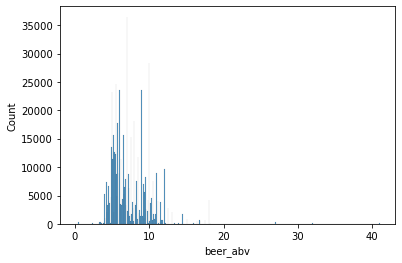

In [81]:
# beer_abv distribution
sns.histplot(data=beer_df_clean, x='beer_abv');

> Alright so it looks like we have some outliers for `beer_abv`. Let's look into these..

In [82]:
abv_stats = beer_df_clean.beer_abv.describe()
abv_stats

count    563797.000000
mean          7.397345
std           2.532279
min           0.050000
25%           5.500000
50%           7.000000
75%           9.000000
max          41.000000
Name: beer_abv, dtype: float64

> I am going to define outliers using the [1.5 x IQR rule](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule#:~:text=A%20commonly%20used%20rule%20says,or%20below%20the%20first%20quartile.). 

In [83]:
# Find limits for the 1.5xIQR rule. 
IQR = abv_stats[6] - abv_stats[4]
lower_limit = abv_stats[4] - (1.5 * IQR)
upper_limit = abv_stats[6] + (1.5 * IQR)
print(f'Outlier Lower Limit = {lower_limit} \n\
Outlier Upper Limit = {upper_limit}')

Outlier Lower Limit = 0.25 
Outlier Upper Limit = 14.25


> Now that we have our lower and upper limits to define the outliers, we will use these values to filter our data and then re-plot the distribution. 

In [84]:
beer_df_clean.query("beer_abv < 0.25")

beer_id     beer_name        beer_style  beer_abv  weighted_review  \
487984    36162  Budweiser NA  Low Alcohol Beer      0.05             1.57   
487985    36162  Budweiser NA  Low Alcohol Beer      0.05             2.45   

        review_overall  review_aroma  review_appearance  review_palate  \
487984             1.5           1.5                3.5            1.0   
487985             3.0           2.5                2.5            3.0   

        review_taste review_profilename    brewery_name brewery_type  \
487984           1.5               brdc  Anheuser-Busch        large   
487985           2.0             MTNboy  Anheuser-Busch        large   

               city     state  longitude   latitude  
487984  Saint Louis  Missouri   -90.2119  38.595454  
487985  Saint Louis  Missouri   -90.2119  38.595454

In [85]:
beer_df_clean.query("beer_style == 'Low Alcohol Beer'").count()['beer_abv']

277

In [86]:
beer_df_clean.query("beer_style == 'Low Alcohol Beer'")['brewery_name'].unique()

array(['Anheuser-Busch'], dtype=object)

> Alright so this is interesting. There are only two data points that lie below the lower limit of 0.25. We can also see that `beer_style` == `Low Alcohol Beer`. There are also 277 other data points with this beer style. However, they are all brewed by the same brewery, Anheuser-Busch. 
>
> Since low alcoholic beer has a very specific target market, it doesn't really fit within the purposes of this analysis. The purpose of this analysis is to gain insight into different beers for people who enjoy drinking it, without any thought or worry of its alcohol content. In other words, alcohol content isn't a deciding factor for choosing to drink a specific beer. So it doesn't make sense to include beers that are for people who do pay attention to alcohol content, and for them it is a deciding factor.
>
> Having said that, I will drop all `Low Alcohol Beer` data from the dataset.

In [87]:
beer_df_clean = beer_df_clean.query("beer_style != 'Low Alcohol Beer'")
beer_df_clean

beer_id                       beer_name  \
0         64883                   Cauldron DIPA   
1         52159             Caldera Ginger Beer   
2         52159             Caldera Ginger Beer   
3         52159             Caldera Ginger Beer   
4         52159             Caldera Ginger Beer   
...         ...                             ...   
563961    58076                      Amber Wave   
563962    58078               Shipwrecked Stout   
563963    58078               Shipwrecked Stout   
563964    58385  Belgian Blonde Anniversary Ale   
563965    69416                  Belgian Dubbel   

                            beer_style  beer_abv  weighted_review  \
0       American Double / Imperial IPA       7.7             4.32   
1                 Herbed / Spiced Beer       4.7             3.35   
2                 Herbed / Spiced Beer       4.7             3.75   
3                 Herbed / Spiced Beer       4.7             3.01   
4                 Herbed / Spiced Beer       4.7             3.68   
...                                ...       ...              ...   
563961        American Amber / Red Ale       5.4             3.46   
563962                  American Stout       6.5             3.31   
563963                  American Stout       6.5             3.75   
563964                Belgian Pale Ale       6.5             3.63   
563965                          Dubbel       6.0             3.27   

        review_overall  review_aroma  review_appearance  review_palate  \
0                  4.0           4.5                4.0            4.0   
1                  3.0           3.5                3.5            3.0   
2                  3.5           3.5                3.5            4.0   
3                  3.0           2.5                3.5            2.0   
4                  4.0           3.0                3.5            3.5   
...                ...           ...                ...            ...   
563961             3.5           3.0                4.0            4.0   
563962             3.0           3.0                4.0            3.5   
563963             3.5           3.5                3.5            4.0   
563964             4.0           3.5                4.0            3.5   
563965             3.0           3.5                3.0            2.5   

        review_taste review_profilename             brewery_name brewery_type  \
0                4.5     johnmichaelsen  Caldera Brewing Company        micro   
1                3.5            oline73  Caldera Brewing Company        micro   
2                4.0          Reidrover  Caldera Brewing Company        micro   
3                3.5       alpinebryant  Caldera Brewing Company        micro   
4                4.0      LordAdmNelson  Caldera Brewing Company        micro   
...              ...                ...                      ...          ...   
563961           3.5            DoubleJ  Pacific Beach Ale House      brewpub   
563962           3.5             glid02  Pacific Beach Ale House      brewpub   
563963           4.0            DoubleJ  Pacific Beach Ale House      brewpub   
563964           3.5             glid02  Pacific Beach Ale House      brewpub   
563965           3.5           mactrail  Pacific Beach Ale House      brewpub   

             city       state   longitude   latitude  
0         Ashland      Oregon -122.663374  42.183738  
1         Ashland      Oregon -122.663374  42.183738  
2         Ashland      Oregon -122.663374  42.183738  
3         Ashland      Oregon -122.663374  42.183738  
4         Ashland      Oregon -122.663374  42.183738  
...           ...         ...         ...        ...  
563961  San Diego  California -117.255265  32.794255  
563962  San Diego  California -117.255265  32.794255  
563963  San Diego  California -117.255265  32.794255  
563964  San Diego  California -117.255265  32.794255  
563965  San Diego  California -117.255265  32.794255  

[563520 rows x 17 columns]

In [88]:
# check if rows were dropped. 
beer_df_clean.query("beer_style == 'Low Alcohol Beer'")

Empty DataFrame
Columns: [beer_id, beer_name, beer_style, beer_abv, weighted_review, review_overall, review_aroma, review_appearance, review_palate, review_taste, review_profilename, brewery_name, brewery_type, city, state, longitude, latitude]
Index: []

> Ok, so we've taken care of the outliers below the lower limit, let's take a look at outlier above the upper limit. 

In [89]:
beer_df_clean.query("beer_abv > 14.25")

beer_id                          beer_name  \
60234     32963  XXX Warlock Double Imperial Stout   
60247     32963  XXX Warlock Double Imperial Stout   
60248     32963  XXX Warlock Double Imperial Stout   
60249     32963  XXX Warlock Double Imperial Stout   
60250     32963  XXX Warlock Double Imperial Stout   
...         ...                                ...   
543727    56134                  Barrel Of Monkeys   
562715    66003                  Iced Coffee Stout   
562716    66003                  Iced Coffee Stout   
562717    66003                  Iced Coffee Stout   
562718    66003                  Iced Coffee Stout   

                              beer_style  beer_abv  weighted_review  \
60234   American Double / Imperial Stout      18.4             4.28   
60247   American Double / Imperial Stout      18.4             2.52   
60248   American Double / Imperial Stout      18.4             2.00   
60249   American Double / Imperial Stout      18.4             1.76   
60250   American Double / Imperial Stout      18.4             4.10   
...                                  ...       ...              ...   
543727               American Barleywine      16.9             3.32   
562715  American Double / Imperial Stout      15.0             4.47   
562716  American Double / Imperial Stout      15.0             4.50   
562717  American Double / Imperial Stout      15.0             4.36   
562718  American Double / Imperial Stout      15.0             4.72   

        review_overall  review_aroma  review_appearance  review_palate  \
60234              4.0           4.0                4.5            4.5   
60247              2.0           4.0                1.0            1.0   
60248              1.5           3.0                3.0            2.0   
60249              1.0           2.0                3.0            3.0   
60250              4.5           4.0                4.0            4.0   
...                ...           ...                ...            ...   
543727             3.0           3.5                3.0            3.0   
562715             4.5           4.5                4.0            4.5   
562716             4.5           4.5                4.5            4.5   
562717             4.5           4.0                5.0            4.0   
562718             4.5           4.5                4.0            5.0   

        review_taste review_profilename                    brewery_name  \
60234            4.5             Tolnik         Bristol Brewing Company   
60247            2.5              Jeffo         Bristol Brewing Company   
60248            1.5            csmiley         Bristol Brewing Company   
60249            1.5         prototypic         Bristol Brewing Company   
60250            4.0           emmasdad         Bristol Brewing Company   
...              ...                ...                             ...   
543727           3.5           kaseydad  Devil's Canyon Brewing Company   
562715           4.5          Thorpe429          Hill Farmstead Brewery   
562716           4.5      youbrewidrink          Hill Farmstead Brewery   
562717           4.5            Brad007          Hill Farmstead Brewery   
562718           5.0          sisuspeed          Hill Farmstead Brewery   

       brewery_type              city       state   longitude   latitude  
60234         micro  Colorado Springs    Colorado -104.827401  38.810862  
60247         micro  Colorado Springs    Colorado -104.827401  38.810862  
60248         micro  Colorado Springs    Colorado -104.827401  38.810862  
60249         micro  Colorado Springs    Colorado -104.827401  38.810862  
60250         micro  Colorado Springs    Colorado -104.827401  38.810862  
...             ...               ...         ...         ...        ...  
543727        micro        San Carlos  California -122.244541  37.498966  
562715        micro   Greensboro Bend     Vermont         NaN        NaN  
562716        micro   Greensboro Bend    

> Ok, so over 10,000 data points can be defined as an "outlier". However, we really shouldn't drop these values just because they are outliers. So let's look into some of these data points in more detail. 

In [90]:
#how many data points do we have for each abv value > 14.25?
beer_df_clean.query("beer_abv > 14.25").beer_abv.value_counts().sort_index()

14.50    1710
15.00      54
15.04     871
15.30      10
15.43      29
15.60      20
15.90      94
16.00      16
16.03      33
16.45     495
16.80     693
16.83     506
16.90       3
17.00       8
17.20       9
17.50     605
18.00    4276
18.10      40
18.20     184
18.40      68
21.00      22
24.00      20
25.00      31
27.00     355
28.00       3
32.00      88
41.00      76
Name: beer_abv, dtype: int64

> It doesn't look like there are any values that are completely outlandish. There is a fairly consistent progression of values. 
>
> Let's take a look at the highest abv value, 41, and make sure that it is actually a real beer. 

In [91]:
beer_df_clean.query("beer_abv == 41")

beer_id           beer_name                      beer_style  beer_abv  \
307061    57015  Sink The Bismarck!  American Double / Imperial IPA      41.0   
307062    57015  Sink The Bismarck!  American Double / Imperial IPA      41.0   
307070    57015  Sink The Bismarck!  American Double / Imperial IPA      41.0   
307094    57015  Sink The Bismarck!  American Double / Imperial IPA      41.0   
307095    57015  Sink The Bismarck!  American Double / Imperial IPA      41.0   
...         ...                 ...                             ...       ...   
307165    57015  Sink The Bismarck!  American Double / Imperial IPA      41.0   
307166    57015  Sink The Bismarck!  American Double / Imperial IPA      41.0   
307167    57015  Sink The Bismarck!  American Double / Imperial IPA      41.0   
307168    57015  Sink The Bismarck!  American Double / Imperial IPA      41.0   
307169    57015  Sink The Bismarck!  American Double / Imperial IPA      41.0   

        weighted_review  review_overall  review_aroma  review_appearance  \
307061             3.83             4.0           3.5                4.0   
307062             3.68             3.5           4.0                4.5   
307070             3.31             3.5           3.0                4.0   
307094             1.24             1.0           1.5                3.0   
307095             2.70             5.0           2.0                2.0   
...                 ...             ...           ...                ...   
307165             4.12             4.0           4.5                4.0   
307166             4.57             4.5           5.0                4.5   
307167             4.62             3.5           5.0                4.5   
307168             4.70             4.5           4.5                4.5   
307169             4.57             4.5           5.0                4.5   

        review_palate  review_taste review_profilename brewery_name  \
307061            3.5           4.0         zaphodchak      BrewDog   
307062            3.5           3.5      Thehuntmaster      BrewDog   
307070            4.5           3.0              rwf08      BrewDog   
307094            1.0           1.0          largadeer      BrewDog   
307095            1.0           2.5    petacutlasaurus      BrewDog   
...               ...           ...                ...          ...   
307165            4.0           4.0     northyorksammy      BrewDog   
307166            4.0           4.5            SShelly      BrewDog   
307167            4.5           5.0             mirnsd      BrewDog   
307168            4.5           5.0      Beerenauslese      BrewDog   
307169            4.0           4.5          femALEist      BrewDog   

       brewery_type              city state  longitude   latitude  
307061        micro  Canal Winchester  Ohio -82.831135  39.822595  
307062        micro  Canal Winchester  Ohio -82.831135  39.822595  
307070        micro  Canal Winchester  Ohio -82.831135  39.822595  
307094        micro  Canal Winchester  Ohio -82.831135  39.822595  
307095        micro  Canal Winchester  Ohio -82.831135  39.822595  
...             ...               ...   ...        ...        ...  
307165        micro  Canal Winchester  Ohio -82.831135  39.822595  
307166        micro  Canal Winchester  Ohio -82.831135  39.822595  
307167        micro  Canal Winchester  Ohio -82.831135  39.822595  
307168        micro  Canal Winchester  Ohio -82.831135  39.822595  
307169        micro  Canal Winchester  Ohio -82.831135  39.822595  

[76 rows x 17 columns]

> It looks like, [Sink The Bismark!](https://www.dailymail.co.uk/news/article-1354411/Worlds-strongest-beer-Sink-The-Bismarck-goes-sale-55-bottle.html) is a real beer, and was the strongest beer in the world when it was released. 

> So since there isn't a good reason to drop these values, other than that they are outliers, I think the best course of action would be to keep the values in our dataset, and just change the `binrange` for the distribution. 
>
> In addition, when we get to bivariate and multivariate analysis, it might be a good idea to do show results with and without these outliers. 
>
> The last thing we need to do before re-plotting our data is take into account beers with multiple reviews. This is important because beers with multiple reviews have the same `beer_abv` value, and are getting counted multiple times, which could be skewing the data. 
>
> Therefore, what we need to do is filter out any beers that have multiple reviews, and just plot a single `beer_abv` value for each one. Let's do that now.  

In [92]:
abv_unique = beer_df_clean.drop_duplicates(subset=['beer_name', 'beer_style', 'beer_abv', 'brewery_name', 'city', 'state'])
abv_unique

beer_id                       beer_name  \
0         64883                   Cauldron DIPA   
1         52159             Caldera Ginger Beer   
10        10789           Caldera Oatmeal Stout   
12        12386                  Caldera OBF 15   
13        58046                   Rauch Ür Bock   
...         ...                             ...   
563955    46681                       PB Porter   
563959    58076                      Amber Wave   
563962    58078               Shipwrecked Stout   
563964    58385  Belgian Blonde Anniversary Ale   
563965    69416                  Belgian Dubbel   

                            beer_style  beer_abv  weighted_review  \
0       American Double / Imperial IPA       7.7             4.32   
1                 Herbed / Spiced Beer       4.7             3.35   
10                       Oatmeal Stout       7.2             2.97   
12                 American Pale Lager       5.6             3.76   
13                           Rauchbier       7.4             4.36   
...                                ...       ...              ...   
563955                 American Porter       6.5             3.50   
563959        American Amber / Red Ale       5.4             3.29   
563962                  American Stout       6.5             3.31   
563964                Belgian Pale Ale       6.5             3.63   
563965                          Dubbel       6.0             3.27   

        review_overall  review_aroma  review_appearance  review_palate  \
0                  4.0           4.5                4.0            4.0   
1                  3.0           3.5                3.5            3.0   
10                 3.0           3.0                2.5            3.0   
12                 4.0           3.0                4.0            4.0   
13                 4.5           4.5                3.0            4.0   
...                ...           ...                ...            ...   
563955             3.5           3.5                3.5            3.5   
563959             4.0           3.5                2.5            3.0   
563962             3.0           3.0                4.0            3.5   
563964             4.0           3.5                4.0            3.5   
563965             3.0           3.5                3.0            2.5   

        review_taste review_profilename             brewery_name brewery_type  \
0                4.5     johnmichaelsen  Caldera Brewing Company        micro   
1                3.5            oline73  Caldera Brewing Company        micro   
10               3.0   Beerandraiderfan  Caldera Brewing Company        micro   
12               4.0         beerguy101  Caldera Brewing Company        micro   
13               4.5        UCLABrewN84  Caldera Brewing Company        micro   
...              ...                ...                      ...          ...   
563955           3.5             armock  Pacific Beach Ale House      brewpub   
563959           3.0     GarthDanielson  Pacific Beach Ale House      brewpub   
563962           3.5             glid02  Pacific Beach Ale House      brewpub   
563964           3.5             glid02  Pacific Beach Ale House      brewpub   
563965           3.5           mactrail  Pacific Beach Ale House      brewpub   

             city       state   longitude   latitude  
0         Ashland      Oregon -122.663374  42.183738  
1         Ashland      Oregon -122.663374  42.183738  
10        Ashland      Oregon -122.663374  42.183738  
12        Ashland      Oregon -122.663374  42.183738  
13        Ashland      Oregon -122.663374  42.183738  
...           ...         ...         ...        ...  
563955  San Diego  California -117.255265  32.794255  
563959  San Diego  California -117.255265  32.794255  
563962  San Diego  California -117.255265  32.794255  
563964  San Diego  California -117.255265  32.794255  
563965  San Diego  California -117.255265  32.794255  

[11095 rows x 17 columns]

> This dataframe, `abv_unique`,  will now only count a single `beer_abv` value for each unique beer is `beer_df_clean`. 
>
>We can now go ahead and use `abv_unique` to plot the distribution. 

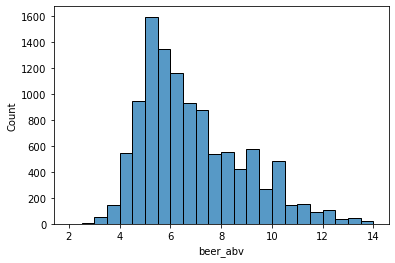

In [93]:
# re-plot distribution for beer_abv.
sns.histplot(data=abv_unique, x='beer_abv', binwidth=0.5, binrange=(2,14));

> Here, I set the `binrange` to the outlier range we caluclated before. Smaller bin sizes didn't give any more useful insight. Slight right skew with most data points in the 4 to 10 abv range. 
>
> Next, lets deal with the right skew of this distribution. 
>
> First, I want to take a look at a few different transformations and compare their skew. This will give us a general sense of which transformation is best to use.

In [94]:
# skew of original data. 
abv_unique.beer_abv.skew()

1.785754430729601

> This is the skew of the `beer_abv` column in `abv_unique`. Let's apply some transformations and see if we can get that skew value closer to 0. Since we are dealing with a right skew, we will compare roots and log transformations.

In [95]:
print(f'''square root transformation: {np.sqrt(abv_unique.beer_abv).skew()}
cube root transformation: {np.cbrt(abv_unique.beer_abv).skew()}
log transformation: {np.log10(abv_unique.beer_abv).skew()}
''')

square root transformation: 0.8709065751970357
cube root transformation: 0.6682802085586348
log transformation: 0.30037268551325036



> Log transformation looks like the way to go here.

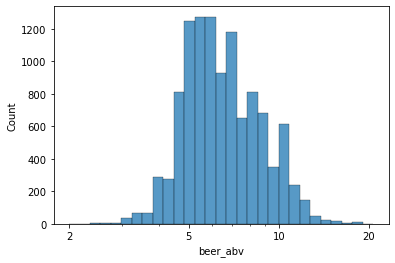

In [96]:
log_binsize = 0.035
bins = 10 ** np.arange(0.3, 1.3 + log_binsize, log_binsize)
sns.histplot(data=abv_unique, x='beer_abv', bins=bins)
plt.xscale('log')
tick_locs = [2, 5, 10, 20]
plt.xticks(tick_locs, tick_locs);

> This looks a bit better now.

-------

> Now let's take a look at our review scores: `weighted_review`, `review_overall`, `review_aroma`, `review_appearance`, `review_palate`, and `review_taste`
>
> First I want to take a look at some general details about these variables before plotting. We probably should of done this in the first section, but oh well.

In [97]:
beer_df_clean[['weighted_review', 'review_overall', 'review_aroma',
               'review_appearance', 'review_palate', 'review_taste']].describe()

weighted_review  review_overall   review_aroma  review_appearance  \
count    563520.000000   563520.000000  563520.000000      563520.000000   
mean          3.860928        3.878524       3.826135           3.903313   
std           0.594069        0.694011       0.665907           0.581781   
min           1.000000        0.000000       1.000000           0.000000   
25%           3.580000        3.500000       3.500000           3.500000   
50%           3.970000        4.000000       4.000000           4.000000   
75%           4.250000        4.500000       4.000000           4.000000   
max           5.000000        5.000000       5.000000           5.000000   

       review_palate   review_taste  
count  563520.000000  563520.000000  
mean        3.820094       3.876857  
std         0.650815       0.702981  
min         1.000000       1.000000  
25%         3.500000       3.500000  
50%         4.000000       4.000000  
75%         4.000000       4.500000  
max         5.000000       5.000000

> So it looks like the variables `review_overall` and `review_appearance` have a min review score of 0. This must be an input error since the lowest review score you can give on BeerAdvocate is 1. Therefore, let's drop any rows that have review scores of 0. 

In [98]:
review_zero = beer_df_clean.query('review_overall == 0')
review_zero

beer_id          beer_name               beer_style  beer_abv  \
47471     3806           Pub Pils           Czech Pilsener       4.0   
47505     3804  Latter Days Stout          Irish Dry Stout       4.0   
47523     3810      Utah Pale Ale  American Pale Ale (APA)       4.0   

       weighted_review  review_overall  review_aroma  review_appearance  \
47471             1.58             0.0           2.0                0.0   
47505             1.96             0.0           4.0                0.0   
47523             1.72             0.0           3.0                0.0   

       review_palate  review_taste review_profilename         brewery_name  \
47471            3.0           2.0           beernut7  Desert Edge Brewery   
47505            2.0           2.0           beernut7  Desert Edge Brewery   
47523            2.0           2.0           beernut7  Desert Edge Brewery   

      brewery_type            city state   longitude   latitude  
47471      brewpub  Salt Lake City  Utah -111.875021  40.756391  
47505      brewpub  Salt Lake City  Utah -111.875021  40.756391  
47523      brewpub  Salt Lake City  Utah -111.875021  40.756391

In [99]:
beer_df_clean.drop(index=review_zero.index, inplace=True)

C:\Users\mcmco\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [100]:
# check that rows were dropped.
beer_df_clean.query('review_overall == 0')

Empty DataFrame
Columns: [beer_id, beer_name, beer_style, beer_abv, weighted_review, review_overall, review_aroma, review_appearance, review_palate, review_taste, review_profilename, brewery_name, brewery_type, city, state, longitude, latitude]
Index: []

> Now with that taken care of, let's start with plotting the distribution for `weighted_review`, which again is a weighted average score for the other 5 review categories: `review_overall`, `review_aroma`, `review_appearance`, `review_palate`, and `review_taste`.

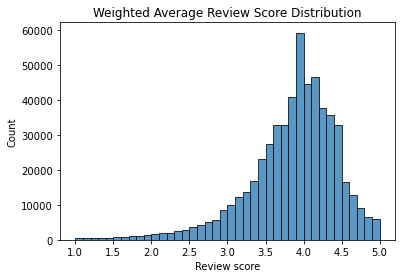

In [101]:
sns.histplot(data=beer_df_clean, x='weighted_review', binwidth=0.1)
plt.title('Weighted Average Review Score Distribution')
plt.xlabel('Review score');

> Unimodal distribution with a left skew, sweet. Let's move onto the other 5 review categories.

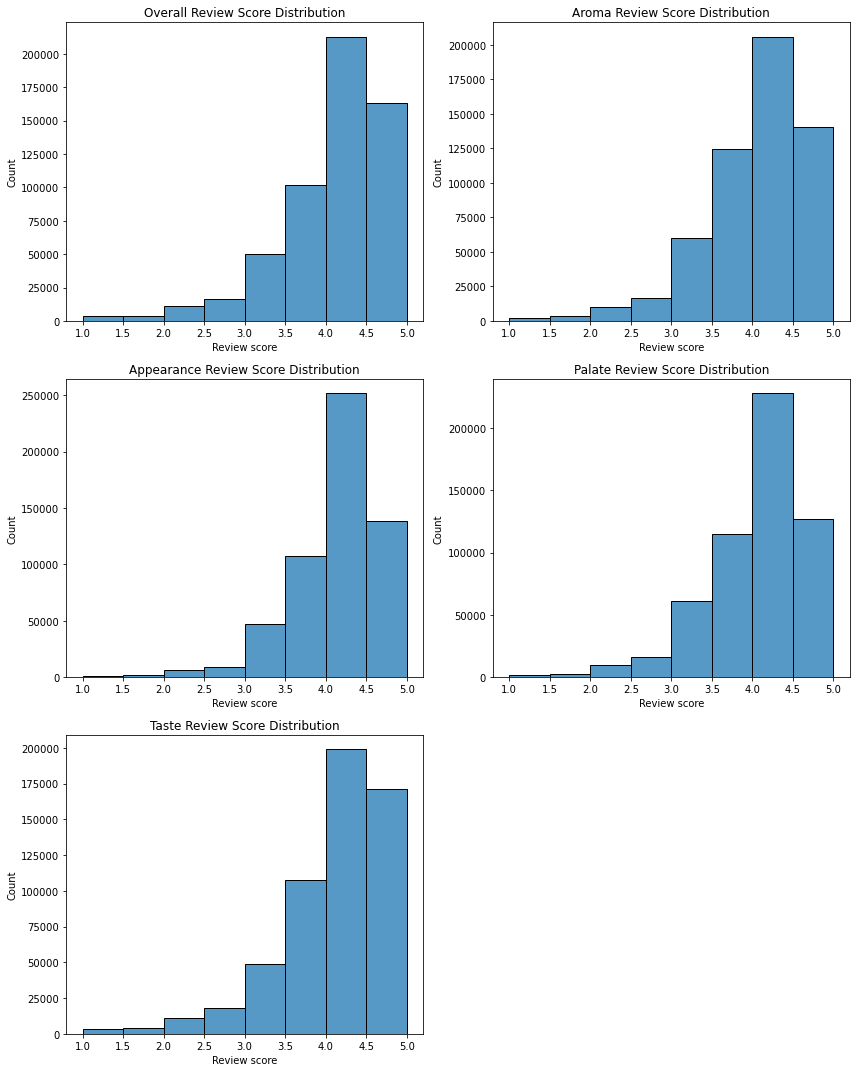

In [102]:
fig, (ax1, ax2, ax3) = plt.subplots(3,2, figsize=(12,15)) 

sns.histplot(data=beer_df_clean, x='review_overall', ax=ax1[0], binwidth=0.5)
ax1[0].set_title('Overall Review Score Distribution')
ax1[0].set_xlabel('Review score')

sns.histplot(data=beer_df_clean, x='review_aroma', ax=ax1[1], binwidth=0.5)
ax1[1].set_title('Aroma Review Score Distribution')
ax1[1].set_xlabel('Review score')

sns.histplot(data=beer_df_clean, x='review_appearance', ax=ax2[0], binwidth=0.5)
ax2[0].set_title('Appearance Review Score Distribution')
ax2[0].set_xlabel('Review score')

sns.histplot(data=beer_df_clean, x='review_palate', ax=ax2[1], binwidth=0.5)
ax2[1].set_title('Palate Review Score Distribution')
ax2[1].set_xlabel('Review score')

sns.histplot(data=beer_df_clean, x='review_taste', ax=ax3[0], binwidth=0.5)
ax3[0].set_title('Taste Review Score Distribution')
ax3[0].set_xlabel('Review score')

ax3[1].axis('off')
plt.tight_layout()

> The distributions for the these sub-category review scores have a similar distribution and skew to the weighted review scores.
>
>This tells us a couple of things. One, these sub-categories will likely have a strong correlation with each other. Two, we will most likely want to apply the same transformation to each of these distributions. A sqaured or cubed transformation would make sense since we are dealing with a left skew.
>
>We will most likely have to use matplotlib to create our own scale function, since it doesn't have a squared or cubed scale built in. 
>
>Another thing to note here is the binsize change. By chance, every review score in the dataset was given in an interval of 0.5, i.e. 0.5, 1.0, 1.5, etc. However, on BeerAdvocate a reviewer can give any score between 1-5, including decimals. Because of this, I have been treating these 5 review variables as quantitative variables, even though their is an argument to say that they are qualitative.
--------

> Next, let's compare the skew of squared and cubed transformations for each review category, and then will work on the scale transformation.

In [103]:
categories = ['weighted_review', 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']

for cat in categories:
    print(f'''
    {cat}
    -------------------
    original skew: {beer_df_clean[cat].skew()}
    squared transformation: {np.square(beer_df_clean[cat]).skew()}
    cubed transformation: {np.power(beer_df_clean[cat], 3).skew()}
    ''')


    weighted_review
    -------------------
    original skew: -1.1984672927072069
    squared transformation: -0.5047808852203373
    cubed transformation: -0.01443767612316318
    

    review_overall
    -------------------
    original skew: -1.1060441322918542
    squared transformation: -0.34339252456404773
    cubed transformation: 0.1800702843091319
    

    review_aroma
    -------------------
    original skew: -0.8914884091128868
    squared transformation: -0.18199327912184646
    cubed transformation: 0.3183647592576002
    

    review_appearance
    -------------------
    original skew: -0.9742304877643074
    squared transformation: -0.2373280150245303
    cubed transformation: 0.2849302728884694
    

    review_palate
    -------------------
    original skew: -0.9445654223236041
    squared transformation: -0.22059641406222286
    cubed transformation: 0.3025889741414878
    

    review_taste
    -------------------
    original skew: -1.0834602672817597
    squa

> Based on these skew values a cubed transformation looks like the best option across all review categories. 
>
> So let's just go ahead and create a cubed scale for the x-axis of the review distributions. Matplotlib doesn't have a 'cubed' option for `plt.xscale`, but we can use the 'function' option of `set_xscale` to apply our own function. Pretty cool. 

> Before we apply a cubed scale to the review distributions, I want to test the code out on some dummy data. 

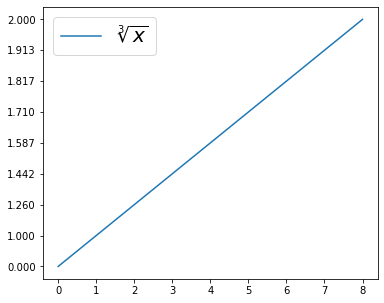

In [104]:
from matplotlib.ticker import FixedLocator

# define cubed function to apply to scale. 
def forward(x):
    return x**3


def inverse(x):
    return np.sign(x) * (np.abs(x)) ** (1 / 3)


# plot dummy data using defined cubed function. 
dummy_data = np.cbrt(np.arange(0,9))
fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.plot(dummy_data, label='$\sqrt[3]{x}$')
ax.set_yscale('function', functions=(forward, inverse))
ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 10, 1)**(1/3)))
ax.legend(fontsize=20);

In [105]:
# plotted y-values to help with interpretation. 
np.cbrt(np.arange(0,9))

array([0.        , 1.        , 1.25992105, 1.44224957, 1.58740105,
       1.70997595, 1.81712059, 1.91293118, 2.        ])

> That worked nicely. 
>
>We purposefully plotted a cubed root function so that the resulting plot would be linear after applying the cubed function to the y-scale. It is much easier to interpret what is going on with this visualization. 
>
>If you take a look at the plot without the y-scale function applied, you can see the effect of the cubed function. 

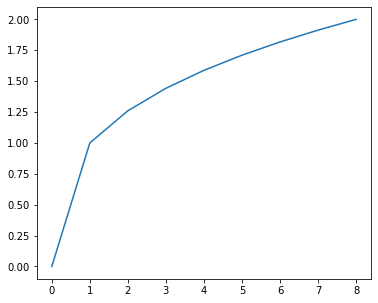

In [106]:
dummy_data = np.cbrt(np.arange(0,9))
fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.plot(dummy_data);

> Now, let's try to apply this function to the review distributions. 
>
>

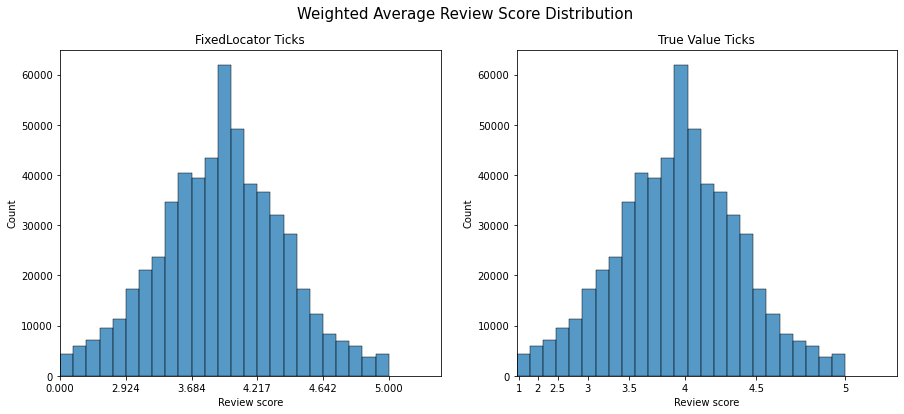

In [107]:
from matplotlib.ticker import FixedLocator

# define cubed function to apply to scale. 
def forward(x):
    return x**3


def inverse(x):
    return np.sign(x) * (np.abs(x)) ** (1 / 3)


binsize = 5
bins = np.arange(0, 130, binsize)**(1/3)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

sns.histplot(beer_df_clean, x='weighted_review', bins=bins, ax=ax1)
ax1.set_xscale('function', functions=(forward, inverse))
ax1.xaxis.set_major_locator(FixedLocator(np.arange(0, 130, 25)**(1/3)))
ax1.set_title('FixedLocator Ticks')
ax1.set_xlabel('Review score')

sns.histplot(beer_df_clean, x='weighted_review', bins=bins, ax=ax2)
ax2.set_xscale('function', functions=(forward, inverse))
tick_locs1 = [1, 2, 2.5, 3, 3.5, 4, 4.5, 5]
plt.xticks(tick_locs1, tick_locs1)
ax2.set_title('True Value Ticks')
ax2.set_xlabel('Review score')

plt.suptitle('Weighted Average Review Score Distribution', fontsize=15);

 Original distribution for comparison. 
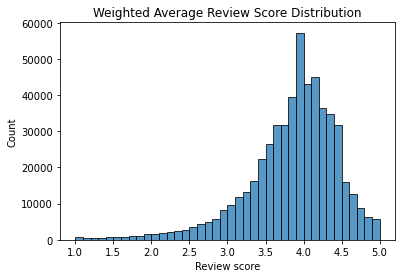

> Right away, we can see that the cubed transformation does reduce the skew of the distribution. 
> 
> I included two plots of the transformation for comparison:
> - ax1: uses the matplotlib `FixedLocator` subclass from the `ticker` module to set tick marks. This evenly distributes the tick marks across the bins of the distribution. It is more aesthetically pleasing, however it can cause some difficultly in interpretation, since our review scores are in intervals of 0.5.
> - ax2: uses `plt.xticks` to set tick marks that correspond to the true values of review scores, i.e. intervals of 0.5. The spacing of the tick marks on this plot can also make it difficult to interpret. However, we get the benefit of visualizing values that make sense to us. 
>
> Now we can apply the cubed transformation to the rest of the review categories.

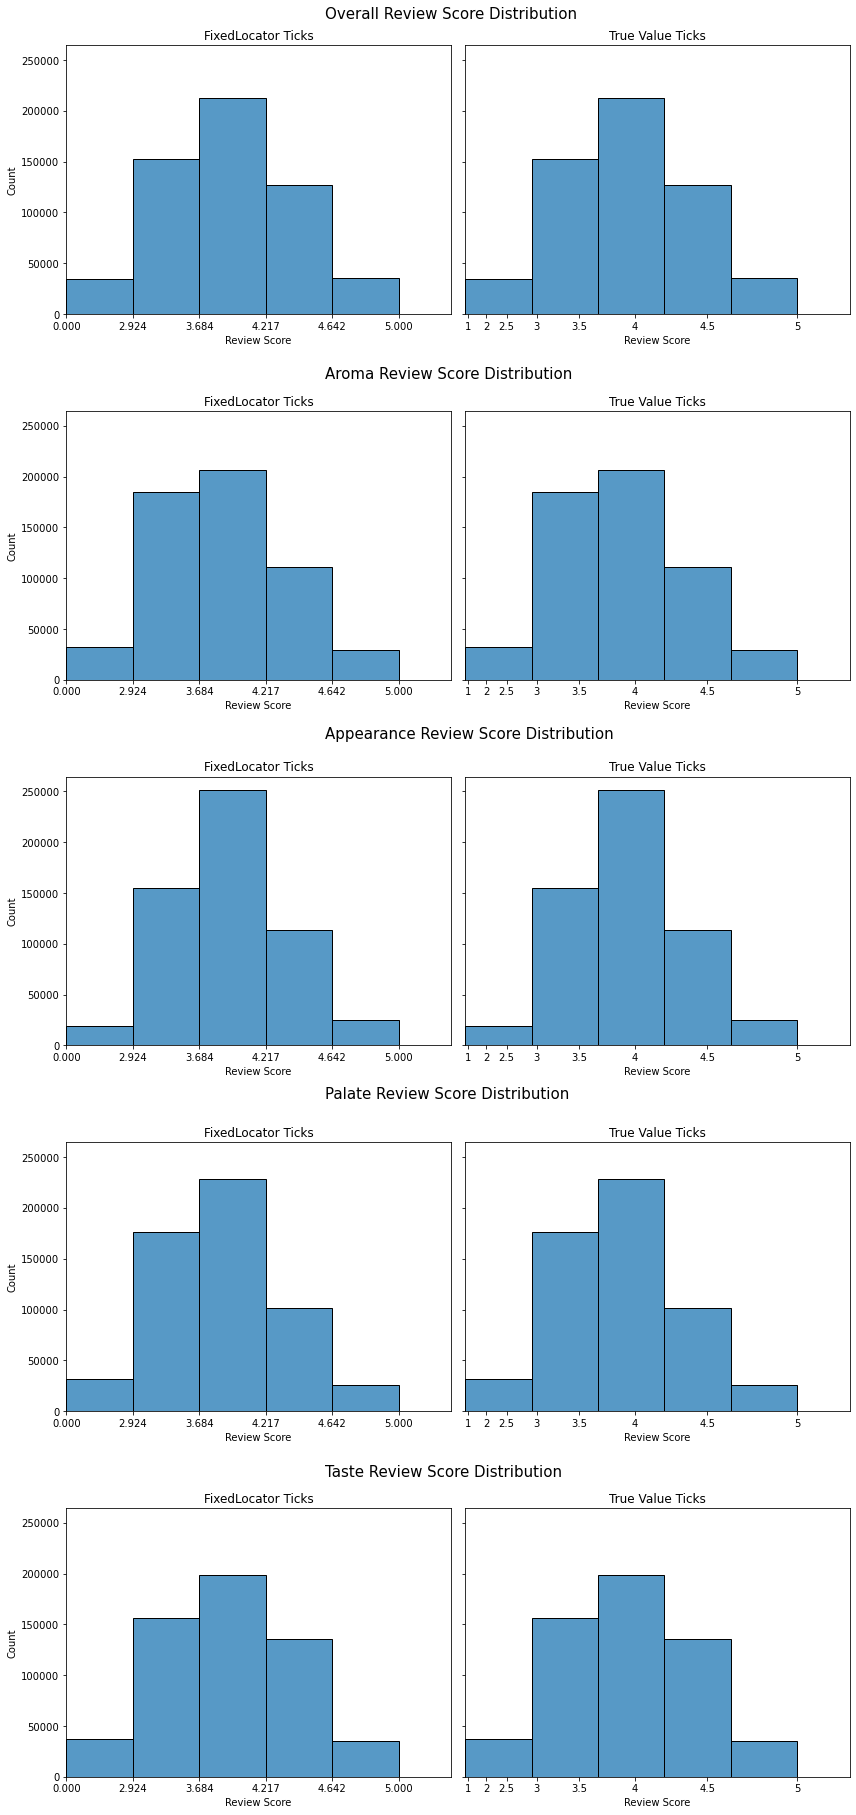

In [108]:
fig, axes = plt.subplots(5,2, figsize=(12,25), sharey=True)
categories = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']

for i, row in enumerate(axes):
    binsize = 25
    bins = np.arange(0, 130, binsize)**(1/3)
    
    # FixedLocator ticks plot
    sns.histplot(beer_df_clean, x=categories[i], bins=bins, ax=row[0])
    row[0].set_xscale('function', functions=(forward, inverse))
    row[0].xaxis.set_major_locator(FixedLocator(np.arange(0, 130, 25)**(1/3)))
    row[0].set_xlabel('Review Score')
    row[0].set_title('FixedLocator Ticks')
    
    # True value ticks plot
    sns.histplot(beer_df_clean, x=categories[i], bins=bins, ax=row[1])
    row[1].set_xscale('function', functions=(forward, inverse))
    tick_locs = [1, 2, 2.5, 3, 3.5, 4, 4.5, 5]
    row[1].set_xticks(tick_locs)
    row[1].set_xticklabels(tick_locs)
    row[1].set_xlabel('Review Score')
    row[1].set_title('True Value Ticks')

# plt.subplots_adjust(hspace=3)
plt.figtext(0.38, 1, 'Overall Review Score Distribution', fontsize=15, weight=20)
plt.figtext(0.38, 0.8, 'Aroma Review Score Distribution', fontsize=15, weight=20)
plt.figtext(0.38, 0.6, 'Appearance Review Score Distribution', fontsize=15, weight=20)
plt.figtext(0.38, 0.4, 'Palate Review Score Distribution', fontsize=15, weight=20)
plt.figtext(0.38, 0.19, 'Taste Review Score Distribution', fontsize=15, weight=20)
plt.tight_layout(h_pad=5)

> Alright, so now we have addressed the skew of each review distribution. Keep in mind that normalizing the distributions like this isn't always necessary for your analysis. However, I figured that it would be good practice, and it may be helpful later on. 

--------

> Lastly, I want to take a look at a few qualitative variables in our dataset.
>
> I want to take a look at the distributions of states where each beer is brewed, beer name, beer style, and brewery type.

In [109]:
# Let's see how many different states we are working with. 
beer_df_clean.state.nunique()

51

> Alright, we have all 50 states and D.C. represented in the dataset. It will be a tight squeeze, but I think it will be worth looking at the full distribution. 
>
> We also have to remember that each brewery may brew multiple beers, and each beer may have multiple reviews. Therfore each state will be counted multiple times. To deal with this, we can drop all brewery duplicates, and then plot the states where those breweries are located. 

In [110]:
state_unique = beer_df_clean.drop_duplicates(subset=['brewery_name', 'brewery_type', 'city', 'state'])
state_unique

beer_id                   beer_name                      beer_style  \
0         64883               Cauldron DIPA  American Double / Imperial IPA   
886       55097                   Nut Brown               English Brown Ale   
1015      33624       Hoppin' To Heaven IPA                    American IPA   
4137      53679       Ballz Deep Double IPA  American Double / Imperial IPA   
4179      48911             Founders Cerise          Fruit / Vegetable Beer   
...         ...                         ...                             ...   
563834    74835                    Pale Ale         American Pale Ale (APA)   
563836    60269               Orkney Porter                  English Porter   
563855    76106  Stone's Throw Scottish Ale                    Scottish Ale   
563861    56470                   Libertine                         Witbier   
563939    73587                    Hopulent  American Double / Imperial IPA   

        beer_abv  weighted_review  review_overall  review_aroma  \
0            7.7             4.32             4.0           4.5   
886          4.7             3.63             4.0           3.5   
1015         6.8             4.00             4.0           4.0   
4137         8.4             4.00             4.0           4.0   
4179         6.5             4.35             4.5           4.0   
...          ...              ...             ...           ...   
563834       6.3             3.97             4.0           4.0   
563836       9.0             4.35             4.0           4.5   
563855       4.5             3.41             3.5           3.0   
563861       7.0             4.18             4.5           3.5   
563939       8.5             2.13             1.5           3.0   

        review_appearance  review_palate  review_taste review_profilename  \
0                     4.0            4.0           4.5     johnmichaelsen   
886                   4.0            3.5           3.5             JamesS   
1015                  4.0            4.0           4.0            Ummagum   
4137                  4.0            4.0           4.0    barleywinefiend   
4179                  4.0            4.5           4.5             rye726   
...                   ...            ...           ...                ...   
563834                3.5            4.0           4.0           metter98   
563836                4.5            4.0           4.5             BDTyre   
563855                4.0            3.5           3.5      BeardedBoffin   
563861                4.0            4.0           4.5         shaunt0000   
563939                3.5            3.0           1.5           mactrail   

                         brewery_name brewery_type          city  \
0             Caldera Brewing Company        micro       Ashland   
886             Broad Ripple Brew Pub      brewpub  Indianapolis   
1015             Hoppin' Frog Brewery        micro         Akron   
4137       7 Seas Brewery and Taproom        micro        Tacoma   
4179         Founders Brewing Company     regional  Grand Rapids   
...                               ...          ...           ...   
563834              The Bronx Brewery        micro         Bronx   
563836  Highland Brewing Company Ltd.     regional     Asheville   
563855          Fargo Brewing Company        micro         Fargo   
563861             Eagle Rock Brewery        micro   Los Angeles   
563939        Pacific Beach Ale House      brewpub     San Diego   

                 state   longitude   latitude  
0               Oregon -122.663374  42.183738  
886            Indiana         NaN        NaN  
1015              Ohio         NaN        NaN  
4137        Washington -122.439038  47.242614  
4179          Michigan  -85.676575  42.952496  
...                ...         ...        ...  
563834        New York  -73.910641  40.801861  
563836  North Carolina         NaN        NaN  
563855    North Dakota         NaN        NaN  
563861      California -118.2440

In [111]:
state_unique.state.value_counts()

California              81
Oregon                  34
New York                31
Washington              31
Michigan                29
Colorado                25
Pennsylvania            22
Wisconsin               21
North Carolina          20
Missouri                19
Illinois                18
Massachusetts           18
Minnesota               16
Florida                 15
Montana                 15
Indiana                 15
Texas                   14
Ohio                    14
Virginia                11
Maryland                 9
Arizona                  9
Maine                    7
New Jersey               7
Nebraska                 6
South Carolina           6
Nevada                   6
Georgia                  5
New Hampshire            5
Kentucky                 5
Vermont                  5
Iowa                     4
Tennessee                4
Oklahoma                 4
Rhode Island             4
Hawaii                   4
New Mexico               4
Utah                     4
I

In [112]:
# still dealing with 51 states?
state_unique.state.nunique()

51

> Now, we can go ahead and plot this values.

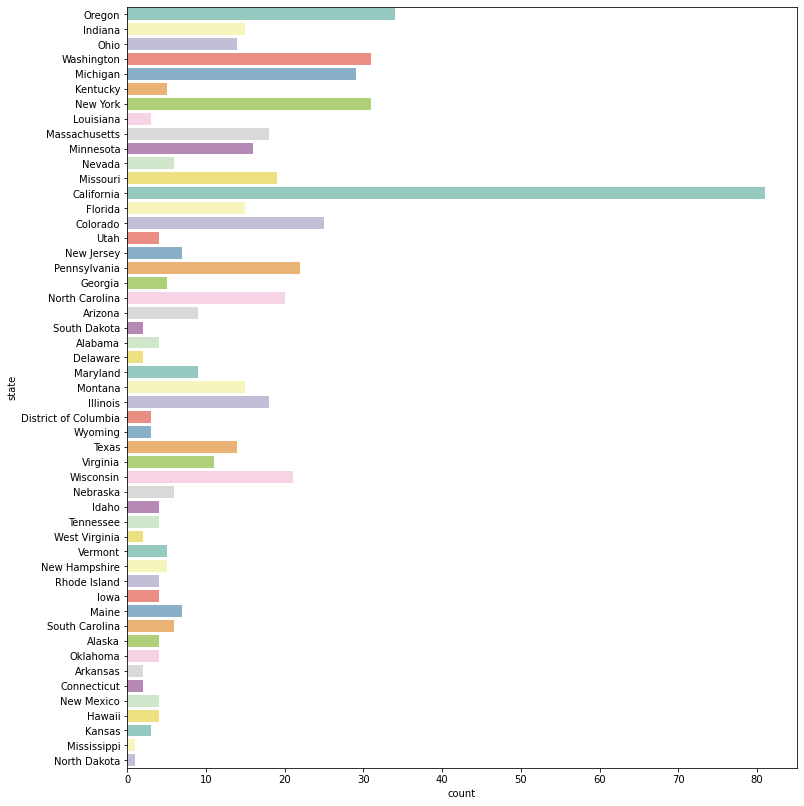

In [113]:
plt.figure(figsize=(12,14))
sns.countplot(data=state_unique, y='state', palette='Set3');

> Let's now try to put these in descending order.

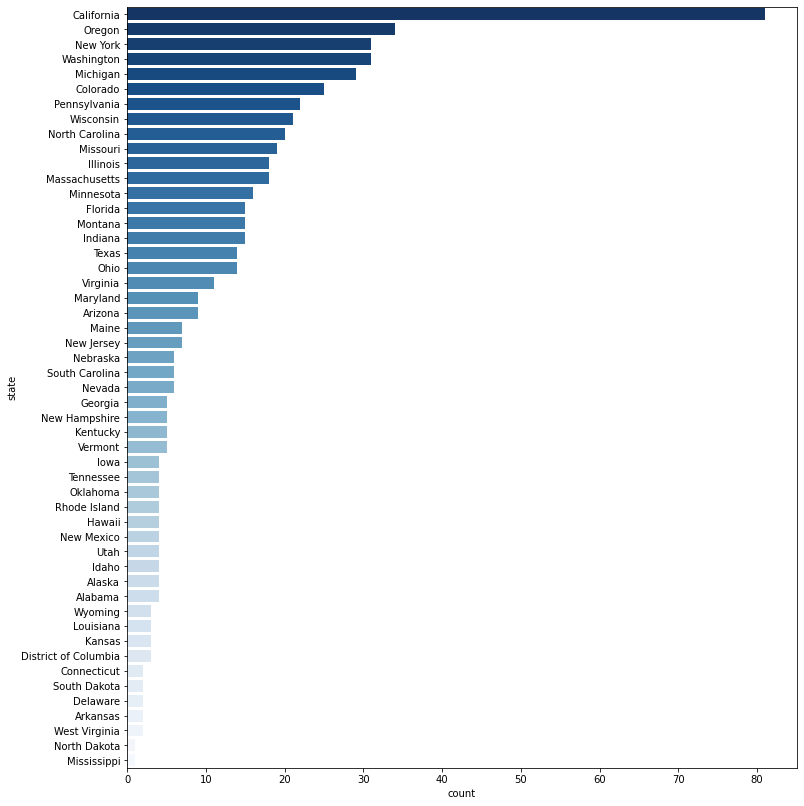

In [114]:
state_order = state_unique.state.value_counts().index
plt.figure(figsize=(12,14))
sns.countplot(data=state_unique, y='state', palette='Blues_r', order=state_order);

> Last thing I want to do is to annotate the value counts for each state on the plot. 

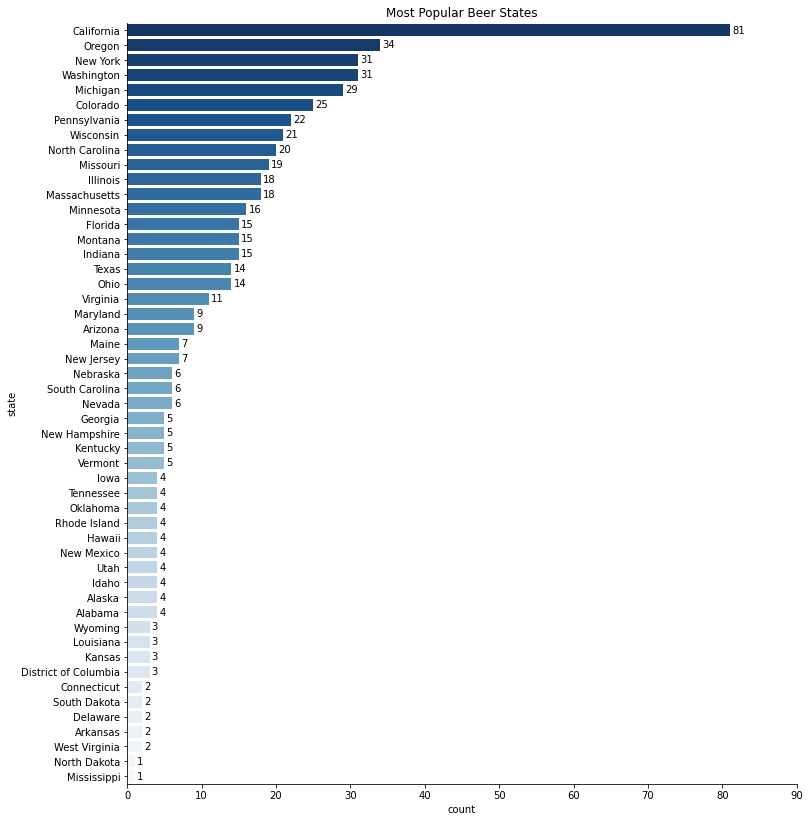

In [115]:
plt.figure(figsize=(12,14))
ax = sns.countplot(data=state_unique, y='state', palette='Blues_r', order=state_order)
plt.xlim(0,90)
plt.title('Most Popular Beer States')
sns.despine();

for p in ax.patches:
    bar_end = p.get_width()
    x = p.get_x() + p.get_width() + 0.3
    y = p.get_y() + p.get_height() / 1.35
    ax.annotate(format(bar_end, ',d'), (x,y))

> Alright this looks better, and it gives us an idea of where a majority of breweries are located in the U.S., which may have some indication on the popularity of beer in that state.
>
>We can see that California is a clear standout, with states like Oregon, New York, Washington, and Michigan also having a high number of breweries. It will be interesting to see which of these states also produce highly rated beers. 

------

> Now let's take a look at the most popular beer styles in the dataset. 
>
> With beer styles, we face the same problem of duplicates as we did with brewery states. Since each beer can have multiple reviews, beer styles may be counted multiple times for a single beer. Therefore, in order to get accurate counts for our plot, we will need to drop these duplicates. 

In [116]:
style_unique = beer_df_clean.drop_duplicates(subset=['beer_name', 'beer_style', 'brewery_name'])
style_unique

beer_id                       beer_name  \
0         64883                   Cauldron DIPA   
1         52159             Caldera Ginger Beer   
10        10789           Caldera Oatmeal Stout   
12        12386                  Caldera OBF 15   
13        58046                   Rauch Ür Bock   
...         ...                             ...   
563955    46681                       PB Porter   
563959    58076                      Amber Wave   
563962    58078               Shipwrecked Stout   
563964    58385  Belgian Blonde Anniversary Ale   
563965    69416                  Belgian Dubbel   

                            beer_style  beer_abv  weighted_review  \
0       American Double / Imperial IPA       7.7             4.32   
1                 Herbed / Spiced Beer       4.7             3.35   
10                       Oatmeal Stout       7.2             2.97   
12                 American Pale Lager       5.6             3.76   
13                           Rauchbier       7.4             4.36   
...                                ...       ...              ...   
563955                 American Porter       6.5             3.50   
563959        American Amber / Red Ale       5.4             3.29   
563962                  American Stout       6.5             3.31   
563964                Belgian Pale Ale       6.5             3.63   
563965                          Dubbel       6.0             3.27   

        review_overall  review_aroma  review_appearance  review_palate  \
0                  4.0           4.5                4.0            4.0   
1                  3.0           3.5                3.5            3.0   
10                 3.0           3.0                2.5            3.0   
12                 4.0           3.0                4.0            4.0   
13                 4.5           4.5                3.0            4.0   
...                ...           ...                ...            ...   
563955             3.5           3.5                3.5            3.5   
563959             4.0           3.5                2.5            3.0   
563962             3.0           3.0                4.0            3.5   
563964             4.0           3.5                4.0            3.5   
563965             3.0           3.5                3.0            2.5   

        review_taste review_profilename             brewery_name brewery_type  \
0                4.5     johnmichaelsen  Caldera Brewing Company        micro   
1                3.5            oline73  Caldera Brewing Company        micro   
10               3.0   Beerandraiderfan  Caldera Brewing Company        micro   
12               4.0         beerguy101  Caldera Brewing Company        micro   
13               4.5        UCLABrewN84  Caldera Brewing Company        micro   
...              ...                ...                      ...          ...   
563955           3.5             armock  Pacific Beach Ale House      brewpub   
563959           3.0     GarthDanielson  Pacific Beach Ale House      brewpub   
563962           3.5             glid02  Pacific Beach Ale House      brewpub   
563964           3.5             glid02  Pacific Beach Ale House      brewpub   
563965           3.5           mactrail  Pacific Beach Ale House      brewpub   

             city       state   longitude   latitude  
0         Ashland      Oregon -122.663374  42.183738  
1         Ashland      Oregon -122.663374  42.183738  
10        Ashland      Oregon -122.663374  42.183738  
12        Ashland      Oregon -122.663374  42.183738  
13        Ashland      Oregon -122.663374  42.183738  
...           ...         ...         ...        ...  
563955  San Diego  California -117.255265  32.794255  
563959  San Diego  California -117.255265  32.794255  
563962  San Diego  California -117.255265  32.794255  
563964  San Diego  California -117.255265  32.794255  
563965  San Diego  California -117.255265  32.794255  

[10221 rows x 17 columns]

> Looks good, but its possible that we are missing beer style counts where 2 or more breweries have the same name, but are seperate breweries. Either because they are different brewery types, or are located in different cities/states. 
>
> So we will include breweries in our subset columns just to cover these edge cases.

In [117]:
style_unique = beer_df_clean.drop_duplicates(subset=['beer_name', 'beer_style', 
                                                     'brewery_name', 'brewery_type', 'city', 'state'])
style_unique

beer_id                       beer_name  \
0         64883                   Cauldron DIPA   
1         52159             Caldera Ginger Beer   
10        10789           Caldera Oatmeal Stout   
12        12386                  Caldera OBF 15   
13        58046                   Rauch Ür Bock   
...         ...                             ...   
563955    46681                       PB Porter   
563959    58076                      Amber Wave   
563962    58078               Shipwrecked Stout   
563964    58385  Belgian Blonde Anniversary Ale   
563965    69416                  Belgian Dubbel   

                            beer_style  beer_abv  weighted_review  \
0       American Double / Imperial IPA       7.7             4.32   
1                 Herbed / Spiced Beer       4.7             3.35   
10                       Oatmeal Stout       7.2             2.97   
12                 American Pale Lager       5.6             3.76   
13                           Rauchbier       7.4             4.36   
...                                ...       ...              ...   
563955                 American Porter       6.5             3.50   
563959        American Amber / Red Ale       5.4             3.29   
563962                  American Stout       6.5             3.31   
563964                Belgian Pale Ale       6.5             3.63   
563965                          Dubbel       6.0             3.27   

        review_overall  review_aroma  review_appearance  review_palate  \
0                  4.0           4.5                4.0            4.0   
1                  3.0           3.5                3.5            3.0   
10                 3.0           3.0                2.5            3.0   
12                 4.0           3.0                4.0            4.0   
13                 4.5           4.5                3.0            4.0   
...                ...           ...                ...            ...   
563955             3.5           3.5                3.5            3.5   
563959             4.0           3.5                2.5            3.0   
563962             3.0           3.0                4.0            3.5   
563964             4.0           3.5                4.0            3.5   
563965             3.0           3.5                3.0            2.5   

        review_taste review_profilename             brewery_name brewery_type  \
0                4.5     johnmichaelsen  Caldera Brewing Company        micro   
1                3.5            oline73  Caldera Brewing Company        micro   
10               3.0   Beerandraiderfan  Caldera Brewing Company        micro   
12               4.0         beerguy101  Caldera Brewing Company        micro   
13               4.5        UCLABrewN84  Caldera Brewing Company        micro   
...              ...                ...                      ...          ...   
563955           3.5             armock  Pacific Beach Ale House      brewpub   
563959           3.0     GarthDanielson  Pacific Beach Ale House      brewpub   
563962           3.5             glid02  Pacific Beach Ale House      brewpub   
563964           3.5             glid02  Pacific Beach Ale House      brewpub   
563965           3.5           mactrail  Pacific Beach Ale House      brewpub   

             city       state   longitude   latitude  
0         Ashland      Oregon -122.663374  42.183738  
1         Ashland      Oregon -122.663374  42.183738  
10        Ashland      Oregon -122.663374  42.183738  
12        Ashland      Oregon -122.663374  42.183738  
13        Ashland      Oregon -122.663374  42.183738  
...           ...         ...         ...        ...  
563955  San Diego  California -117.255265  32.794255  
563959  San Diego  California -117.255265  32.794255  
563962  San Diego  California -117.255265  32.794255  
563964  San Diego  California -117.255265  32.794255  
563965  San Diego  California -117.255265  32.794255  

[11180 rows x 17 columns]

> Ok, so it looks like our worries were justified since the number of rows returned increased by almost 1,000 to 11,180. 
>
> Now, let's go ahead and plot.

In [118]:
pd.Series(style_unique.beer_style.value_counts().values).describe()

count    101.000000
mean     110.693069
std      135.536249
min        1.000000
25%       27.000000
50%       70.000000
75%      126.000000
max      854.000000
dtype: float64

> Conveniently there are 101 unique beer styles in `style_unique`. So, we'll take a look at the upper quartile, which is about the top 25 beer styles.

In [119]:
# find beer styles in upper quartile. 
top25_styles = style_unique.beer_style.value_counts().head(25).index
top25_styles

Index(['American IPA', 'American Pale Ale (APA)', 'American Porter',
       'American Amber / Red Ale', 'American Double / Imperial IPA',
       'Saison / Farmhouse Ale', 'American Double / Imperial Stout',
       'American Stout', 'American Brown Ale', 'Fruit / Vegetable Beer',
       'American Barleywine', 'American Strong Ale', 'American Wild Ale',
       'American Pale Wheat Ale', 'Hefeweizen', 'Russian Imperial Stout',
       'American Blonde Ale', 'Witbier', 'Belgian Pale Ale',
       'Extra Special / Strong Bitter (ESB)', 'Tripel',
       'Scotch Ale / Wee Heavy', 'Märzen / Oktoberfest', 'Oatmeal Stout',
       'Belgian Strong Dark Ale'],
      dtype='object')

In [120]:
style_unique.beer_style.value_counts().head(25)

American IPA                           854
American Pale Ale (APA)                641
American Porter                        462
American Amber / Red Ale               453
American Double / Imperial IPA         401
Saison / Farmhouse Ale                 369
American Double / Imperial Stout       356
American Stout                         294
American Brown Ale                     281
Fruit / Vegetable Beer                 276
American Barleywine                    250
American Strong Ale                    242
American Wild Ale                      241
American Pale Wheat Ale                217
Hefeweizen                             203
Russian Imperial Stout                 193
American Blonde Ale                    193
Witbier                                184
Belgian Pale Ale                       172
Extra Special / Strong Bitter (ESB)    160
Tripel                                 147
Scotch Ale / Wee Heavy                 145
Märzen / Oktoberfest                   140
Oatmeal Sto

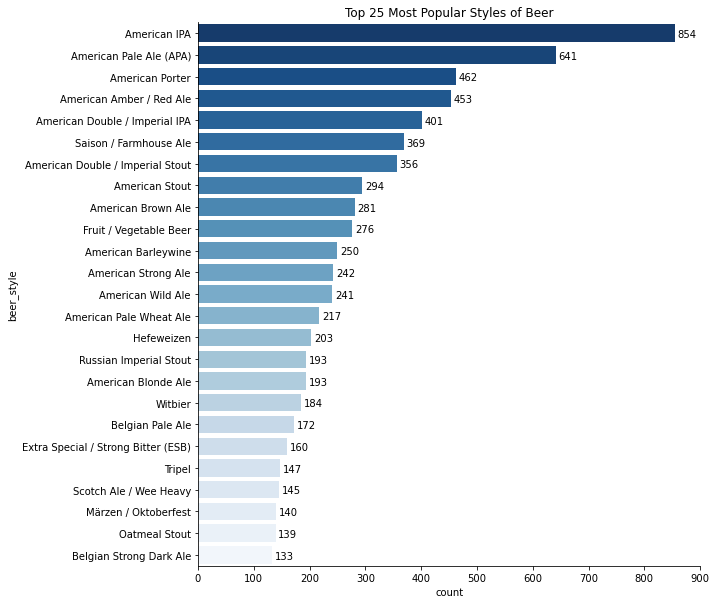

In [121]:
plt.figure(figsize=(9,10))
ax = sns.countplot(data=style_unique, y='beer_style', order=top25_styles, palette='Blues_r')
plt.xlim(0, 900)
plt.title('Top 25 Most Popular Styles of Beer')
sns.despine();

for p in ax.patches:
    bar_end = p.get_width()
    x = p.get_x() + p.get_width() + 5
    y = p.get_y() + p.get_height() / 1.4
    ax.annotate(format(bar_end, ',d'), (x,y))

> Looks good.
>
> Next, let's move onto types of breweries. 

------

> First I want to define each brewery type, as defined by [Brewer's Association](https://www.brewersassociation.org/statistics-and-data/craft-beer-industry-market-segments/#:~:text=There%20are%20six%20distinct%20craft,brewing%20companies%2C%20and%20alternating%20proprietors):
> - **Large**: A brewery with an annual beer production greater than 6,000,000 barrels.     
> - **Regional**: A brewery with an annual beer production of between 15,000 and 6,000,000 barrels.      
> - **Micro**: A brewery that produces less than 15,000 barrels of beer per year and sells 75 percent or more of its beer off-site. 
> - **Brewpub**: A restaurant-brewery that sells 25 percent or more of its beer on-site and operates significant food services.   
> - **Contract**: A business that hires another brewery to produce its beer. It can also be a brewery that hires another brewery to produce additional beer.
> - **Proprietor**: A licensed tenant brewery that physically takes possession of a shared brewery while brewing.
> - **Planning**: Any independent or home brewery that is planning to expand their brewery into a brewpub, microbrewery, etc.  

> Next, let's filter for unique breweries so that we aren't recounting brewery types. To insure that we don't run into a similar problem like we did with beers types, where several beers have the same name and beer style combination, we will filter for brewery types with a unique, `brewery_name`, `brewery_type`, `city`, and `state`. 
>
> Filtering with these subset columns will make sure that we only count brewery types with a unique brewery name, in a unique city, and in a unique state. This maybe to a bit overkill, however it will deal with certain edge cases, for example: 
 - Two breweries named 'X brewery', are both brewpubs, and are both located in New York. 
 - However, one of the breweries is in NYC, New York, and the other is in Albany, New York. 
 - In this case, we want this to be counted as 2 brewpubs. Having the four subset columns listed above will do this for us. 
>
>With that said, let's filter and plot.

In [122]:
brewery_unique = beer_df_clean.drop_duplicates(subset=['brewery_name', 'brewery_type', 'city', 'state'])
brewery_unique

beer_id                   beer_name                      beer_style  \
0         64883               Cauldron DIPA  American Double / Imperial IPA   
886       55097                   Nut Brown               English Brown Ale   
1015      33624       Hoppin' To Heaven IPA                    American IPA   
4137      53679       Ballz Deep Double IPA  American Double / Imperial IPA   
4179      48911             Founders Cerise          Fruit / Vegetable Beer   
...         ...                         ...                             ...   
563834    74835                    Pale Ale         American Pale Ale (APA)   
563836    60269               Orkney Porter                  English Porter   
563855    76106  Stone's Throw Scottish Ale                    Scottish Ale   
563861    56470                   Libertine                         Witbier   
563939    73587                    Hopulent  American Double / Imperial IPA   

        beer_abv  weighted_review  review_overall  review_aroma  \
0            7.7             4.32             4.0           4.5   
886          4.7             3.63             4.0           3.5   
1015         6.8             4.00             4.0           4.0   
4137         8.4             4.00             4.0           4.0   
4179         6.5             4.35             4.5           4.0   
...          ...              ...             ...           ...   
563834       6.3             3.97             4.0           4.0   
563836       9.0             4.35             4.0           4.5   
563855       4.5             3.41             3.5           3.0   
563861       7.0             4.18             4.5           3.5   
563939       8.5             2.13             1.5           3.0   

        review_appearance  review_palate  review_taste review_profilename  \
0                     4.0            4.0           4.5     johnmichaelsen   
886                   4.0            3.5           3.5             JamesS   
1015                  4.0            4.0           4.0            Ummagum   
4137                  4.0            4.0           4.0    barleywinefiend   
4179                  4.0            4.5           4.5             rye726   
...                   ...            ...           ...                ...   
563834                3.5            4.0           4.0           metter98   
563836                4.5            4.0           4.5             BDTyre   
563855                4.0            3.5           3.5      BeardedBoffin   
563861                4.0            4.0           4.5         shaunt0000   
563939                3.5            3.0           1.5           mactrail   

                         brewery_name brewery_type          city  \
0             Caldera Brewing Company        micro       Ashland   
886             Broad Ripple Brew Pub      brewpub  Indianapolis   
1015             Hoppin' Frog Brewery        micro         Akron   
4137       7 Seas Brewery and Taproom        micro        Tacoma   
4179         Founders Brewing Company     regional  Grand Rapids   
...                               ...          ...           ...   
563834              The Bronx Brewery        micro         Bronx   
563836  Highland Brewing Company Ltd.     regional     Asheville   
563855          Fargo Brewing Company        micro         Fargo   
563861             Eagle Rock Brewery        micro   Los Angeles   
563939        Pacific Beach Ale House      brewpub     San Diego   

                 state   longitude   latitude  
0               Oregon -122.663374  42.183738  
886            Indiana         NaN        NaN  
1015              Ohio         NaN        NaN  
4137        Washington -122.439038  47.242614  
4179          Michigan  -85.676575  42.952496  
...                ...         ...        ...  
563834        New York  -73.910641  40.801861  
563836  North Carolina         NaN        NaN  
563855    North Dakota         NaN        NaN  
563861      California -118.2440

In [123]:
brewery_unique.brewery_type.value_counts()

micro         247
brewpub       215
regional       71
contract       22
large          18
planning        7
proprietor      3
Name: brewery_type, dtype: int64

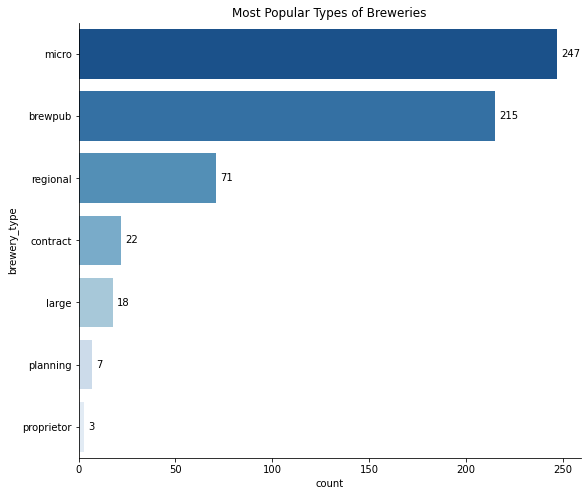

In [124]:
brewery_order = brewery_unique.brewery_type.value_counts().index
plt.figure(figsize=(9,8))
ax = sns.countplot(data=brewery_unique, y='brewery_type', order=brewery_order, palette='Blues_r')
plt.title('Most Popular Types of Breweries')
sns.despine()

for p in ax.patches:
    bar_end = p.get_width()
    x = p.get_x() + p.get_width() + 2
    y = p.get_y() + p.get_height() / 1.8
    ax.annotate(format(bar_end, ',d'), (x,y))

> Alright, so we can see that a majority of breweries reviewed are micro breweries and brewpubs. This seems makes sense, since people who visit or drink beer from micro breweries and/or brewpubs are more likely to be beer enthusiasts who will have an opinion, i.e. a review, on the beers they drink.
>
> Oh, I almost forgot that I wanted to look at the most popular beers based on number of reviews. 

In [125]:
# plot top 25 most popular beers
beer_df_clean.beer_name.value_counts().head(25)

Sculpin India Pale Ale                           8112
Founders Breakfast Stout                         5004
Big Eye IPA                                      4512
Founders KBS (Kentucky Breakfast Stout)          3864
Great Lakes Edmund Fitzgerald Porter             3330
90 Minute IPA                                    3290
Victory At Sea Coffee Vanilla Imperial Porter    3174
Founders Red's Rye PA                            2810
Founders Centennial IPA                          2790
Two Hearted Ale                                  2728
Green Flash West Coast I.P.A.                    2572
Founders Dirty Bastard                           2514
60 Minute IPA                                    2475
Furious                                          2448
Brooklyn Black Chocolate Stout                   2447
Bell's Hopslam Ale                               2443
Pale Ale                                         2422
Samuel Adams Boston Lager                        2418
Founders Double Trouble     

In [126]:
# plot order
top25_beers_order = beer_df_clean.beer_name.value_counts().head(25).index

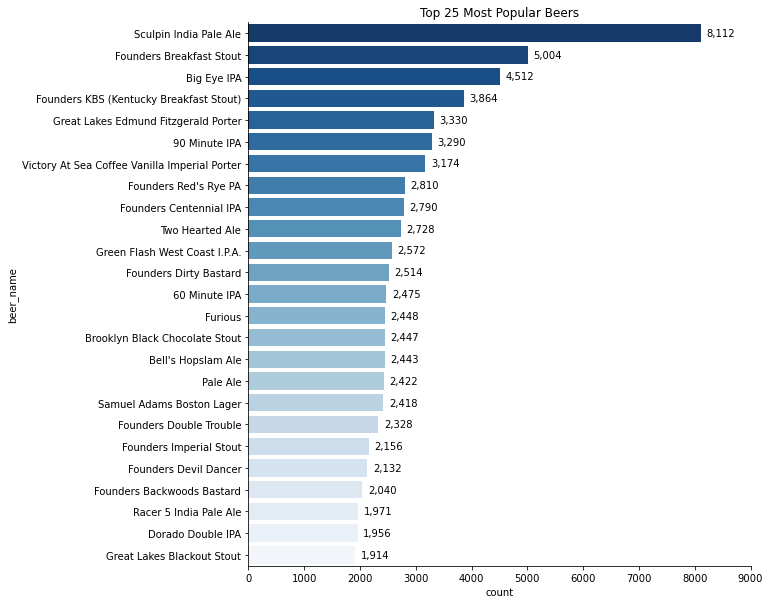

In [127]:
plt.figure(figsize=(9,10))
ax = sns.countplot(data=beer_df_clean, y='beer_name', order=top25_beers_order, palette='Blues_r')
plt.xlim(0, 9000)
plt.title('Top 25 Most Popular Beers')
sns.despine();

for p in ax.patches:
    bar_end = p.get_width()
    x = p.get_x() + p.get_width() + 100
    y = p.get_y() + p.get_height() / 1.5
    ax.annotate(format(bar_end, ',d'), (x,y))

------

### Data distributions, transformations, and manipulations

> - The first quantitative variable we looked at was `beer_abv`. There were some outliers present that we defined using the 1.5xIQR rule. We dropped the outliers that laid below the lower bound, because they represented "Low Alcohol Beer", which aren't of interest in our analysis. No outliers were dropped above the upper bound since we still needed their review data. In addition to outliers,  the `beer_abv` distribution had a slight right skew, which was corrected with a log transformation.     
> The variables, `review_overall`, `review_aroma`, `review_appearance`, `review_palate`, and `review_taste` all had left skews, which was corrected with a cubed transformation. 
>
> - With the qualitative data, `state`, `beer_style`, `brewery_type`, and `beer_name`, we made count plots ranked from most frequent to least frequent value. For `beer_style` and `beer_name`, we only plotted the top 25 values, since these variables each had thousands of unique values. 
>
> - Of the features investigated, the only operation that was necessary was the creation of temp tables (`state_unique`, `style_unique`, `brewery_unique`) used for the `state`, `beer_style`, and `brewery_type` varibales respectively. These temp tables were needed in order to prevent overcounting the frequency of each value, since our dataset has multiple reviews for each unique beer. 
> - A quick example: Beer A is an American IPA and has 30 different reviews, therefore represents 30 rows in the dataset. If we want to count the frequency of each beer stlye in the dataset, then we want to count 1 American IPA for Beer A instead of 30.      

-------

<a id='bivariate'></a>
## <u> Bivariate Exploration<u/>  <a href="#top" style="font-size :12px">(Back to top)</a>

> Let's start the bivariate exploration with looking at quantitative correlations.

In [128]:
variables = ['beer_abv', 'weighted_review', 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']

corr_matrix = beer_df_clean[variables].corr()
corr_matrix.style.background_gradient(cmap='Blues').format( '{:0.2f}')

> This simple pandas correaltion matrix serves its purpose. I also didn't know that pandas had a styling method, so I really wanted to try that out too. 
>
>Included in this matrix is `weighted_review`, which obviously has higher correlation coefficients than the other review categories since it is a function of those categories. Therefore, in terms of correlations, `review_overall` is the primary variable of interest. By looking at the correlation coefficients of variables in relation to `review_overall`, this will give us some insight into what categories influence a reviewer the most when giving their overall impression, or `review_overall` score, of a beer.
>
>Since we are primarily interested in the correlation coefficients of `review_overall`, I think it would be useful to plot these values on their own.

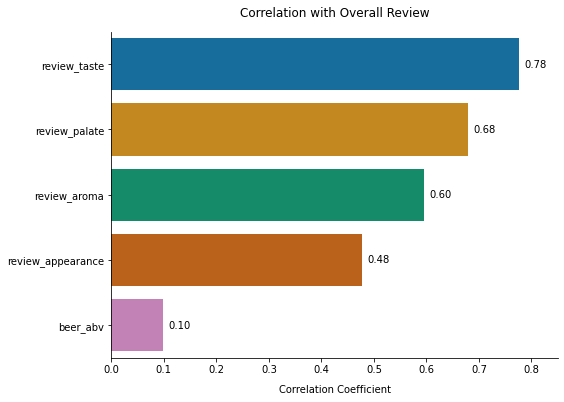

In [129]:
data_corr = corr_matrix['review_overall'].drop(['review_overall', 'weighted_review']).reset_index().sort_values('review_overall', ascending=False)

plt.figure(figsize=(8,6))
ax = sns.barplot(data = data_corr, x='review_overall', y='index', palette='colorblind')
plt.title('Correlation with Overall Review', pad=15)
plt.ylabel('')
plt.xlabel('Correlation Coefficient', labelpad=10)
plt.xlim(0,0.85)
sns.despine();

for p in ax.patches:
    bar_end = p.get_width()
    x = p.get_x() + p.get_width() + 0.01
    y = p.get_y() + p.get_height() / 1.8
    ax.annotate(format(bar_end, '0.2f'), (x,y))

> Here we can see that `review_taste` has the highest correlation with overall review score, and `beer_abv` has the lowest correlation with overall review score. 
> This suggests that a beer's taste is the primary factor in determining a reviewer's overall impression of a beer. This makes sense.   

------

> Next I want to take a look at some realtionships between `weighted_review` and other qualitative variables, such as: `beer_style`, `beer_name`, `brewery_name`, `state`, `brewery_type`.
>
>One important note to make is that any beer that is rated on BeerAdvocate needs at least 10 reviews to be ranked on the website. Therefore, we will keep that same threshold for this analysis.

In [130]:
# Are there any beer styles that have less than 10 reviews? 
x = beer_df_clean.groupby('beer_style').count().weighted_review
x[x<10]

beer_style
Gueuze                 8
Japanese Rice Lager    3
Name: weighted_review, dtype: int64

> Japanese Rice Lager and Gueuze are the only beer styles that have less than 10 reviews. So we'll keep this in mind, and deal with them if they has one of the higher average ratings. 
>
>Let's start plotting `weighted_review` vs. `beer_style`.

In [131]:
beer_df_clean.nunique()

beer_id               10230
beer_name              9590
beer_style              101
beer_abv                292
weighted_review         834
review_overall            9
review_aroma              9
review_appearance         9
review_palate             9
review_taste              9
review_profilename    22007
brewery_name            550
brewery_type              7
city                    416
state                    51
longitude               405
latitude                405
dtype: int64

In [132]:
# top 25 rated beer styles 
top25_beer_styles = beer_df_clean.groupby('beer_style').weighted_review.agg(['count', 'mean'])\
                    .sort_values(by=['mean'], ascending=False).reset_index().head(25)
top25_beer_styles

beer_style  count      mean
0                 Lambic - Unblended     26  4.265385
1   American Double / Imperial Stout  32248  4.245603
2             Russian Imperial Stout  21126  4.151372
3                   Flanders Red Ale    318  4.118711
4                           Rye Beer   8219  4.097689
5     American Double / Imperial IPA  41387  4.090373
6                            Eisbock    189  4.072963
7                      Baltic Porter   4155  4.050171
8                 Flanders Oud Bruin    860  4.045628
9                          Wheatwine   2016  4.045079
10                      American IPA  63167  4.041752
11               American Barleywine   9269  3.999906
12                        Roggenbier     49  3.999592
13                  Quadrupel (Quad)   5111  3.998581
14                   American Porter  29494  3.997195
15            Scotch Ale / Wee Heavy   8245  3.991608
16                            Gueuze      8  3.988750
17                       Belgian IPA   3749  3.983406
18                              Gose     31  3.974839
19                             Kvass     75  3.974000
20            Foreign / Export Stout    936  3.964498
21               American Strong Ale   9932  3.962840
22                 American Wild Ale   6362  3.960046
23                        Weizenbock   2176  3.959885
24         Dortmunder / Export Lager   2933  3.959632

> I'm also interested in displaying the number of reviews with each average rating, similar to a standard review site, which is why I included a count column. However, I will save that until later for explanatory visualizations.  
>
>So in fact Gueuze beer did make it to the top 25, therefore we'll have to deal with this quickly.

In [133]:
top25_beer_styles = beer_df_clean.groupby('beer_style').weighted_review.agg(['count', 'mean'])\
                    .sort_values(by=['mean'], ascending=False).reset_index()
top25_beer_styles = top25_beer_styles[top25_beer_styles['count']>9].head(25)
top25_beer_styles

beer_style  count      mean
0                 Lambic - Unblended     26  4.265385
1   American Double / Imperial Stout  32248  4.245603
2             Russian Imperial Stout  21126  4.151372
3                   Flanders Red Ale    318  4.118711
4                           Rye Beer   8219  4.097689
5     American Double / Imperial IPA  41387  4.090373
6                            Eisbock    189  4.072963
7                      Baltic Porter   4155  4.050171
8                 Flanders Oud Bruin    860  4.045628
9                          Wheatwine   2016  4.045079
10                      American IPA  63167  4.041752
11               American Barleywine   9269  3.999906
12                        Roggenbier     49  3.999592
13                  Quadrupel (Quad)   5111  3.998581
14                   American Porter  29494  3.997195
15            Scotch Ale / Wee Heavy   8245  3.991608
17                       Belgian IPA   3749  3.983406
18                              Gose     31  3.974839
19                             Kvass     75  3.974000
20            Foreign / Export Stout    936  3.964498
21               American Strong Ale   9932  3.962840
22                 American Wild Ale   6362  3.960046
23                        Weizenbock   2176  3.959885
24         Dortmunder / Export Lager   2933  3.959632
25            Saison / Farmhouse Ale  13624  3.947253

> There we go.
>
> Let's get a dataframe to plot from.

In [134]:
beer_style_filter = top25_beer_styles.beer_style.values

top25_beerstyles_df = beer_df_clean.query("beer_style in @beer_style_filter")
top25_beerstyles_df

beer_id                           beer_name  \
0         64883                       Cauldron DIPA   
58        10788                   Pilot Rock Porter   
220       10788                   Pilot Rock Porter   
221       10788                   Pilot Rock Porter   
222       10788                   Pilot Rock Porter   
...         ...                                 ...   
563948    73588  St. Sideburn (Bourbon Barrel Aged)   
563955    46681                           PB Porter   
563956    46681                           PB Porter   
563957    46681                           PB Porter   
563958    46681                           PB Porter   

                            beer_style  beer_abv  weighted_review  \
0       American Double / Imperial IPA       7.7             4.32   
58                     American Porter       5.8             4.70   
220                    American Porter       5.8             4.05   
221                    American Porter       5.8             4.22   
222                    American Porter       5.8             4.30   
...                                ...       ...              ...   
563948             American Strong Ale       8.5             2.01   
563955                 American Porter       6.5             3.50   
563956                 American Porter       6.5             3.68   
563957                 American Porter       6.5             3.46   
563958                 American Porter       6.5             3.60   

        review_overall  review_aroma  review_appearance  review_palate  \
0                  4.0           4.5                4.0            4.0   
58                 4.5           4.5                4.5            4.5   
220                4.0           4.0                4.0            4.5   
221                4.5           3.5                3.0            5.0   
222                4.5           4.0                4.0            4.0   
...                ...           ...                ...            ...   
563948             1.5           2.5                3.5            3.0   
563955             3.5           3.5                3.5            3.5   
563956             4.0           3.5                4.0            4.0   
563957             3.5           3.0                4.0            4.0   
563958             4.0           3.5                3.5            3.5   

        review_taste review_profilename             brewery_name brewery_type  \
0                4.5     johnmichaelsen  Caldera Brewing Company        micro   
58               5.0          Cyberkedi  Caldera Brewing Company        micro   
220              4.0         CaptainIPA  Caldera Brewing Company        micro   
221              4.5      anchordrinker  Caldera Brewing Company        micro   
222              4.5           spointon  Caldera Brewing Company        micro   
...              ...                ...                      ...          ...   
563948           1.5          HopHead84  Pacific Beach Ale House      brewpub   
563955           3.5             armock  Pacific Beach Ale House      brewpub   
563956           3.5             glid02  Pacific Beach Ale House      brewpub   
563957           3.5         Trappissed  Pacific Beach Ale House      brewpub   
563958           3.5           HalfFull  Pacific Beach Ale House      brewpub   

             city       state   longitude   latitude  
0         Ashland      Oregon -122.663374  42.183738  
58        Ashland      Oregon -122.663374  42.183738  
220       Ashland      Oregon -122.663374  42.183738  
221       Ashland      Oregon -122.663374  42.183738  
222       Ashland      Oregon -122.663374  42.183738  
...           ...         ...         ...        ...  
563948  San Diego  California -117.255265  32.794255  
563955  San Diego  California -117.255265  32.794255  
563956  San Diego  California -117.255265  32.794255  
563957  San Diego  California -117.255265  32.794255  
563958  San Diego  California -117.255265  32.79425

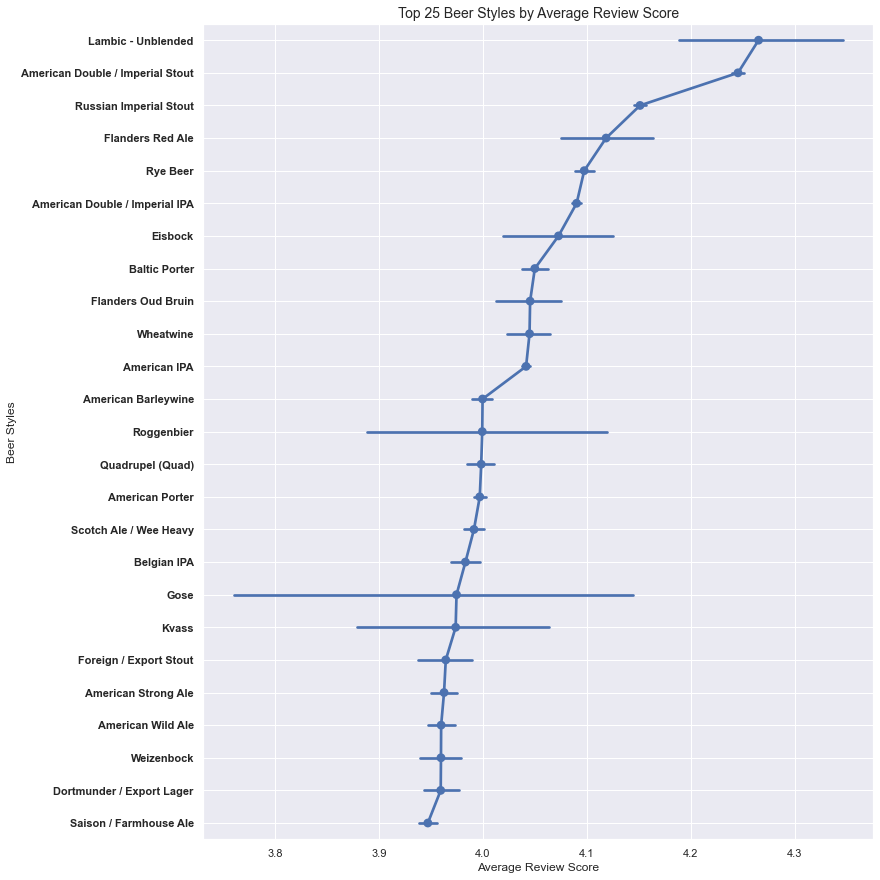

In [135]:
# plot top 25 beer styles
plt.figure(figsize=(12,15))
sns.set_theme(style='darkgrid')

sns.pointplot(data=top25_beerstyles_df, x='weighted_review', y='beer_style', order=beer_style_filter)

plt.grid(True)
plt.title('Top 25 Beer Styles by Average Review Score', fontsize=14)
plt.ylabel('Beer Styles')
plt.xlabel('Average Review Score')
plt.yticks(weight=600);

> Decided to use a pointplot since we aren't dealing with any 0 values and its less noisey than a violin or box plot. 
>
> The pointplot is also nice because it gives us an indication of the number of reviews a certain style has through the confidence interval of each point. Those with larger error bars will tend to have a lower number of reviews, and vice versa. 

------

> Next let's take a look at `weighted_review` vs. `beer_name`. 

In [136]:
# first filter out beers with <10 reviews.

beer_filter = beer_df_clean.groupby('beer_name').count().weighted_review
beer_filter1 = beer_filter[beer_filter<10].index
top25_beers_df = beer_df_clean.query("beer_name not in @beer_filter1")
top25_beers_df

beer_id      beer_name             beer_style  beer_abv  \
13        58046  Rauch Ür Bock              Rauchbier       7.4   
14        58046  Rauch Ür Bock              Rauchbier       7.4   
15        58046  Rauch Ür Bock              Rauchbier       7.4   
16        58046  Rauch Ür Bock              Rauchbier       7.4   
17        58046  Rauch Ür Bock              Rauchbier       7.4   
...         ...            ...                    ...       ...   
563913    54635     Solidarity  English Dark Mild Ale       3.8   
563914    54635     Solidarity  English Dark Mild Ale       3.8   
563915    54635     Solidarity  English Dark Mild Ale       3.8   
563916    54635     Solidarity  English Dark Mild Ale       3.8   
563917    54635     Solidarity  English Dark Mild Ale       3.8   

        weighted_review  review_overall  review_aroma  review_appearance  \
13                 4.36             4.5           4.5                3.0   
14                 3.90             4.0           4.0                4.0   
15                 4.07             4.0           4.5                4.0   
16                 4.57             4.5           5.0                4.5   
17                 4.32             4.0           4.5                4.0   
...                 ...             ...           ...                ...   
563913             2.81             2.5           2.5                3.5   
563914             4.07             4.5           4.0                3.5   
563915             4.08             5.0           3.5                4.0   
563916             3.85             4.0           4.0                4.0   
563917             4.33             4.5           4.0                4.5   

        review_palate  review_taste review_profilename  \
13                4.0           4.5        UCLABrewN84   
14                3.0           4.0         zaphodchak   
15                3.5           4.0            Tilley4   
16                4.0           4.5    mikedrinksbeer2   
17                4.0           4.5         dbmernin83   
...               ...           ...                ...   
563913            3.0           3.0            charlzm   
563914            4.0           4.0     Westsidebuddha   
563915            4.0           4.0          Sandstone   
563916            4.5           3.5       augustgarage   
563917            4.0           4.5            SShelly   

                   brewery_name brewery_type         city       state  \
13      Caldera Brewing Company        micro      Ashland      Oregon   
14      Caldera Brewing Company        micro      Ashland      Oregon   
15      Caldera Brewing Company        micro      Ashland      Oregon   
16      Caldera Brewing Company        micro      Ashland      Oregon   
17      Caldera Brewing Company        micro      Ashland      Oregon   
...                         ...          ...          ...         ...   
563913       Eagle Rock Brewery        micro  Los Angeles  California   
563914       Eagle Rock Brewery        micro  Los Angeles  California   
563915       Eagle Rock Brewery        micro  Los Angeles  California   
563916       Eagle Rock Brewery        micro  Los Angeles  California   
563917       Eagle Rock Brewery        micro  Los Angeles  California   

         longitude   latitude  
13     -122.663374  42.183738  
14     -122.663374  42.183738  
15     -122.663374  42.183738  
16     -122.663374  42.183738  
17     -122.663374  42.183738  
...            ...        ...  
563913 -118.244038  34.114731  
563914 -118.244038  34.114731  
563915 -118.244038  34.114731  
563916 -118.244038  34.114731  
563917 -118.244038  34.114731  

[545227 rows x 17 columns]

In [137]:
beer_df_clean[~beer_df_clean['beer_name'].isin(beer_filter1)]

beer_id      beer_name             beer_style  beer_abv  \
13        58046  Rauch Ür Bock              Rauchbier       7.4   
14        58046  Rauch Ür Bock              Rauchbier       7.4   
15        58046  Rauch Ür Bock              Rauchbier       7.4   
16        58046  Rauch Ür Bock              Rauchbier       7.4   
17        58046  Rauch Ür Bock              Rauchbier       7.4   
...         ...            ...                    ...       ...   
563913    54635     Solidarity  English Dark Mild Ale       3.8   
563914    54635     Solidarity  English Dark Mild Ale       3.8   
563915    54635     Solidarity  English Dark Mild Ale       3.8   
563916    54635     Solidarity  English Dark Mild Ale       3.8   
563917    54635     Solidarity  English Dark Mild Ale       3.8   

        weighted_review  review_overall  review_aroma  review_appearance  \
13                 4.36             4.5           4.5                3.0   
14                 3.90             4.0           4.0                4.0   
15                 4.07             4.0           4.5                4.0   
16                 4.57             4.5           5.0                4.5   
17                 4.32             4.0           4.5                4.0   
...                 ...             ...           ...                ...   
563913             2.81             2.5           2.5                3.5   
563914             4.07             4.5           4.0                3.5   
563915             4.08             5.0           3.5                4.0   
563916             3.85             4.0           4.0                4.0   
563917             4.33             4.5           4.0                4.5   

        review_palate  review_taste review_profilename  \
13                4.0           4.5        UCLABrewN84   
14                3.0           4.0         zaphodchak   
15                3.5           4.0            Tilley4   
16                4.0           4.5    mikedrinksbeer2   
17                4.0           4.5         dbmernin83   
...               ...           ...                ...   
563913            3.0           3.0            charlzm   
563914            4.0           4.0     Westsidebuddha   
563915            4.0           4.0          Sandstone   
563916            4.5           3.5       augustgarage   
563917            4.0           4.5            SShelly   

                   brewery_name brewery_type         city       state  \
13      Caldera Brewing Company        micro      Ashland      Oregon   
14      Caldera Brewing Company        micro      Ashland      Oregon   
15      Caldera Brewing Company        micro      Ashland      Oregon   
16      Caldera Brewing Company        micro      Ashland      Oregon   
17      Caldera Brewing Company        micro      Ashland      Oregon   
...                         ...          ...          ...         ...   
563913       Eagle Rock Brewery        micro  Los Angeles  California   
563914       Eagle Rock Brewery        micro  Los Angeles  California   
563915       Eagle Rock Brewery        micro  Los Angeles  California   
563916       Eagle Rock Brewery        micro  Los Angeles  California   
563917       Eagle Rock Brewery        micro  Los Angeles  California   

         longitude   latitude  
13     -122.663374  42.183738  
14     -122.663374  42.183738  
15     -122.663374  42.183738  
16     -122.663374  42.183738  
17     -122.663374  42.183738  
...            ...        ...  
563913 -118.244038  34.114731  
563914 -118.244038  34.114731  
563915 -118.244038  34.114731  
563916 -118.244038  34.114731  
563917 -118.244038  34.114731  

[545227 rows x 17 columns]

In [138]:
# Top 25 rated beers
top25_beers = top25_beers_df.groupby('beer_name').weighted_review.agg(['count', 'mean'])\
                    .sort_values(by=['mean'], ascending=False).reset_index().head(25)
top25_beers

beer_name  count      mean
0                           Rare Bourbon County Stout    249  4.649317
1        Green Flash Bourbon Barrel Aged Double Stout     14  4.641429
2                         Founders CBS Imperial Stout   1274  4.616342
3                            Three Sheets Barley Wine     12  4.600000
4                                       Notorius IPA3     22  4.592727
5            Sea Monster (3 Sheets Rum Oak Chip Aged)     12  4.585000
6                                          King Henry     98  4.573980
7                AleSmith Speedway Stout - Kopi Luwak     23  4.568261
8                                         Wooden Hell     76  4.553289
9                                      Hoppy Birthday     65  4.552154
10          Imperial Eclipse Stout - Pappy Van Winkle     49  4.550408
11                                         Ashy Cynic     18  4.543333
12                                          Royal Oil     15  4.542667
13                     Galaxy Imperial Single Hop IPA     76  4.542500
14            Founders KBS (Kentucky Breakfast Stout)   3864  4.537521
15                     Darkness - Bourbon Barrel Aged     30  4.532667
16                                Double Sunshine IPA     85  4.531647
17                                        Carnie Fire     10  4.530000
18  Marshal Zhukov's Imperial Stout - Zhukov's Fin...     19  4.525263
19                                          The Abyss   1412  4.518746
20                            Samuel Adams Millennium     22  4.517273
21                                   Birth Of Tragedy     29  4.515517
22                        Southampton Berliner Weisse     41  4.512927
23                                   Russian Roulette     12  4.509167
24                  Bourbon County Brand Coffee Stout    456  4.508026

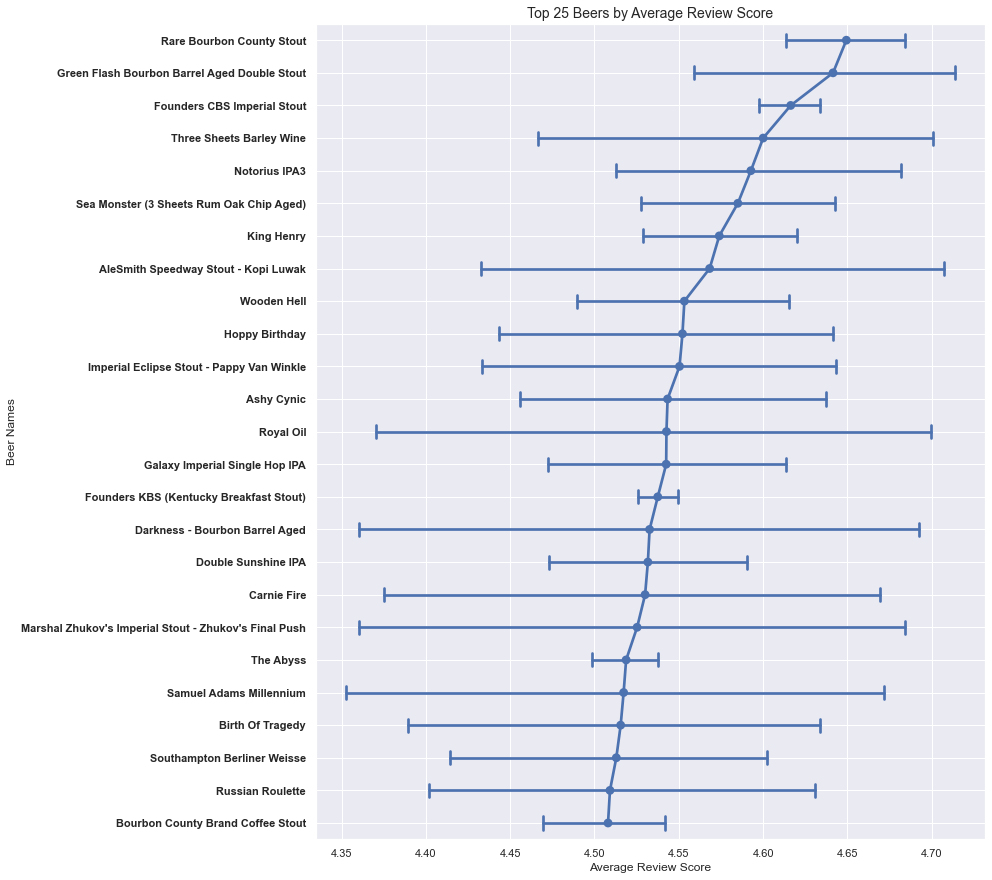

In [139]:
# plot top 25 beers
plt.figure(figsize=(12,15))
sns.set_theme(style='darkgrid')

sns.pointplot(data=top25_beers_df, x='weighted_review', y='beer_name', order=top25_beers.beer_name.values, capsize=0.4)

plt.grid(True)
plt.title('Top 25 Beers by Average Review Score', fontsize=14)
plt.ylabel('Beer Names')
plt.xlabel('Average Review Score')
plt.yticks(weight=600);

> Again the confidence intervals in this plot are very useful. For example, the beer "Three Sheets Barley Wine" is ranked 3rd with a rating of 4.6, however it's error bars are fairly large. This tells us that we aren't that confident with the mean we have calculated, which is due to the fact that this beer only has 12 reviews.

-------

> `weighted_review` vs `brewery_type`

In [140]:
top_brew_type = beer_df_clean.groupby('brewery_type').weighted_review.agg(['count', 'mean'])\
                .sort_values(by=['mean'],ascending=False)
top_brew_type

count      mean
brewery_type                  
planning       10263  4.098650
brewpub        57998  3.930907
regional      364947  3.893626
micro          56474  3.800290
proprietor       117  3.681197
contract        3821  3.661306
large          69897  3.657536

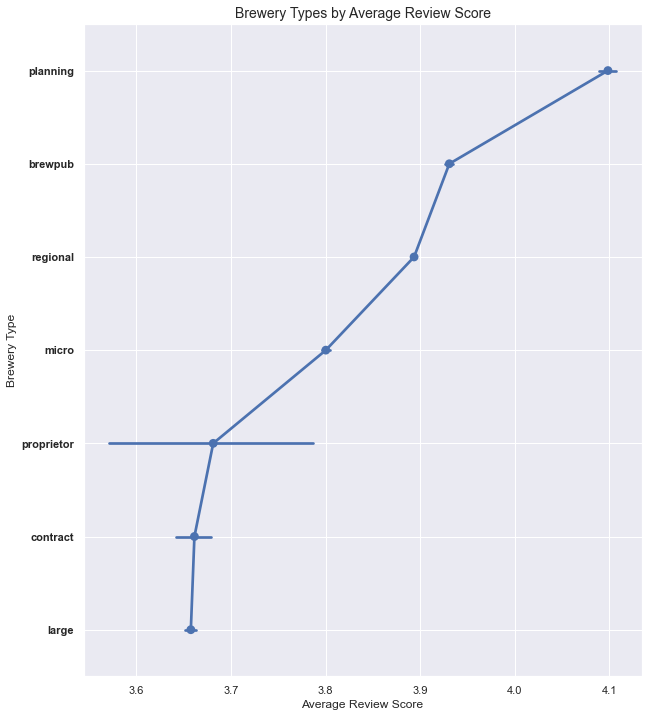

In [141]:
plt.figure(figsize=(10,12))
sns.set_theme(style='darkgrid')

sns.pointplot(data=beer_df_clean, x='weighted_review', y='brewery_type', order=top_brew_type.index)

plt.grid(True)
plt.title('Brewery Types by Average Review Score', fontsize=14)
plt.ylabel('Brewery Type')
plt.xlabel('Average Review Score')
plt.yticks(weight=600);

> For brewery types, the only type with large error bars is "propietor", with only 117 reviews of beers from propietor breweries.
>
>It is interesting how "planning" breweries, which are essentially small home breweries, have the highest ratings. Since these are small batch breweries, it could be the case that more time and attention goes into each batch, which translates to higher reviews. 
>
>On the other end, "large" breweries have the lowest average ratings. Its possible that the opposite phenomena is happening in large breweries, when compared to "planning" breweries. 

---------

`weighted_review` vs. `brewery_name`

In [142]:
# filter and create dataframe. 
brew_filter = beer_df_clean.groupby('brewery_name').count().weighted_review
brew_filter1 = brew_filter[brew_filter<10].index
top25_brew_df = beer_df_clean.query("brewery_name not in @brew_filter1")
top25_brew_df

beer_id                       beer_name  \
0         64883                   Cauldron DIPA   
1         52159             Caldera Ginger Beer   
2         52159             Caldera Ginger Beer   
3         52159             Caldera Ginger Beer   
4         52159             Caldera Ginger Beer   
...         ...                             ...   
563961    58076                      Amber Wave   
563962    58078               Shipwrecked Stout   
563963    58078               Shipwrecked Stout   
563964    58385  Belgian Blonde Anniversary Ale   
563965    69416                  Belgian Dubbel   

                            beer_style  beer_abv  weighted_review  \
0       American Double / Imperial IPA       7.7             4.32   
1                 Herbed / Spiced Beer       4.7             3.35   
2                 Herbed / Spiced Beer       4.7             3.75   
3                 Herbed / Spiced Beer       4.7             3.01   
4                 Herbed / Spiced Beer       4.7             3.68   
...                                ...       ...              ...   
563961        American Amber / Red Ale       5.4             3.46   
563962                  American Stout       6.5             3.31   
563963                  American Stout       6.5             3.75   
563964                Belgian Pale Ale       6.5             3.63   
563965                          Dubbel       6.0             3.27   

        review_overall  review_aroma  review_appearance  review_palate  \
0                  4.0           4.5                4.0            4.0   
1                  3.0           3.5                3.5            3.0   
2                  3.5           3.5                3.5            4.0   
3                  3.0           2.5                3.5            2.0   
4                  4.0           3.0                3.5            3.5   
...                ...           ...                ...            ...   
563961             3.5           3.0                4.0            4.0   
563962             3.0           3.0                4.0            3.5   
563963             3.5           3.5                3.5            4.0   
563964             4.0           3.5                4.0            3.5   
563965             3.0           3.5                3.0            2.5   

        review_taste review_profilename             brewery_name brewery_type  \
0                4.5     johnmichaelsen  Caldera Brewing Company        micro   
1                3.5            oline73  Caldera Brewing Company        micro   
2                4.0          Reidrover  Caldera Brewing Company        micro   
3                3.5       alpinebryant  Caldera Brewing Company        micro   
4                4.0      LordAdmNelson  Caldera Brewing Company        micro   
...              ...                ...                      ...          ...   
563961           3.5            DoubleJ  Pacific Beach Ale House      brewpub   
563962           3.5             glid02  Pacific Beach Ale House      brewpub   
563963           4.0            DoubleJ  Pacific Beach Ale House      brewpub   
563964           3.5             glid02  Pacific Beach Ale House      brewpub   
563965           3.5           mactrail  Pacific Beach Ale House      brewpub   

             city       state   longitude   latitude  
0         Ashland      Oregon -122.663374  42.183738  
1         Ashland      Oregon -122.663374  42.183738  
2         Ashland      Oregon -122.663374  42.183738  
3         Ashland      Oregon -122.663374  42.183738  
4         Ashland      Oregon -122.663374  42.183738  
...           ...         ...         ...        ...  
563961  San Diego  California -117.255265  32.794255  
563962  San Diego  California -117.255265  32.794255  
563963  San Diego  California -117.255265  32.794255  
563964  San Diego  California -117.255265  32.794255  
563965  San Diego  California -117.255265  32.794255  

[563074 rows x 17 columns]

In [143]:
top25_brew = top25_brew_df.groupby('brewery_name').weighted_review.agg(['count', 'mean'])\
            .sort_values(by=['mean'],ascending=False).head(25)
top25_brew

count      mean
brewery_name                                  
Hill Farmstead Brewery          1518  4.283999
Hardywood Park Craft Brewery      22  4.279545
Barley Brown's Brewpub            36  4.250833
Engine 15 Brewing Company         10  4.220000
Free State Brewing Co.           101  4.220000
Surly Brewing Company          12424  4.218210
AleSmith Brewing Company        6303  4.213232
Minneapolis Town Hall Brewery   2623  4.203317
COAST Brewing Company            969  4.193055
Boneyard Beer Company            160  4.192250
FiftyFifty Brewing Co.           617  4.190097
Alpine Beer Company             2940  4.189337
Founders Brewing Company       39910  4.185104
Anchorage Brewing Company        263  4.170266
Logsdon Farmhouse Ales            18  4.148889
Carton Brewing Company            14  4.145714
Bear Republic Brewing Co.       7816  4.145512
Jack's Abby Brewing               59  4.145254
Firestone Walker Brewing Co.   10942  4.136999
Rockmill Brewery                  47  4.125319
Ballast Point Brewing Company  29712  4.114748
Lawson's Finest Liquids          600  4.114433
Golden City Brewery               35  4.111143
Highland Brewing Company Ltd.     19  4.111053
Glacier Brewhouse                100  4.107500

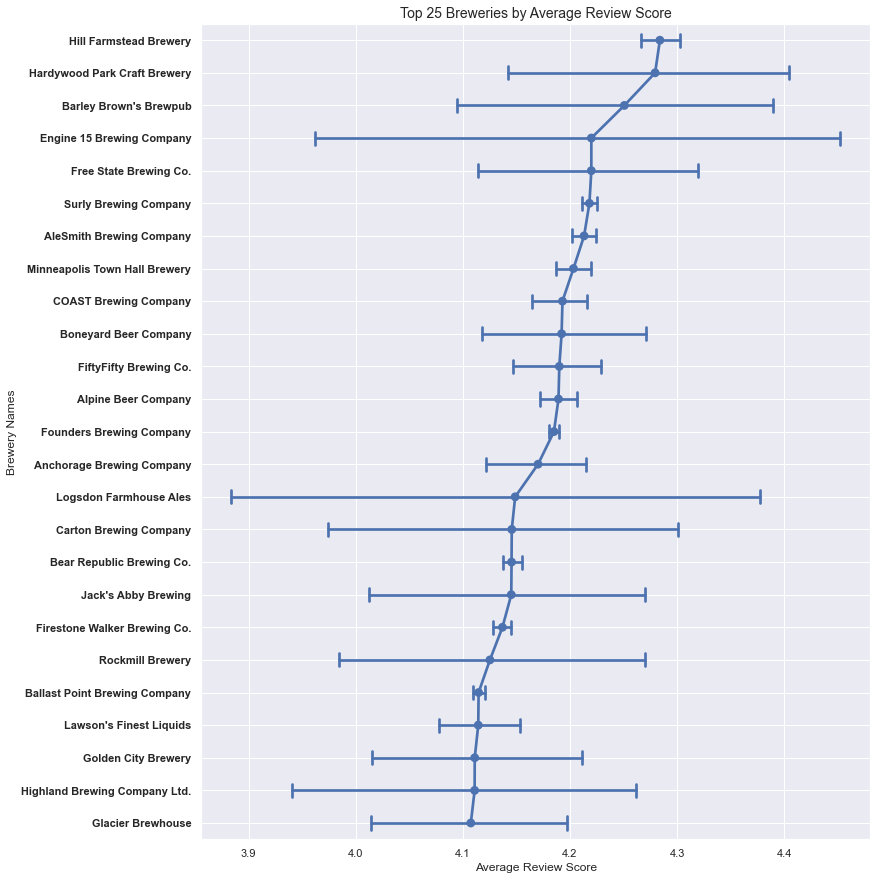

In [144]:
plt.figure(figsize=(12,15))
sns.set_theme(style='darkgrid')

sns.pointplot(data=top25_brew_df, x='weighted_review', y='brewery_name', order=top25_brew.index, capsize=0.4)

plt.grid(True)
plt.title('Top 25 Breweries by Average Review Score', fontsize=14)
plt.ylabel('Brewery Names')
plt.xlabel('Average Review Score')
plt.yticks(weight=600);

------

`weighted_review` vs. `state`

In [145]:
# any states with <10 reviews?
top_states = beer_df_clean.groupby('state').weighted_review.agg(['count', 'mean'])\
            .sort_values(by=['mean'],ascending=False).reset_index()
top_states['mean'] = top_states['mean'].round(2)
top_states

state  count  mean
0                 Kansas    132  4.11
1              Minnesota  19380  4.10
2               Michigan  83054  4.03
3                 Oregon  14889  4.03
4               Virginia   7578  4.00
5                Alabama    328  4.00
6               Illinois  21491  4.00
7             California  81833  4.00
8               Nebraska   6144  3.98
9                  Maine   8982  3.98
10               Florida   7373  3.97
11              New York  38440  3.93
12              Delaware  33892  3.92
13               Georgia    109  3.92
14        South Carolina   1749  3.91
15                Alaska   3651  3.87
16          Pennsylvania   4709  3.84
17           Connecticut    253  3.82
18                  Ohio  71603  3.81
19            Washington   5782  3.80
20              Colorado  28979  3.80
21         West Virginia     41  3.79
22            New Mexico     23  3.78
23        North Carolina   2531  3.78
24                  Iowa    266  3.77
25         Massachusetts  19437  3.77
26          North Dakota      6  3.74
27              Maryland  19607  3.73
28               Montana   3179  3.72
29               Indiana   1290  3.72
30            New Jersey   2645  3.71
31                 Idaho   1224  3.71
32  District of Columbia     59  3.70
33                Nevada    448  3.70
34               Vermont  12234  3.69
35               Arizona    797  3.68
36           Mississippi    630  3.67
37                Hawaii   4048  3.65
38               Wyoming     20  3.62
39         New Hampshire   1514  3.60
40             Wisconsin  12923  3.59
41          Rhode Island    313  3.58
42                  Utah   1052  3.57
43              Kentucky    588  3.57
44                 Texas   7528  3.55
45              Arkansas    276  3.52
46          South Dakota     92  3.50
47             Tennessee    237  3.49
48             Louisiana   4991  3.45
49              Oklahoma    100  3.09
50              Missouri  25067  3.07

> North Dakota is the only state with less than 10 reviews, but we won't drop it so that we can at least compare all 50 states. 

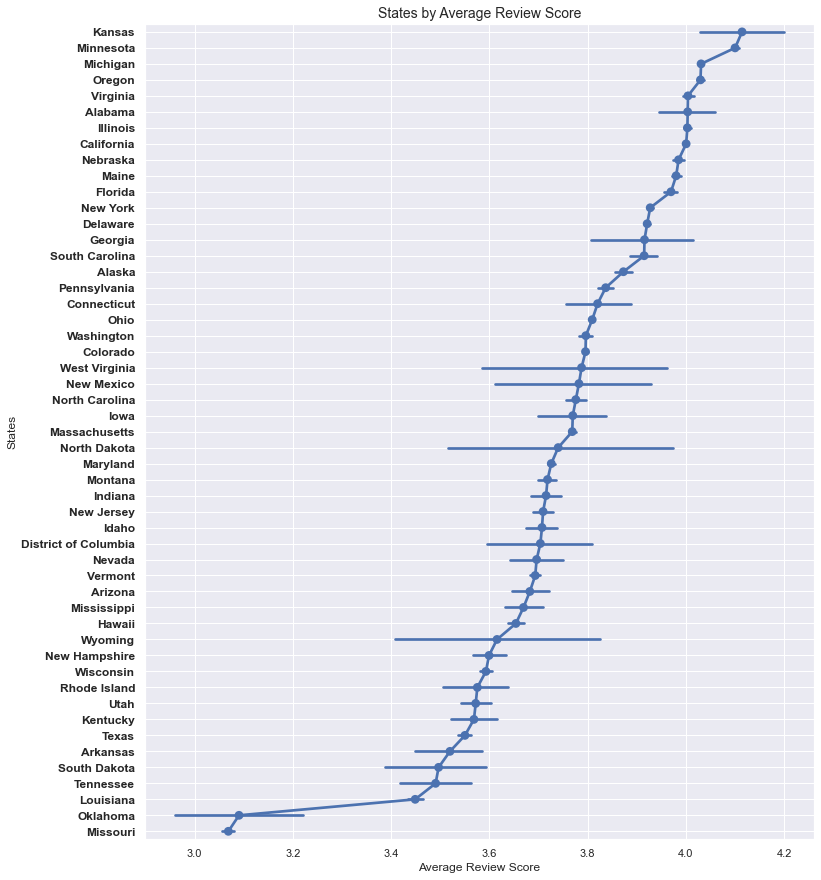

In [146]:
plt.figure(figsize=(12,15))
sns.set_theme(style='darkgrid')

sns.pointplot(data=beer_df_clean, x='weighted_review', y='state', order=top_states.state)

plt.grid(True)
plt.title('States by Average Review Score', fontsize=14)
plt.ylabel('States')
plt.xlabel('Average Review Score')
plt.yticks(weight=600, fontsize=12);

>Oklahoma and Missouri seem to have signifcantly lower review ratings than the rest of the states. I wonder if the "large" breweries are located in either Oklahoma or Missouri, since they have the lowest review ratings?

In [147]:
beer_df_clean.query("state == 'Missouri'").brewery_type.value_counts()

large         15165
regional       7696
micro          1916
brewpub         219
contract         61
proprietor       10
Name: brewery_type, dtype: int64

In [148]:
beer_df_clean.query("state == 'Missouri'").brewery_name.value_counts()

Anheuser-Busch                       15165
Boulevard Brewing Co.                 7676
O'Fallon Brewery                      1667
Charleville Vineyard Microbrewery      192
Flat Branch Pub & Brewery               67
Cathedral Square Brewery                61
Perennial Artisan Ales                  50
McCoy's Public House                    40
Augusta Brewing Company                 34
Ferguson Brewing Company                26
Prison Brews                            20
Schlafly Bottleworks                    16
Broadway Brewery & Restaurant           14
2nd Shift Brewery                       12
Morgan Street Brewery                   10
Charlie's Steak, Ribs & Ale              6
4 Hands Brewing Co.                      4
Piney River Brewing Company              4
Public House Brewing Company             3
Name: brewery_name, dtype: int64

> So it looks like there about 15,000 reviews from the "large" brewery, Anheuser-Busch, which most likely is dragging down the average review score for beers brewed in Missouri, since "large" breweries also have the lowest average rating.
>
> The last thing I want to do with this state data is create some sort of geospatial plot that might show some regional trends in average ratings. Let's give that a shot. 

In [149]:
# First we need to add a state 'code' column to properly map the states in the map/
state_codes = {
    "Alabama":"AL",
    "Alaska":"AK",
    "Arizona":"AZ",
    "Arkansas":"AR",
    "California":"CA",
    "Colorado":"CO",
    "Connecticut":"CT",
    "Delaware":"DE",
    "District of Columbia":"DC",
    "Florida":"FL",
    "Georgia":"GA",
    "Hawaii":"HI",
    "Idaho":"ID",
    "Illinois":"IL",
    "Indiana":"IN",
    "Iowa":"IA",
    "Kansas":"KS",
    "Kentucky":"KY",
    "Louisiana":"LA",
    "Maine":"ME",
    "Montana":"MT",
    "Nebraska":"NE",
    "Nevada":"NV",
    "New Hampshire":"NH",
    "New Jersey":"NJ",
    "New Mexico":"NM",
    "New York":"NY",
    "North Carolina":"NC",
    "North Dakota":"ND",
    "Ohio":"OH",
    "Oklahoma":"OK",
    "Oregon":"OR",
    "Maryland":"MD",
    "Massachusetts":"MA",
    "Michigan":"MI",
    "Minnesota":"MN",
    "Mississippi":"MS",
    "Missouri":"MO",
    "Pennsylvania":"PA",
    "Rhode Island":"RI",
    "South Carolina":"SC",
    "South Dakota":"SD",
    "Tennessee":"TN",
    "Texas":"TX",
    "Utah":"UT",
    "Vermont":"VT",
    "Virginia":"VA",
    "Washington":"WA",
    "West Virginia":"WV",
    "Wisconsin":"WI",
    "Wyoming":"WY"
}

In [150]:
top_states['state_code'] = top_states.state.replace(to_replace=state_codes)
top_states

state  count  mean state_code
0                 Kansas    132  4.11         KS
1              Minnesota  19380  4.10         MN
2               Michigan  83054  4.03         MI
3                 Oregon  14889  4.03         OR
4               Virginia   7578  4.00         VA
5                Alabama    328  4.00         AL
6               Illinois  21491  4.00         IL
7             California  81833  4.00         CA
8               Nebraska   6144  3.98         NE
9                  Maine   8982  3.98         ME
10               Florida   7373  3.97         FL
11              New York  38440  3.93         NY
12              Delaware  33892  3.92         DE
13               Georgia    109  3.92         GA
14        South Carolina   1749  3.91         SC
15                Alaska   3651  3.87         AK
16          Pennsylvania   4709  3.84         PA
17           Connecticut    253  3.82         CT
18                  Ohio  71603  3.81         OH
19            Washington   5782  3.80         WA
20              Colorado  28979  3.80         CO
21         West Virginia     41  3.79         WV
22            New Mexico     23  3.78         NM
23        North Carolina   2531  3.78         NC
24                  Iowa    266  3.77         IA
25         Massachusetts  19437  3.77         MA
26          North Dakota      6  3.74         ND
27              Maryland  19607  3.73         MD
28               Montana   3179  3.72         MT
29               Indiana   1290  3.72         IN
30            New Jersey   2645  3.71         NJ
31                 Idaho   1224  3.71         ID
32  District of Columbia     59  3.70         DC
33                Nevada    448  3.70         NV
34               Vermont  12234  3.69         VT
35               Arizona    797  3.68         AZ
36           Mississippi    630  3.67         MS
37                Hawaii   4048  3.65         HI
38               Wyoming     20  3.62         WY
39         New Hampshire   1514  3.60         NH
40             Wisconsin  12923  3.59         WI
41          Rhode Island    313  3.58         RI
42                  Utah   1052  3.57         UT
43              Kentucky    588  3.57         KY
44                 Texas   7528  3.55         TX
45              Arkansas    276  3.52         AR
46          South Dakota     92  3.50         SD
47             Tennessee    237  3.49         TN
48             Louisiana   4991  3.45         LA
49              Oklahoma    100  3.09         OK
50              Missouri  25067  3.07         MO

In [151]:
import plotly.graph_objects as go

fig = go.Figure(data = go.Choropleth(
    locations = top_states['state_code'],
    z = top_states['mean'],
    locationmode = 'USA-states',
    text = top_states['state']+'<br>'+'# reviews: '+ top_states['count'].astype(str),
    colorscale = 'Blues',
    colorbar_title = 'Average<br>Review<br>Score',
    colorbar = {'ticks':'outside'}
))

fig.update_layout(
    title_text = 'Average Beer Rating by State<br>(Hover for more info)',
    geo = dict(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)')
)

> So interestingly enough this heatmap of the US does give us some additional insight.
>
> For example, it looks like the coasts brew higher rated beer than the middle of the country. Except for Kansas and Nebraska which have the 1st and 9th highest average reviews respectively. Kansas tops the list with an average rating of 4.11, however it only has 132 reviews, which is realtively low. 
>
> In addition, it looks like the states surrounding the Great Lakes have high ratings as well. This is interesting, I wonder if it is because they have easy access to fresh water?

> Next, I want to try and make a similar geospatial map with cities, and then figure how to overlay the two maps into one visualization. 

In [152]:
# first we want to filter out cities with less than 10 reviews. 
city_filter = beer_df_clean.city.value_counts()
city_filter = city_filter[city_filter>=10].index
top_cities_df = beer_df_clean.query('city in @city_filter')
top_cities_df

beer_id                       beer_name  \
0         64883                   Cauldron DIPA   
1         52159             Caldera Ginger Beer   
2         52159             Caldera Ginger Beer   
3         52159             Caldera Ginger Beer   
4         52159             Caldera Ginger Beer   
...         ...                             ...   
563961    58076                      Amber Wave   
563962    58078               Shipwrecked Stout   
563963    58078               Shipwrecked Stout   
563964    58385  Belgian Blonde Anniversary Ale   
563965    69416                  Belgian Dubbel   

                            beer_style  beer_abv  weighted_review  \
0       American Double / Imperial IPA       7.7             4.32   
1                 Herbed / Spiced Beer       4.7             3.35   
2                 Herbed / Spiced Beer       4.7             3.75   
3                 Herbed / Spiced Beer       4.7             3.01   
4                 Herbed / Spiced Beer       4.7             3.68   
...                                ...       ...              ...   
563961        American Amber / Red Ale       5.4             3.46   
563962                  American Stout       6.5             3.31   
563963                  American Stout       6.5             3.75   
563964                Belgian Pale Ale       6.5             3.63   
563965                          Dubbel       6.0             3.27   

        review_overall  review_aroma  review_appearance  review_palate  \
0                  4.0           4.5                4.0            4.0   
1                  3.0           3.5                3.5            3.0   
2                  3.5           3.5                3.5            4.0   
3                  3.0           2.5                3.5            2.0   
4                  4.0           3.0                3.5            3.5   
...                ...           ...                ...            ...   
563961             3.5           3.0                4.0            4.0   
563962             3.0           3.0                4.0            3.5   
563963             3.5           3.5                3.5            4.0   
563964             4.0           3.5                4.0            3.5   
563965             3.0           3.5                3.0            2.5   

        review_taste review_profilename             brewery_name brewery_type  \
0                4.5     johnmichaelsen  Caldera Brewing Company        micro   
1                3.5            oline73  Caldera Brewing Company        micro   
2                4.0          Reidrover  Caldera Brewing Company        micro   
3                3.5       alpinebryant  Caldera Brewing Company        micro   
4                4.0      LordAdmNelson  Caldera Brewing Company        micro   
...              ...                ...                      ...          ...   
563961           3.5            DoubleJ  Pacific Beach Ale House      brewpub   
563962           3.5             glid02  Pacific Beach Ale House      brewpub   
563963           4.0            DoubleJ  Pacific Beach Ale House      brewpub   
563964           3.5             glid02  Pacific Beach Ale House      brewpub   
563965           3.5           mactrail  Pacific Beach Ale House      brewpub   

             city       state   longitude   latitude  
0         Ashland      Oregon -122.663374  42.183738  
1         Ashland      Oregon -122.663374  42.183738  
2         Ashland      Oregon -122.663374  42.183738  
3         Ashland      Oregon -122.663374  42.183738  
4         Ashland      Oregon -122.663374  42.183738  
...           ...         ...         ...        ...  
563961  San Diego  California -117.255265  32.794255  
563962  San Diego  California -117.255265  32.794255  
563963  San Diego  California -117.255265  32.794255  
563964  San Diego  California -117.255265  32.794255  
563965  San Diego  California -117.255265  32.794255  

[563243 rows x 17 columns]

In [153]:
# create dataframe of cities ranked by average rating. 
top_cities = top_cities_df.groupby('city').weighted_review.agg(['count', 'mean'])\
            .sort_values(by=['mean'],ascending=False).reset_index()
top_cities['mean'] = top_cities['mean'].round(2)
top_cities

city  count  mean
0     Greensboro Bend   1518  4.28
1          Baker City     36  4.25
2        Brooklyn Ctr   6212  4.22
3         Minneapolis   8971  4.21
4    North Charleston    969  4.19
..                ...    ...   ...
339     Saint Charles    117  2.68
340             Osseo     60  2.67
341          Inyokern    206  2.67
342       Saint Louis  15344  2.58
343     Big Bear Lake     18  2.32

[344 rows x 3 columns]

> I am going to skip the pointplot for cities during this part of the analysis, and revisit it during the explanatory analysis so that we can go straight into the map. 
>
> First we need to append longitudes and latitudes to the `top_cities` dataframe as location references for the map. 

In [154]:
top_cities = top_cities.merge(top_cities_df.groupby('city').first(), on='city')[['city', 'count', 'mean', 'longitude', 'latitude']]
top_cities

city  count  mean   longitude   latitude
0     Greensboro Bend   1518  4.28         NaN        NaN
1          Baker City     36  4.25 -117.829496  44.778780
2        Brooklyn Ctr   6212  4.22  -93.324389  45.042942
3         Minneapolis   8971  4.21  -93.266640  45.046388
4    North Charleston    969  4.19         NaN        NaN
..                ...    ...   ...         ...        ...
339     Saint Charles    117  2.68         NaN        NaN
340             Osseo     60  2.67  -91.226651  44.582707
341          Inyokern    206  2.67         NaN        NaN
342       Saint Louis  15344  2.58  -90.302316  38.738390
343     Big Bear Lake     18  2.32 -116.923042  34.238761

[344 rows x 5 columns]

In [155]:
# drop any cities without location data.
top_cities.dropna(inplace=True)
top_cities

city  count  mean   longitude   latitude
1            Baker City     36  4.25 -117.829496  44.778780
2          Brooklyn Ctr   6212  4.22  -93.324389  45.042942
3           Minneapolis   8971  4.21  -93.266640  45.046388
6          Grand Rapids  20101  4.18  -85.676575  42.952496
7    Atlantic Highlands     14  4.15  -74.038165  40.411769
..                  ...    ...   ...         ...        ...
335              Monroe   1341  2.91  -89.641509  42.598631
337           La Crosse    409  2.73  -91.253350  43.804355
340               Osseo     60  2.67  -91.226651  44.582707
342         Saint Louis  15344  2.58  -90.302316  38.738390
343       Big Bear Lake     18  2.32 -116.923042  34.238761

[256 rows x 5 columns]

In [156]:
# round longitude and latitude values so that they aren't cumbersome when they are shown on the map. 
top_cities[['longitude', 'latitude']] = top_cities[['longitude', 'latitude']].round(2)
top_cities

city  count  mean  longitude  latitude
1            Baker City     36  4.25    -117.83     44.78
2          Brooklyn Ctr   6212  4.22     -93.32     45.04
3           Minneapolis   8971  4.21     -93.27     45.05
6          Grand Rapids  20101  4.18     -85.68     42.95
7    Atlantic Highlands     14  4.15     -74.04     40.41
..                  ...    ...   ...        ...       ...
335              Monroe   1341  2.91     -89.64     42.60
337           La Crosse    409  2.73     -91.25     43.80
340               Osseo     60  2.67     -91.23     44.58
342         Saint Louis  15344  2.58     -90.30     38.74
343       Big Bear Lake     18  2.32    -116.92     34.24

[256 rows x 5 columns]

> Before we plot, we're going to need a dummy row, since there are no cities with average scores less than 2. What this means is that the legend on the map won't show a marker for data points between 1-2. Rather it would only show markers for, 2-3, 3-4, and 4-5, which is incomplete. 
>
> Having a dummy row with NaN values will give us a data point we can use to populate a marker for review scores 1-2, even though there are no cities with an average score below 2. 

In [157]:
top_cities.reset_index(drop=True, inplace=True)
top_cities = top_cities.append({'city':'Dummy row', 'count':np.nan, 'mean':np.nan, 'longitude':np.nan, 'latitude':np.nan}, ignore_index=True)
top_cities

city    count  mean  longitude  latitude
0            Baker City     36.0  4.25    -117.83     44.78
1          Brooklyn Ctr   6212.0  4.22     -93.32     45.04
2           Minneapolis   8971.0  4.21     -93.27     45.05
3          Grand Rapids  20101.0  4.18     -85.68     42.95
4    Atlantic Highlands     14.0  4.15     -74.04     40.41
..                  ...      ...   ...        ...       ...
252           La Crosse    409.0  2.73     -91.25     43.80
253               Osseo     60.0  2.67     -91.23     44.58
254         Saint Louis  15344.0  2.58     -90.30     38.74
255       Big Bear Lake     18.0  2.32    -116.92     34.24
256           Dummy row      NaN   NaN        NaN       NaN

[257 rows x 5 columns]

> Now we have a clean dataframe to use to create the map.

In [158]:
limits = [1,2,3,4]
colors = ['lightcyan', 'rgb(59,59,59)', 'cornflowerblue', 'rgb(241,105,19)']

fig = go.Figure()

# trace for dummy data, used to populate a 1-2 marker in the legend. 
df_1_2 = top_cities.query("city == 'Dummy row'")    
fig.add_trace(go.Scattergeo(
    name = '1 - 2',
    visible = 'legendonly',
    showlegend = True,
    lon = df_1_2['longitude'],
    lat = df_1_2['latitude'],
    marker = dict(
        color = 'lightgrey',
        line_color = 'rgb(40,40,40)',
        line_width = 0.5,
        size = 8)))

# city review data
for i in range(len(limits)):
    df_sub = top_cities[top_cities['mean'].between(i+1, i+2)]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['city']+'<br>'+'Review score: '+df_sub['mean'].astype(str)+'<br>'+'# reviews: '+df_sub['count'].astype(str),
        name = f'{i+1} - {i+2}',
        marker = dict(
            color = colors[i],
            opacity = 0.8,
            size = 8,
            line_color = 'rgb(40,40,40)',
            line_width = 0.5))) 

fig.update_layout(
        title = dict(
            text = 'Average Beer Rating by City<br>(Click on legend to toggle ratings)',
            xanchor = 'center',
            x = 0.5),
        showlegend = True,
        legend = dict(
            title = 'Review Score',
            x = 0.92,
            y = 0.52),
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217,217,217)'))

> Similar to the state map, many of the high rated cities are located on the coasts and around the great lakes. 
>
> No that we have two independent maps for states and cities, I want to try and merge both of them into one comprehensive map. 
>
> Individually, using color encodings works well, however if I want to combined them then I can't use color encodings for both. I think it would be best to keep the color encoding for the state portion of the map, and change the encoding for cities to color and shape.

In [159]:
colors = ['white', 'gold', 'crimson']
shapes = ['x', 'circle', 'star']
opacities = [1, 0.8, 1]
sizes = [9,8,10]

# state data
fig = go.Figure(go.Choropleth(
    locations = top_states['state_code'],
    z = top_states['mean'],
    locationmode = 'USA-states',
    text = top_states['state']+'<br>'+'# reviews: '+ top_states['count'].astype(str),
    name = 'state',
    colorscale = 'Blues',
    colorbar_title = 'State<br>Review<br>Score',
    colorbar = dict(
        ticks = 'outside',
        x = 0.95,
        y = 0.55)))

# trace for dummy data, used to populate a 1-2 marker in the legend. 
df_1_2 = top_cities.query("city == 'Dummy row'")    
fig.add_trace(go.Scattergeo(
    name = '1 - 2',
    visible = 'legendonly',
    showlegend = True,
    lon = df_1_2['longitude'],
    lat = df_1_2['latitude'],
    marker = dict(
        symbol = 'x-thin',
        color = 'black',
        line_color = 'rgb(40,40,40)',
        line_width = 0.5,
        size = 8)))

# city data
for i in range(len(colors)):
    df_sub = top_cities[top_cities['mean'].between(i+2, i+3)]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['city']+'<br>'+'Review score: '+df_sub['mean'].astype(str)+'<br>'+'# reviews: '+df_sub['count'].astype(str),
        name = f'{i+2} - {i+3}',
        marker = dict(
            symbol = shapes[i],
            color = colors[i],
            size = sizes[i],
            opacity= opacities[i],
            line_color = 'black',
            line_width = 0.75))) 

fig.update_layout(
        title = dict(
            text = 'Top Rated States & Cities for Drinking Beer<br>(Click on legend to toggle ratings)',
            xanchor = 'center',
            x = 0.5), 
        showlegend = True,
        legend = dict(
            title = dict(
                text = 'City Review Score',
                side = 'top'),
            xanchor = 'center',
            x = 0.5,
            y = -0.03,
            itemsizing = 'trace',
            orientation = 'h'),
        geo = dict(
            scope = 'usa',
            projection = go.layout.geo.Projection(type = 'albers usa'),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
            landcolor = 'rgb(217,217,217)'))

> Adding a shape encoding does seem to help a little bit when combining the two maps. Cities with the highest ratings, 4-5, stand out more with the star shape encoding.
>
> By combining the two maps we can see a nice correlation between high rated states and the number of high rated cities in that state. 
>
> With that said, this does seem a bit noisy, especially to someone looking at the data for the first time. I don't think I will include this in the explanatory part of the analysis, but it was still cool to play with. 

-------

> Now I want to move onto exploring a few qualitative variables with the quantitative variable `beer_abv`.
>
> Let's take a look at `beer_abv` vs. `beer_style`.
>
>First we will need to drop all beers that have multiple reviews, so that the `beer_abv` means aren't skewed by beers that have more reviews. 

In [160]:
beer_unique = beer_df_clean.drop_duplicates(subset=['beer_name'])
beer_unique

beer_id                       beer_name  \
0         64883                   Cauldron DIPA   
1         52159             Caldera Ginger Beer   
10        10789           Caldera Oatmeal Stout   
12        12386                  Caldera OBF 15   
13        58046                   Rauch Ür Bock   
...         ...                             ...   
563949    44662                 Whitewash Wheat   
563955    46681                       PB Porter   
563959    58076                      Amber Wave   
563962    58078               Shipwrecked Stout   
563964    58385  Belgian Blonde Anniversary Ale   

                            beer_style  beer_abv  weighted_review  \
0       American Double / Imperial IPA       7.7             4.32   
1                 Herbed / Spiced Beer       4.7             3.35   
10                       Oatmeal Stout       7.2             2.97   
12                 American Pale Lager       5.6             3.76   
13                           Rauchbier       7.4             4.36   
...                                ...       ...              ...   
563949                         Witbier       5.5             3.85   
563955                 American Porter       6.5             3.50   
563959        American Amber / Red Ale       5.4             3.29   
563962                  American Stout       6.5             3.31   
563964                Belgian Pale Ale       6.5             3.63   

        review_overall  review_aroma  review_appearance  review_palate  \
0                  4.0           4.5                4.0            4.0   
1                  3.0           3.5                3.5            3.0   
10                 3.0           3.0                2.5            3.0   
12                 4.0           3.0                4.0            4.0   
13                 4.5           4.5                3.0            4.0   
...                ...           ...                ...            ...   
563949             4.0           4.0                4.0            4.5   
563955             3.5           3.5                3.5            3.5   
563959             4.0           3.5                2.5            3.0   
563962             3.0           3.0                4.0            3.5   
563964             4.0           3.5                4.0            3.5   

        review_taste review_profilename             brewery_name brewery_type  \
0                4.5     johnmichaelsen  Caldera Brewing Company        micro   
1                3.5            oline73  Caldera Brewing Company        micro   
10               3.0   Beerandraiderfan  Caldera Brewing Company        micro   
12               4.0         beerguy101  Caldera Brewing Company        micro   
13               4.5        UCLABrewN84  Caldera Brewing Company        micro   
...              ...                ...                      ...          ...   
563949           3.5           mactrail  Pacific Beach Ale House      brewpub   
563955           3.5             armock  Pacific Beach Ale House      brewpub   
563959           3.0     GarthDanielson  Pacific Beach Ale House      brewpub   
563962           3.5             glid02  Pacific Beach Ale House      brewpub   
563964           3.5             glid02  Pacific Beach Ale House      brewpub   

             city       state   longitude   latitude  
0         Ashland      Oregon -122.663374  42.183738  
1         Ashland      Oregon -122.663374  42.183738  
10        Ashland      Oregon -122.663374  42.183738  
12        Ashland      Oregon -122.663374  42.183738  
13        Ashland      Oregon -122.663374  42.183738  
...           ...         ...         ...        ...  
563949  San Diego  California -117.255265  32.794255  
563955  San Diego  California -117.255265  32.794255  
563959  San Diego  California -117.255265  32.794255  
563962  San Diego  California -117.255265  32.794255  
563964  San Diego  California -117.255265  32.794255  

[9590 rows x 17 columns]

In [161]:
top25_style_abv = beer_unique.groupby('beer_style').beer_abv.agg(['count', 'mean']).sort_values(by='mean', ascending=False)
top25_style_abv = top25_style_abv.query('count >= 10')
top25_style_abv = top25_style_abv.head(25)
top25_style_abv

count       mean
beer_style                                          
Eisbock                                11  11.118182
American Barleywine                   197  10.582538
Quadrupel (Quad)                       51  10.487255
English Barleywine                     74  10.417568
Wheatwine                              42  10.326190
American Double / Imperial Stout      305  10.236492
Russian Imperial Stout                165   9.816848
Belgian Strong Dark Ale               125   9.542480
American Strong Ale                   206   9.320534
Tripel                                129   9.207442
American Double / Imperial IPA        360   9.031500
Braggot                                13   8.846154
Belgian Strong Pale Ale               109   8.771101
Old Ale                                77   8.723377
American Malt Liquor                   20   8.330000
Weizenbock                             52   8.282308
Doppelbock                            102   8.248725
English Strong Ale                     34   8.208824
Baltic Porter                          68   8.183676
Scotch Ale / Wee Heavy                126   8.153095
American Double / Imperial Pilsner     37   7.881081
Belgian IPA                            77   7.818442
Dubbel                                 94   7.535851
American Black Ale                    102   7.408725
Flanders Oud Bruin                     19   7.405263

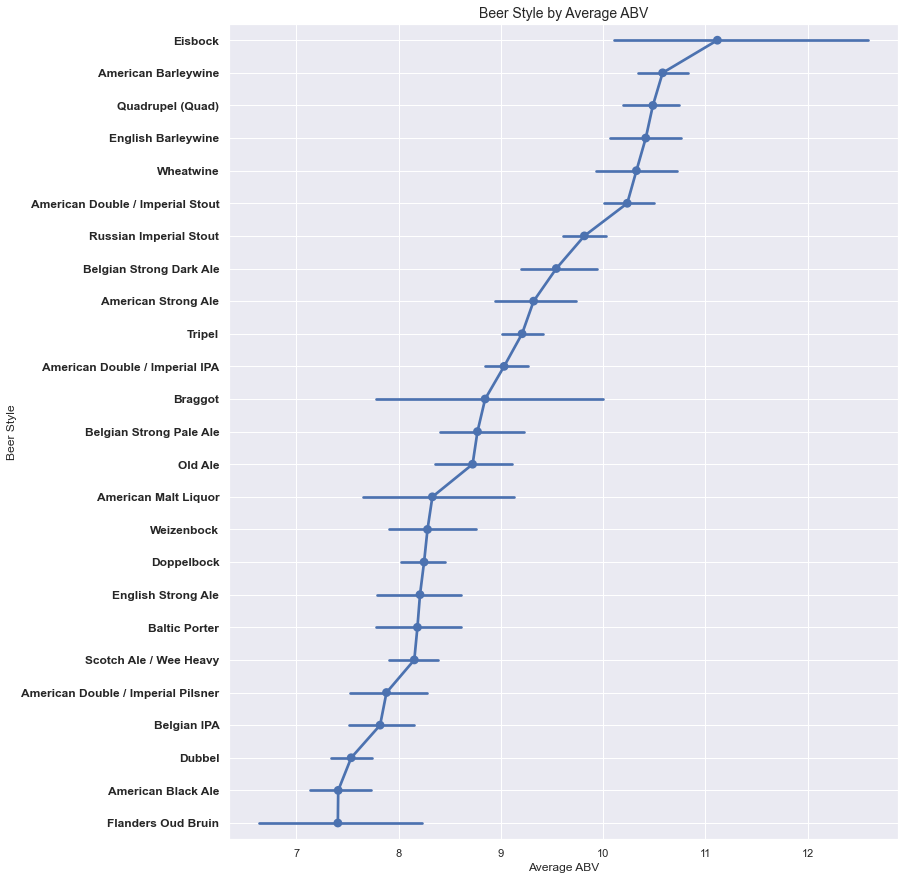

In [162]:
plt.figure(figsize=(12,15))
sns.set_theme(style='darkgrid')

sns.pointplot(data=beer_unique, x='beer_abv', y='beer_style', order=top25_style_abv.index)

plt.grid(True)
plt.title('Beer Style by Average ABV', fontsize=14)
plt.ylabel('Beer Style')
plt.xlabel('Average ABV')
plt.yticks(weight=600, fontsize=12);

> The above plot shows the top 25 beer styles based on average ABV. The highest average ABV beer style is Eisbock, which has a fairly large error bar due to only having 11 unique Eisbock style beers in the dataset. 
>
> I've never heard of a "wine" brew, like barleywine or wheatwine, but they hold 3 of the top 5 positions with relatively small error bars so there should be an explanation for this. 
>
> A quick [google search](https://www.google.com/search?q=barleywine&rlz=1C1PRFI_enTH902TH902&oq=barleywine&aqs=chrome..69i57j46j0l2j46j0l3.1338j0j7&sourceid=chrome&ie=UTF-8) tells us that it is in fact one of the most intense and strongest beer styles brewed. Cool.

-----

> `beer_abv` vs. `brewery_type`

In [163]:
top_brewtype_abv = beer_unique.groupby('brewery_type').beer_abv.agg(['count', 'mean'])\
                    .sort_values(by='mean', ascending=False).head(25)
top_brewtype_abv

count      mean
brewery_type                 
proprietor        7  7.914286
regional       2504  7.181066
contract        140  6.775000
micro          2591  6.759765
planning         43  6.690698
brewpub        3639  6.583770
large           666  6.550961

> Alright so it looks like "proprietor" breweries have the highest average ABV. However, there are only 7 values making up this mean. So let's take a closer look at these values and see if it is worth keeping "proprietor" breweries. 

In [164]:
beer_unique.query("brewery_type == 'proprietor'")

beer_id                          beer_name  \
75900     65944                       Hop Riot IPA   
75903     65945                        Retribution   
75938     71267                    Pom Cherry Bomb   
75983     73636                    No Boundary IPA   
75990     75585  Bourbon Barrel-Aged Baltic Porter   
75991     75586   Brandy Barrel-Aged Baltic Porter   
344527    73645                     Revival Saison   

                            beer_style  beer_abv  weighted_review  \
75900                     American IPA       7.3             4.25   
75903   American Double / Imperial IPA       9.5             3.43   
75938           Fruit / Vegetable Beer       7.0             4.52   
75983                     American IPA       6.5             4.07   
75990                    Baltic Porter       9.3             2.53   
75991                    Baltic Porter       9.3             2.03   
344527          Saison / Farmhouse Ale       6.5             4.05   

        review_overall  review_aroma  review_appearance  review_palate  \
75900              4.5           4.5                4.5            4.0   
75903              3.5           3.0                3.5            4.0   
75938              4.5           4.5                4.0            5.0   
75983              4.5           4.0                3.5            4.0   
75990              2.5           2.5                3.0            2.5   
75991              2.0           2.0                2.5            2.0   
344527             4.0           4.0                4.0            4.5   

        review_taste review_profilename         brewery_name brewery_type  \
75900            4.0          Ratman197   High Water Brewing   proprietor   
75903            3.5      TheSevenDuffs   High Water Brewing   proprietor   
75938            4.5          Ratman197   High Water Brewing   proprietor   
75983            4.0         brewandbbq   High Water Brewing   proprietor   
75990            2.5         Arbitrator   High Water Brewing   proprietor   
75991            2.0         Arbitrator   High Water Brewing   proprietor   
344527           4.0     TheManiacalOne  Revival Brewing Co.   proprietor   

            city         state   longitude   latitude  
75900   Stockton    California -121.290780  37.957702  
75903   Stockton    California -121.290780  37.957702  
75938   Stockton    California -121.290780  37.957702  
75983   Stockton    California -121.290780  37.957702  
75990   Stockton    California -121.290780  37.957702  
75991   Stockton    California -121.290780  37.957702  
344527  Cranston  Rhode Island  -71.471696  41.789838

> So it doesn't seem like there are any beers in specific that are skewing the mean. However, since we have been holding to the minimum of 10 reviews/values to be considered significant during this analysis, let's stay consistent and drop "proprietor" breweries. 

In [165]:
top_brewtype_abv = top_brewtype_abv.query("count >= 10")
top_brewtype_abv

count      mean
brewery_type                 
regional       2504  7.181066
contract        140  6.775000
micro          2591  6.759765
planning         43  6.690698
brewpub        3639  6.583770
large           666  6.550961

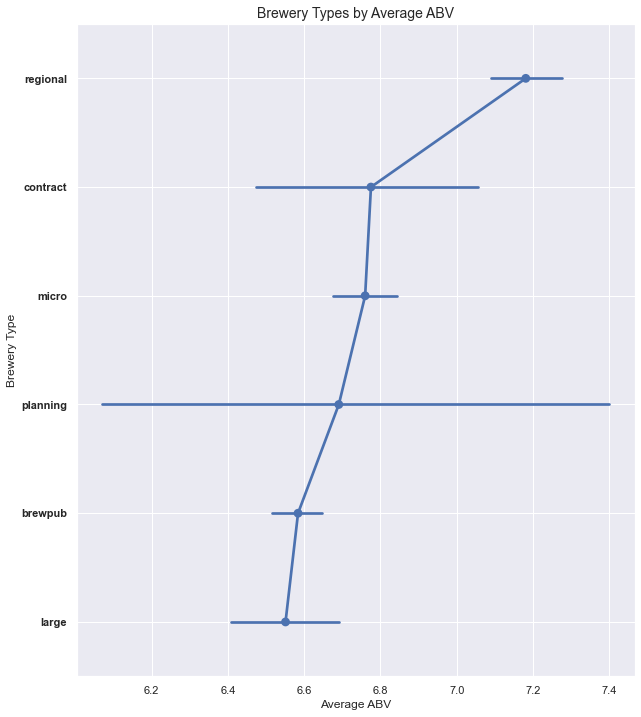

In [166]:
plt.figure(figsize=(10,12))
sns.set_theme(style='darkgrid')

sns.pointplot(data=beer_unique, x='beer_abv', y='brewery_type', order=top_brewtype_abv.index)

plt.grid(True)
plt.title('Brewery Types by Average ABV', fontsize=14)
plt.ylabel('Brewery Type')
plt.xlabel('Average ABV')
plt.yticks(weight=600);

> It's interesting to see "large" breweries at the bottom of average ABV. It makes sense though, since large breweries are brewing for profit at scale, and making lower ABV beer is cheaper and faster than higher ABV beer. 

--------

### Bivariate findings and relationships 

> In this section we focused on a few quantitative variables, `review_overall`, `weighted_review`, and `beer_abv`. We compared these variables to a host of different qualitative variables, such as `beer_name`, `brewery_type`, `state` etc. 
>
> Some interesting findings with these variables:    
    > - `review_taste` has the highest correlation with `review_overall`, while `beer_abv` has the lowest correlation with `review_overall`.  
    > - Stout beers outperform in terms of average review score for both style and specific beers.
    > - 'Planning' breweries, such as home breweries, have the highest average review scores. 
While 'large' breweries have the lowest average review scores. 
    >- Based on the geospatial maps, we found that states located on the coasts and around
the great lakes tend to have higher average review scores. We found the same trend
with cities. 
    >- When it came to `beer_abv`, we found that wine style beers, such as barleywine and wheatwine,
have some of the highest average ABV values of any beer style, with 3 out of the top 5 ranking spots
in `Beer Style by Average ABV`. 
    >- We also found that 'large' breweries have the lowest average ABV values. This makes sense, especially in tandem 
with having the lowest average review scores, since large breweries optimize for mass production. Part of that optimization causes large breweries to sacrifice quality, and produce beers with low ABV levels, which in general are faster
and cheaper to brew.

-------

<a id='multivariate'></a>
## <u> Multivariate Exploration <u/>   <a href="#top" style="font-size :12px">(Back to top)</a>

> For this section, I want to start by looking at the correlations between `review_overall`, which is the reviewer's overall impression of the beer, and the other review categories (subcategories), `review_aroma`, `review_appearance`, `review_palate`, `review_taste`, with respect to individual reviewers in the dataset. In other words, which reviewers can you trust or have the most confidence in when it comes to their review scores. The idea is if an individual reviewer has higher correlation coefficients between `review_overall` and the subcategories, then their overall review score will more consistenly reflect the scores they gave for the subcategories. For example, we would want to trust a reviewer who gave the subcategories all 4s, and also `review_overall` a 4 (high correlations), vs. a reviewer who gave the subcategories all 4s, and `review_overall` a 2 (lower correlations).
>
> There are too many reviewers to plot all of them, therefore we will just look at the top 10 most popular reviewers. This means the top 10 reviewers with the most reviews in the dataset.  

In [167]:
# We'll start by finding the most popular reviewers and create a dataframe. 
top10_reviewers = beer_df_clean.review_profilename.value_counts(ascending=False).head(10)\
                  .reset_index().rename(columns={'index':'reviewer'})
top10_reviewers

reviewer  review_profilename
0     mikesgroove                1657
1       Thorpe429                1503
2   BuckeyeNation                1345
3   womencantsail                1342
4  northyorksammy                1240
5        brentk56                1137
6   feloniousmonk                1021
7         akorsak                1016
8    ChainGangGuy                 987
9          WesWes                 975

In [168]:
top10_reviewers_df = beer_df_clean.query('review_profilename in @top10_reviewers.reviewer')
top10_reviewers_df

beer_id                      beer_name                beer_style  \
38        58046                  Rauch Ür Bock                 Rauchbier   
61        25414               Caldera Pale Ale   American Pale Ale (APA)   
71        25414               Caldera Pale Ale   American Pale Ale (APA)   
109       25414               Caldera Pale Ale   American Pale Ale (APA)   
114       25414               Caldera Pale Ale   American Pale Ale (APA)   
...         ...                            ...                       ...   
563920    57258                     Red Velvet  American Amber / Red Ale   
563924    72212       Bourbon Oaked Solidarity     English Dark Mild Ale   
563925    75355                   Unity (2011)    Saison / Farmhouse Ale   
563932    68048  Populist IPA In Spanish Cedar              American IPA   
563935    55297                     Revolution   American Pale Ale (APA)   

        beer_abv  weighted_review  review_overall  review_aroma  \
38           7.4             3.97             4.0           4.0   
61           5.5             3.91             4.0           3.5   
71           5.5             3.88             4.0           3.5   
109          5.5             3.92             4.5           3.5   
114          5.5             3.32             3.0           4.0   
...          ...              ...             ...           ...   
563920      10.0             2.63             2.0           3.5   
563924       3.8             3.23             3.5           3.5   
563925       6.7             3.68             4.0           3.5   
563932       7.0             2.41             1.5           3.0   
563935       5.6             3.58             3.5           3.5   

        review_appearance  review_palate  review_taste review_profilename  \
38                    3.5            4.0           4.0     northyorksammy   
61                    4.5            4.0           4.0        mikesgroove   
71                    4.0            4.0           4.0            akorsak   
109                   3.0            4.0           4.0           brentk56   
114                   3.5            3.5           3.0       ChainGangGuy   
...                   ...            ...           ...                ...   
563920                4.0            3.5           2.0      womencantsail   
563924                4.0            2.5           3.0      womencantsail   
563925                4.0            4.0           3.5      womencantsail   
563932                4.0            3.5           2.0      womencantsail   
563935                4.0            4.0           3.5      womencantsail   

                   brewery_name brewery_type         city       state  \
38      Caldera Brewing Company        micro      Ashland      Oregon   
61      Caldera Brewing Company        micro      Ashland      Oregon   
71      Caldera Brewing Company        micro      Ashland      Oregon   
109     Caldera Brewing Company        micro      Ashland      Oregon   
114     Caldera Brewing Company        micro      Ashland      Oregon   
...                         ...          ...          ...         ...   
563920       Eagle Rock Brewery        micro  Los Angeles  California   
563924       Eagle Rock Brewery        micro  Los Angeles  California   
563925       Eagle Rock Brewery        micro  Los Angeles  California   
563932       Eagle Rock Brewery        micro  Los Angeles  California   
563935       Eagle Rock Brewery        micro  Los Angeles  California   

         longitude   latitude  
38     -122.663374  42.183738  
61     -122.663374  42.183738  
71     -122.663374  42.183738  
109    -122.663374  42.183738  
114    -122.663374  42.183738  
...            ...        ...  
563920 -118.244038  34.114731  
563924 -118.244038  34.114731  
563925 -118.244038  34.114731  
563932 -118.244038  34.114731  
563935 -118.244038  34.114731  

[12223 rows x 17 columns]

> Now we can find the corr. coeff. for each review subcategory for each reviewer.

In [169]:
reviewers = top10_reviewers.reviewer
variables = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste']
corr_list = []

for i in reviewers:
    df = top10_reviewers_df[top10_reviewers_df['review_profilename'] == i]
    for var in variables:
        corr = df['review_overall'].corr(df[var])
        corr_dict = {'reviewer':i, 'corr_variable':var, 'corr':corr}
        corr_list.append(corr_dict)
corr_list

[{'reviewer': 'mikesgroove',
  'corr_variable': 'review_aroma',
  'corr': 0.781106483080678},
 {'reviewer': 'mikesgroove',
  'corr_variable': 'review_appearance',
  'corr': 0.6618115952234047},
 {'reviewer': 'mikesgroove',
  'corr_variable': 'review_palate',
  'corr': 0.8060279546799203},
 {'reviewer': 'mikesgroove',
  'corr_variable': 'review_taste',
  'corr': 0.8654381980499587},
 {'reviewer': 'Thorpe429',
  'corr_variable': 'review_aroma',
  'corr': 0.774818159702214},
 {'reviewer': 'Thorpe429',
  'corr_variable': 'review_appearance',
  'corr': 0.5266998186814272},
 {'reviewer': 'Thorpe429',
  'corr_variable': 'review_palate',
  'corr': 0.824876204174525},
 {'reviewer': 'Thorpe429',
  'corr_variable': 'review_taste',
  'corr': 0.8528804094584104},
 {'reviewer': 'BuckeyeNation',
  'corr_variable': 'review_aroma',
  'corr': 0.7855767616201111},
 {'reviewer': 'BuckeyeNation',
  'corr_variable': 'review_appearance',
  'corr': 0.6360534404407563},
 {'reviewer': 'BuckeyeNation',
  'corr_v

In [170]:
reviewer_corr_df = pd.DataFrame(corr_list)
reviewer_corr_df

reviewer      corr_variable      corr
0      mikesgroove       review_aroma  0.781106
1      mikesgroove  review_appearance  0.661812
2      mikesgroove      review_palate  0.806028
3      mikesgroove       review_taste  0.865438
4        Thorpe429       review_aroma  0.774818
5        Thorpe429  review_appearance  0.526700
6        Thorpe429      review_palate  0.824876
7        Thorpe429       review_taste  0.852880
8    BuckeyeNation       review_aroma  0.785577
9    BuckeyeNation  review_appearance  0.636053
10   BuckeyeNation      review_palate  0.815948
11   BuckeyeNation       review_taste  0.919205
12   womencantsail       review_aroma  0.794745
13   womencantsail  review_appearance  0.460144
14   womencantsail      review_palate  0.673254
15   womencantsail       review_taste  0.874266
16  northyorksammy       review_aroma  0.378571
17  northyorksammy  review_appearance  0.304874
18  northyorksammy      review_palate  0.581444
19  northyorksammy       review_taste  0.686777
20        brentk56       review_aroma  0.579134
21        brentk56  review_appearance  0.389529
22        brentk56      review_palate  0.637818
23        brentk56       review_taste  0.862608
24   feloniousmonk       review_aroma  0.541301
25   feloniousmonk  review_appearance  0.517544
26   feloniousmonk      review_palate  0.673237
27   feloniousmonk       review_taste  0.658236
28         akorsak       review_aroma  0.470638
29         akorsak  review_appearance  0.323829
30         akorsak      review_palate  0.734475
31         akorsak       review_taste  0.651262
32    ChainGangGuy       review_aroma  0.728822
33    ChainGangGuy  review_appearance  0.495463
34    ChainGangGuy      review_palate  0.714552
35    ChainGangGuy       review_taste  0.826975
36          WesWes       review_aroma  0.645392
37          WesWes  review_appearance  0.466812
38          WesWes      review_palate  0.671768
39          WesWes       review_taste  0.799905

> Now from this dataframe we can plot each reviewer's corr. coeff. with respect to `review_overall`. 

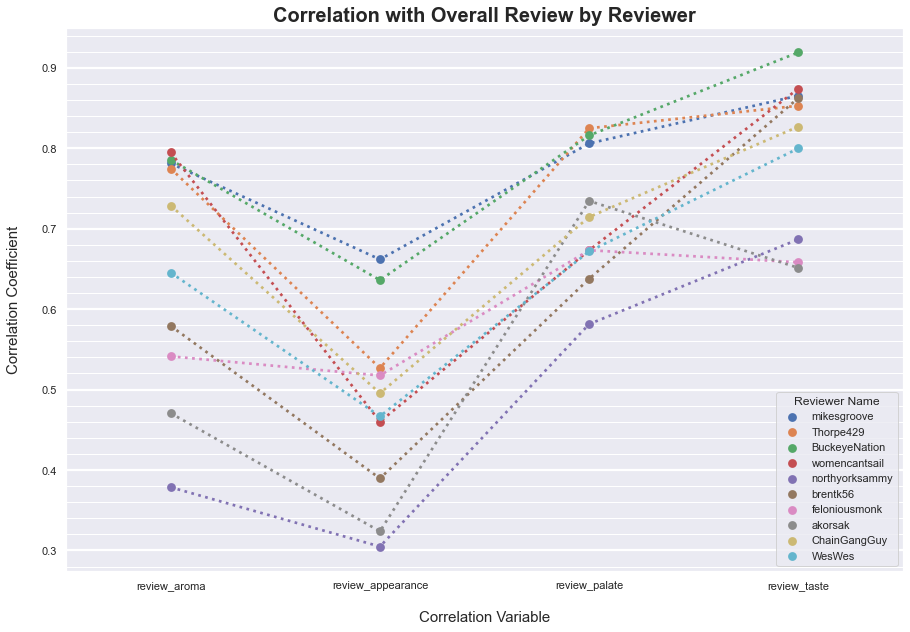

In [171]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
ax = sns.pointplot(data=reviewer_corr_df, x='corr_variable', y='corr', hue='reviewer', linestyles=('dotted'))
plt.title('Correlation with Overall Review by Reviewer', weight='bold', fontsize=20)
plt.ylabel('Correlation Coefficient', labelpad=20, fontsize=15)
plt.xlabel('Correlation Variable', labelpad=20, fontsize=15)
plt.legend(title='Reviewer Name')
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='minor', axis='y')
ax.grid(b=True, which='major', axis='y', linewidth=2.25);

In [172]:
# variance for each review subcategory. 
reviewer_corr_df.groupby('corr_variable', sort=False).var()

corr
corr_variable              
review_aroma       0.022331
review_appearance  0.013891
review_palate      0.006672
review_taste       0.009610

> Alright so initially we can see a few things here. The variance of correlations for aroma and appearance are greater than the variance for palate and taste. This seems to suggest that there is some sort of consensus among the reviewers that the palate and taste of a beer hold more weight when giving an overall review. 
>
> We can also see that these reviewers value taste the most and appearance the least when giving an overall review score. 
>
> The thing that is more difficult to observe here is what reviewers are the "best". Initially, I wanted to try and find which reviewers were the "best" based on whether or they had high correlations between `review_overall` and the subcategories. However, this seems like a very subjective measure. I think for someone who is looking at this data, the above visualization provides more information than "who the best reviewer is". This way if I want to find a reviewer who highly values appearance, then I might want to follow mikesgroove's reviews. 
>
> With that said, I think it would be interesting to see if the same trends appear if we plot the top 50 and 100 reviewers..

In [173]:
top50_reviewers = beer_df_clean.review_profilename.value_counts(ascending=False).head(50)\
                  .reset_index().rename(columns={'index':'reviewer'})
top50_reviewers

reviewer  review_profilename
0       mikesgroove                1657
1         Thorpe429                1503
2     BuckeyeNation                1345
3     womencantsail                1342
4    northyorksammy                1240
5          brentk56                1137
6     feloniousmonk                1021
7           akorsak                1016
8      ChainGangGuy                 987
9            WesWes                 975
10   TheManiacalOne                 964
11      BEERchitect                 949
12        HopHead84                 942
13         Kegatron                 934
14          tempest                 923
15           zeff80                 907
16          Bighuge                 906
17       russpowell                 901
18          Wasatch                 899
19       WVbeergeek                 896
20       Gueuzedude                 896
21          drabmuh                 894
22          mothman                 863
23           oberon                 860
24      Halcyondays                 854
25      NeroFiddled                 854
26           jwc215                 842
27           Gavage                 832
28           glid02                 828
29        Billolick                 819
30         Mora2000                 807
31  barleywinefiend                 799
32        weeare138                 791
33         ppoitras                 788
34       TMoney2591                 755
35           mdfb79                 753
36           hopdog                 751
37        MasterSki                 749
38           smcolw                 727
39        emerge077                 725
40   johnmichaelsen                 715
41        tavernjef                 712
42           tpd975                 709
43        atsprings                 707
44         ffejherb                 706
45       rhoadsrage                 698
46          Knapp85                 694
47         emmasdad                 694
48        AgentZero                 691
49              ZAP                 688

In [174]:
# filter a df for top 50 reviewers. 
top50_reviewers_df = beer_df_clean.query('review_profilename in @top50_reviewers.reviewer')
top50_reviewers_df

beer_id                           beer_name  \
0         64883                       Cauldron DIPA   
8         52159                 Caldera Ginger Beer   
25        58046                       Rauch Ür Bock   
38        58046                       Rauch Ür Bock   
53        58046                       Rauch Ür Bock   
...         ...                                 ...   
563948    73588  St. Sideburn (Bourbon Barrel Aged)   
563954    44662                     Whitewash Wheat   
563956    46681                           PB Porter   
563962    58078                   Shipwrecked Stout   
563964    58385      Belgian Blonde Anniversary Ale   

                            beer_style  beer_abv  weighted_review  \
0       American Double / Imperial IPA       7.7             4.32   
8                 Herbed / Spiced Beer       4.7             3.51   
25                           Rauchbier       7.4             4.03   
38                           Rauchbier       7.4             3.97   
53                           Rauchbier       7.4             4.04   
...                                ...       ...              ...   
563948             American Strong Ale       8.5             2.01   
563954                         Witbier       5.5             3.18   
563956                 American Porter       6.5             3.68   
563962                  American Stout       6.5             3.31   
563964                Belgian Pale Ale       6.5             3.63   

        review_overall  review_aroma  review_appearance  review_palate  \
0                  4.0           4.5                4.0            4.0   
8                  4.0           4.5                3.0            2.5   
25                 4.0           4.0                4.5            4.0   
38                 4.0           4.0                3.5            4.0   
53                 4.0           4.5                3.5            3.5   
...                ...           ...                ...            ...   
563948             1.5           2.5                3.5            3.0   
563954             3.5           3.0                3.5            3.5   
563956             4.0           3.5                4.0            4.0   
563962             3.0           3.0                4.0            3.5   
563964             4.0           3.5                4.0            3.5   

        review_taste review_profilename             brewery_name brewery_type  \
0                4.5     johnmichaelsen  Caldera Brewing Company        micro   
8                3.0        Halcyondays  Caldera Brewing Company        micro   
25               4.0             oberon  Caldera Brewing Company        micro   
38               4.0     northyorksammy  Caldera Brewing Company        micro   
53               4.0        Halcyondays  Caldera Brewing Company        micro   
...              ...                ...                      ...          ...   
563948           1.5          HopHead84  Pacific Beach Ale House      brewpub   
563954           3.0          HopHead84  Pacific Beach Ale House      brewpub   
563956           3.5             glid02  Pacific Beach Ale House      brewpub   
563962           3.5             glid02  Pacific Beach Ale House      brewpub   
563964           3.5             glid02  Pacific Beach Ale House      brewpub   

             city       state   longitude   latitude  
0         Ashland      Oregon -122.663374  42.183738  
8         Ashland      Oregon -122.663374  42.183738  
25        Ashland      Oregon -122.663374  42.183738  
38        Ashland      Oregon -122.663374  42.183738  
53        Ashland      Oregon -122.663374  42.183738  
...           ...         ...         ...        ...  
563948  San Diego  California -117.255265  32.794255  
563954  San Diego  California -117.255265  32.794255  
563956  San Diego  California -117.255265  32.794255  
563962  San Diego  California -117.255265  32.794255  
563964  San Diego  California -117.255265  32.79425

In [175]:
# calculate correlations
reviewers = top50_reviewers.reviewer
variables = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste']
corr50_list = []

for i in reviewers:
    df = top50_reviewers_df[top50_reviewers_df['review_profilename'] == i]
    for var in variables:
        corr = df['review_overall'].corr(df[var])
        corr_dict = {'reviewer':i, 'corr_variable':var, 'corr':corr}
        corr50_list.append(corr_dict)
corr50_list

[{'reviewer': 'mikesgroove',
  'corr_variable': 'review_aroma',
  'corr': 0.781106483080678},
 {'reviewer': 'mikesgroove',
  'corr_variable': 'review_appearance',
  'corr': 0.6618115952234047},
 {'reviewer': 'mikesgroove',
  'corr_variable': 'review_palate',
  'corr': 0.8060279546799203},
 {'reviewer': 'mikesgroove',
  'corr_variable': 'review_taste',
  'corr': 0.8654381980499587},
 {'reviewer': 'Thorpe429',
  'corr_variable': 'review_aroma',
  'corr': 0.774818159702214},
 {'reviewer': 'Thorpe429',
  'corr_variable': 'review_appearance',
  'corr': 0.5266998186814272},
 {'reviewer': 'Thorpe429',
  'corr_variable': 'review_palate',
  'corr': 0.824876204174525},
 {'reviewer': 'Thorpe429',
  'corr_variable': 'review_taste',
  'corr': 0.8528804094584104},
 {'reviewer': 'BuckeyeNation',
  'corr_variable': 'review_aroma',
  'corr': 0.7855767616201111},
 {'reviewer': 'BuckeyeNation',
  'corr_variable': 'review_appearance',
  'corr': 0.6360534404407563},
 {'reviewer': 'BuckeyeNation',
  'corr_v

In [176]:
reviewer50_corr_df = pd.DataFrame(corr50_list)
reviewer50_corr_df

reviewer      corr_variable      corr
0    mikesgroove       review_aroma  0.781106
1    mikesgroove  review_appearance  0.661812
2    mikesgroove      review_palate  0.806028
3    mikesgroove       review_taste  0.865438
4      Thorpe429       review_aroma  0.774818
..           ...                ...       ...
195    AgentZero       review_taste  0.803853
196          ZAP       review_aroma  0.683944
197          ZAP  review_appearance  0.640585
198          ZAP      review_palate  0.857187
199          ZAP       review_taste  0.917389

[200 rows x 3 columns]

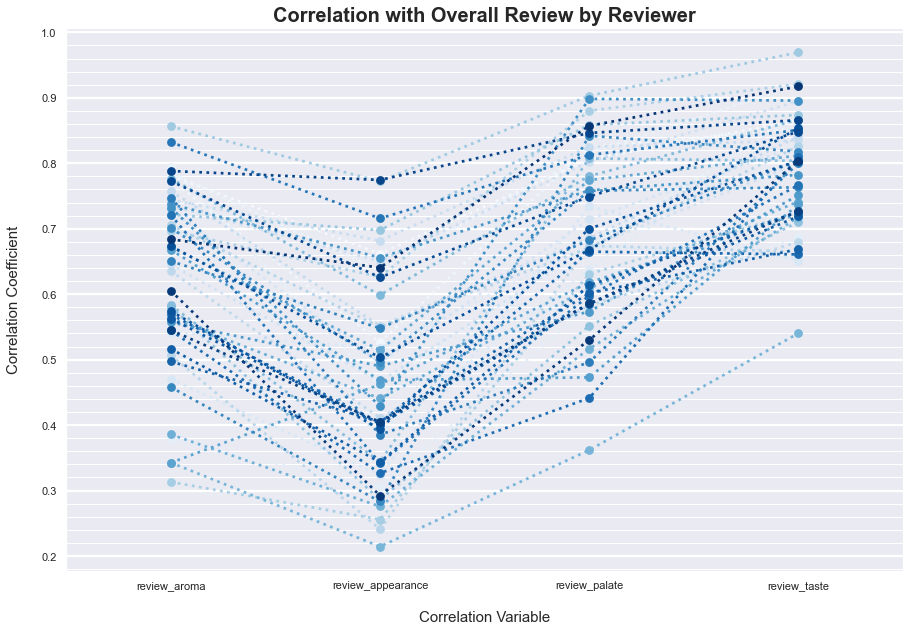

In [177]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
ax = sns.pointplot(data=reviewer50_corr_df, x='corr_variable', y='corr', hue='reviewer', linestyles=('dotted'), palette='Blues')
plt.title('Correlation with Overall Review by Reviewer', weight='bold', fontsize=20)
plt.ylabel('Correlation Coefficient', labelpad=20, fontsize=15)
plt.xlabel('Correlation Variable', labelpad=20, fontsize=15)
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='minor', axis='y')
ax.grid(b=True, which='major', axis='y', linewidth=2.25)
ax.get_legend().remove();

In [178]:
reviewer50_corr_df.groupby('corr_variable', sort=False).var()

corr
corr_variable              
review_aroma       0.018799
review_appearance  0.021591
review_palate      0.016276
review_taste       0.007682

> So we can see that the trend we observed with the top 10 reviewers still holds with the top 50. That is, the variances for aroma and appearance are greater than those of palate and taste, suggesting that reviewers tend to value a beer's palate and taste more than aroma and appearance when giving an overall review score.
>
> With that said, the gap between the variance of aroma and palate did close considerably compared to the previous plot. This tells us that with a larger sample of reviewers, palate doesn't play as big of a role in determining an overall review score. 
>
> Let's take a look at top 100.

In [179]:
top100_reviewers = beer_df_clean.review_profilename.value_counts(ascending=False).head(100)\
                  .reset_index().rename(columns={'index':'reviewer'})
top100_reviewers

reviewer  review_profilename
0       mikesgroove                1657
1         Thorpe429                1503
2     BuckeyeNation                1345
3     womencantsail                1342
4    northyorksammy                1240
..              ...                 ...
95       RblWthACoz                 549
96  brewdlyhooked13                 540
97  twiggamortis420                 539
98        thagr81us                 537
99       scruffwhor                 536

[100 rows x 2 columns]

In [180]:
top100_reviewers_df = beer_df_clean.query('review_profilename in @top100_reviewers.reviewer')
top100_reviewers_df

beer_id                           beer_name  \
0         64883                       Cauldron DIPA   
8         52159                 Caldera Ginger Beer   
10        10789               Caldera Oatmeal Stout   
25        58046                       Rauch Ür Bock   
29        58046                       Rauch Ür Bock   
...         ...                                 ...   
563948    73588  St. Sideburn (Bourbon Barrel Aged)   
563954    44662                     Whitewash Wheat   
563956    46681                           PB Porter   
563962    58078                   Shipwrecked Stout   
563964    58385      Belgian Blonde Anniversary Ale   

                            beer_style  beer_abv  weighted_review  \
0       American Double / Imperial IPA       7.7             4.32   
8                 Herbed / Spiced Beer       4.7             3.51   
10                       Oatmeal Stout       7.2             2.97   
25                           Rauchbier       7.4             4.03   
29                           Rauchbier       7.4             3.26   
...                                ...       ...              ...   
563948             American Strong Ale       8.5             2.01   
563954                         Witbier       5.5             3.18   
563956                 American Porter       6.5             3.68   
563962                  American Stout       6.5             3.31   
563964                Belgian Pale Ale       6.5             3.63   

        review_overall  review_aroma  review_appearance  review_palate  \
0                  4.0           4.5                4.0            4.0   
8                  4.0           4.5                3.0            2.5   
10                 3.0           3.0                2.5            3.0   
25                 4.0           4.0                4.5            4.0   
29                 3.0           4.5                3.0            2.0   
...                ...           ...                ...            ...   
563948             1.5           2.5                3.5            3.0   
563954             3.5           3.0                3.5            3.5   
563956             4.0           3.5                4.0            4.0   
563962             3.0           3.0                4.0            3.5   
563964             4.0           3.5                4.0            3.5   

        review_taste review_profilename             brewery_name brewery_type  \
0                4.5     johnmichaelsen  Caldera Brewing Company        micro   
8                3.0        Halcyondays  Caldera Brewing Company        micro   
10               3.0   Beerandraiderfan  Caldera Brewing Company        micro   
25               4.0             oberon  Caldera Brewing Company        micro   
29               3.0   Beerandraiderfan  Caldera Brewing Company        micro   
...              ...                ...                      ...          ...   
563948           1.5          HopHead84  Pacific Beach Ale House      brewpub   
563954           3.0          HopHead84  Pacific Beach Ale House      brewpub   
563956           3.5             glid02  Pacific Beach Ale House      brewpub   
563962           3.5             glid02  Pacific Beach Ale House      brewpub   
563964           3.5             glid02  Pacific Beach Ale House      brewpub   

             city       state   longitude   latitude  
0         Ashland      Oregon -122.663374  42.183738  
8         Ashland      Oregon -122.663374  42.183738  
10        Ashland      Oregon -122.663374  42.183738  
25        Ashland      Oregon -122.663374  42.183738  
29        Ashland      Oregon -122.663374  42.183738  
...           ...         ...         ...        ...  
563948  San Diego  California -117.255265  32.794255  
563954  San Diego  California -117.255265  32.794255  
563956  San Diego  California -117.255265  32.794255  
563962  San Diego  California -117.255265  32.794255  
563964  San Diego  California -117.255265  32.79425

In [181]:
reviewers = top100_reviewers.reviewer
variables = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste']
corr100_list = []

for i in reviewers:
    df = top100_reviewers_df[top100_reviewers_df['review_profilename'] == i]
    for var in variables:
        corr = df['review_overall'].corr(df[var])
        corr_dict = {'reviewer':i, 'corr_variable':var, 'corr':corr}
        corr100_list.append(corr_dict)
corr100_list

[{'reviewer': 'mikesgroove',
  'corr_variable': 'review_aroma',
  'corr': 0.781106483080678},
 {'reviewer': 'mikesgroove',
  'corr_variable': 'review_appearance',
  'corr': 0.6618115952234047},
 {'reviewer': 'mikesgroove',
  'corr_variable': 'review_palate',
  'corr': 0.8060279546799203},
 {'reviewer': 'mikesgroove',
  'corr_variable': 'review_taste',
  'corr': 0.8654381980499587},
 {'reviewer': 'Thorpe429',
  'corr_variable': 'review_aroma',
  'corr': 0.774818159702214},
 {'reviewer': 'Thorpe429',
  'corr_variable': 'review_appearance',
  'corr': 0.5266998186814272},
 {'reviewer': 'Thorpe429',
  'corr_variable': 'review_palate',
  'corr': 0.824876204174525},
 {'reviewer': 'Thorpe429',
  'corr_variable': 'review_taste',
  'corr': 0.8528804094584104},
 {'reviewer': 'BuckeyeNation',
  'corr_variable': 'review_aroma',
  'corr': 0.7855767616201111},
 {'reviewer': 'BuckeyeNation',
  'corr_variable': 'review_appearance',
  'corr': 0.6360534404407563},
 {'reviewer': 'BuckeyeNation',
  'corr_v

In [182]:
reviewer100_corr_df = pd.DataFrame(corr100_list)
reviewer100_corr_df

reviewer      corr_variable      corr
0    mikesgroove       review_aroma  0.781106
1    mikesgroove  review_appearance  0.661812
2    mikesgroove      review_palate  0.806028
3    mikesgroove       review_taste  0.865438
4      Thorpe429       review_aroma  0.774818
..           ...                ...       ...
395    thagr81us       review_taste  0.794060
396   scruffwhor       review_aroma  0.341204
397   scruffwhor  review_appearance  0.067509
398   scruffwhor      review_palate  0.654208
399   scruffwhor       review_taste  0.555006

[400 rows x 3 columns]

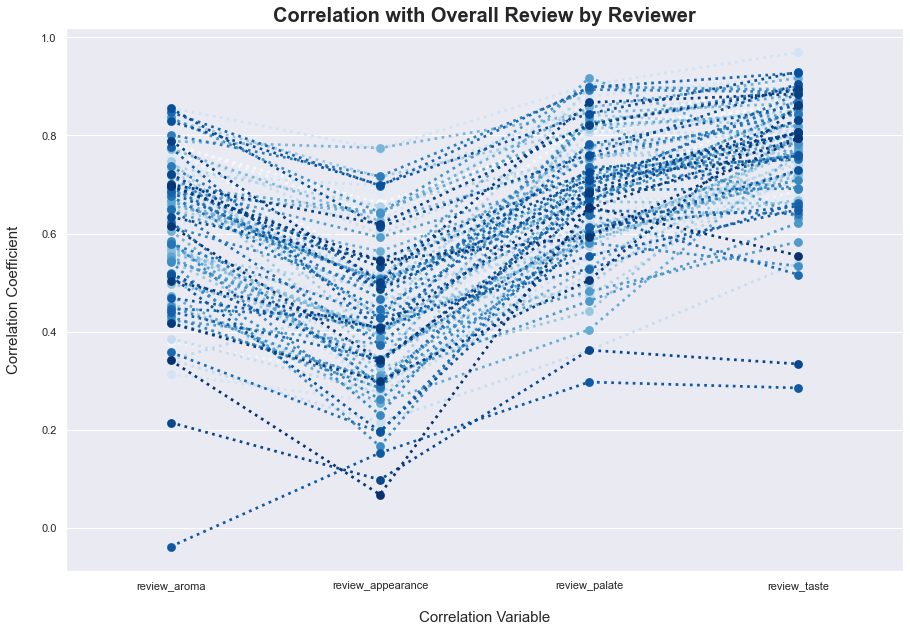

In [183]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
ax = sns.pointplot(data=reviewer100_corr_df, x='corr_variable', y='corr', hue='reviewer', linestyles=('dotted'), palette='Blues')
plt.title('Correlation with Overall Review by Reviewer', weight='bold', fontsize=20)
plt.ylabel('Correlation Coefficient', labelpad=20, fontsize=15)
plt.xlabel('Correlation Variable', labelpad=20, fontsize=15)
ax.get_legend().remove();

In [184]:
reviewer100_corr_df.groupby('corr_variable', sort=False).var()

corr
corr_variable              
review_aroma       0.024154
review_appearance  0.024114
review_palate      0.017546
review_taste       0.013823

> Same general trend for top 100 reviewers as well.

-----

> Next, I want to move away from correlations and focus on questions everyday beer drinkers and enthusiasts may have.
>
>Therefore, I want to start by looking into the following question: What high ABV beers have the highest ratings? In other words, what highly rated beers have the potential to intoxicate you quickly. With this information, your goal could be to get drunk fast or be informed and cautious when drinking high ABV beers. 
>
> I will be defining a high abv beer as any beer above the upper quartile of `beer_abv`. 
>
> After analyzing the upper quartile, I will answer the same question for values below the lower quartile, and for values in the IQR.   

In [185]:
beer_unique.beer_abv.describe()

count    9590.000000
mean        6.789241
std         2.170388
min         0.500000
25%         5.200000
50%         6.200000
75%         8.000000
max        41.000000
Name: beer_abv, dtype: float64

> We first need to find what ABV values are above the upper quartile. 

In [186]:
upperqrt_abv = beer_df_clean.query('beer_abv >= 8')
upperqrt_abv

beer_id                           beer_name  \
107       58920                    Vas Deferens Ale   
228       58920                    Vas Deferens Ale   
229       58920                    Vas Deferens Ale   
230       58920                    Vas Deferens Ale   
231       58920                    Vas Deferens Ale   
...         ...                                 ...   
563923    62954                        Unity (2010)   
563939    73587                            Hopulent   
563941    73587                            Hopulent   
563947    73588  St. Sideburn (Bourbon Barrel Aged)   
563948    73588  St. Sideburn (Bourbon Barrel Aged)   

                            beer_style  beer_abv  weighted_review  \
107            Belgian Strong Dark Ale       8.1             3.83   
228            Belgian Strong Dark Ale       8.1             3.38   
229            Belgian Strong Dark Ale       8.1             2.98   
230            Belgian Strong Dark Ale       8.1             3.95   
231            Belgian Strong Dark Ale       8.1             3.45   
...                                ...       ...              ...   
563923  California Common / Steam Beer       9.0             3.79   
563939  American Double / Imperial IPA       8.5             2.13   
563941  American Double / Imperial IPA       8.5             1.89   
563947             American Strong Ale       8.5             2.18   
563948             American Strong Ale       8.5             2.01   

        review_overall  review_aroma  review_appearance  review_palate  \
107                4.0           4.0                4.5            4.0   
228                3.5           3.5                4.0            2.0   
229                3.0           4.0                2.0            3.0   
230                4.0           4.0                4.0            3.5   
231                3.5           3.5                3.5            3.0   
...                ...           ...                ...            ...   
563923             4.0           3.0                4.5            4.0   
563939             1.5           3.0                3.5            3.0   
563941             1.5           2.0                3.5            3.0   
563947             1.5           3.0                3.5            3.5   
563948             1.5           2.5                3.5            3.0   

        review_taste review_profilename             brewery_name brewery_type  \
107              3.5         Urbancaver  Caldera Brewing Company        micro   
228              3.5         BilbosNuts  Caldera Brewing Company        micro   
229              2.5              n2185  Caldera Brewing Company        micro   
230              4.0            Knapp85  Caldera Brewing Company        micro   
231              3.5         russpowell  Caldera Brewing Company        micro   
...              ...                ...                      ...          ...   
563923           4.0             JTahoe       Eagle Rock Brewery        micro   
563939           1.5           mactrail  Pacific Beach Ale House      brewpub   
563941           1.5          HopHead84  Pacific Beach Ale House      brewpub   
563947           1.5           mactrail  Pacific Beach Ale House      brewpub   
563948           1.5          HopHead84  Pacific Beach Ale House      brewpub   

               city       state   longitude   latitude  
107         Ashland      Oregon -122.663374  42.183738  
228         Ashland      Oregon -122.663374  42.183738  
229         Ashland      Oregon -122.663374  42.183738  
230         Ashland      Oregon -122.663374  42.183738  
231         Ashland      Oregon -122.663374  42.183738  
...             ...         ...         ...        ...  
563923  Los Angeles  California -118.244038  34.114731  
563939    San Diego  California -117.255265  32.794255  
563941    San Diego  California -117.255265  32.794255  
563947    San Diego  California -117.255265  32.794255  
563948    San Diego  Californ

In [187]:
top25_upper_abv = upperqrt_abv.groupby('beer_name').weighted_review.agg(['count', 'mean'])
top25_upper_abv = top25_upper_abv.query('count >= 10').sort_values('mean', ascending=False).reset_index().head(25)
top25_upper_abv = top25_upper_abv.merge(beer_unique.query('beer_name in @top25_upper_abv.beer_name'), on='beer_name')\
                  [['beer_name', 'count', 'mean', 'beer_abv']]
top25_upper_abv

beer_name  count      mean  \
0                           Rare Bourbon County Stout    249  4.649317   
1        Green Flash Bourbon Barrel Aged Double Stout     14  4.641429   
2                         Founders CBS Imperial Stout   1274  4.616342   
3                            Three Sheets Barley Wine     12  4.600000   
4                                       Notorius IPA3     22  4.592727   
5            Sea Monster (3 Sheets Rum Oak Chip Aged)     12  4.585000   
6                                          King Henry     98  4.573980   
7                AleSmith Speedway Stout - Kopi Luwak     23  4.568261   
8                                         Wooden Hell     76  4.553289   
9           Imperial Eclipse Stout - Pappy Van Winkle     49  4.550408   
10                                          Royal Oil     15  4.542667   
11                     Galaxy Imperial Single Hop IPA     76  4.542500   
12            Founders KBS (Kentucky Breakfast Stout)   3864  4.537521   
13                     Darkness - Bourbon Barrel Aged     30  4.532667   
14                                Double Sunshine IPA     85  4.531647   
15  Marshal Zhukov's Imperial Stout - Zhukov's Fin...     19  4.525263   
16                                          The Abyss   1412  4.518746   
17                            Samuel Adams Millennium     22  4.517273   
18                                   Birth Of Tragedy     29  4.515517   
19                                   Russian Roulette     12  4.509167   
20                  Bourbon County Brand Coffee Stout    456  4.508026   
21  Hunahpu's Imperial Stout - Laird's Apple Brand...     63  4.503333   
22                            Bell's Black Note Stout    130  4.500846   
23         Hunahpu's Imperial Stout - Rum Barrel Aged     18  4.485556   
24                           Hunahpu's Imperial Stout    429  4.473916   

    beer_abv  
0       13.0  
1        8.9  
2       10.6  
3       10.0  
4       12.0  
5       10.0  
6       13.4  
7       12.0  
8        9.5  
9        9.5  
10      12.5  
11       8.0  
12      11.2  
13      10.3  
14       8.0  
15      11.5  
16      11.0  
17      21.0  
18      11.0  
19       9.3  
20      13.0  
21      11.5  
22      11.5  
23      11.5  
24      11.5

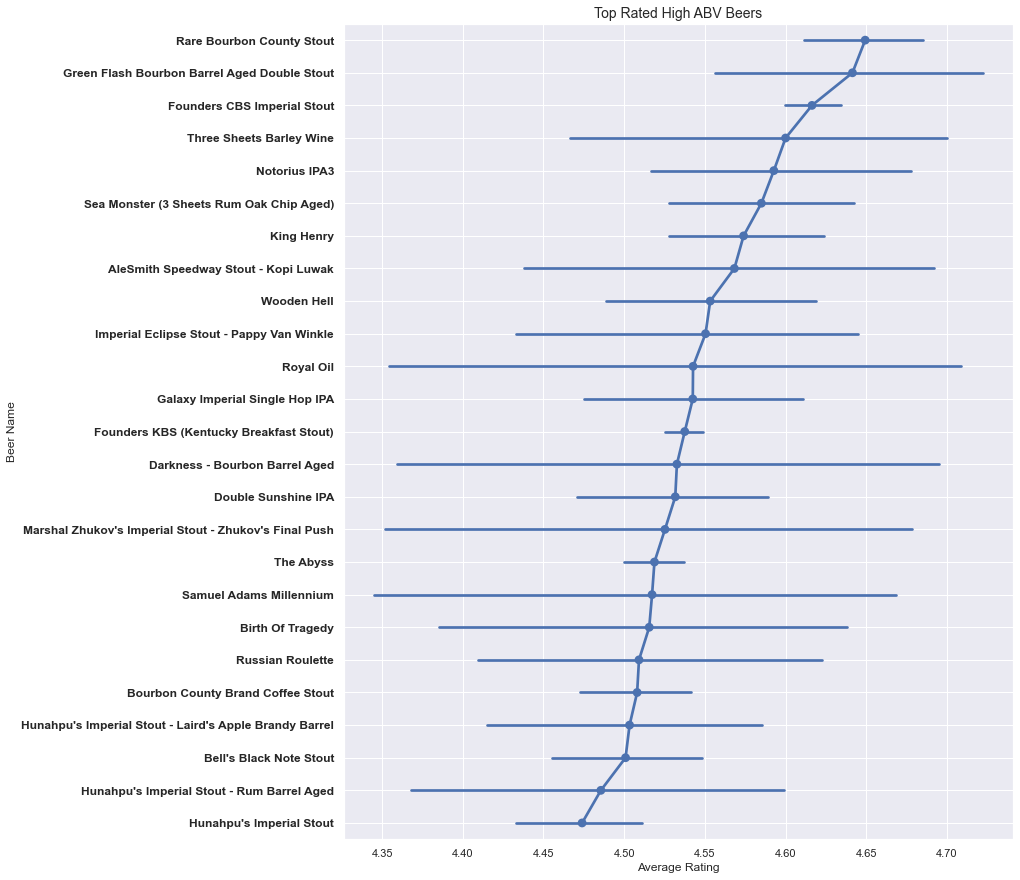

In [188]:
plt.figure(figsize=(12,15))
sns.set_theme(style='darkgrid')

ax = sns.pointplot(data=upperqrt_abv, x='weighted_review', y='beer_name', order=top25_upper_abv.beer_name)

plt.grid(True)
plt.title('Top Rated High ABV Beers' , fontsize=14)
plt.ylabel('Beer Name')
plt.xlabel('Average Rating')
plt.yticks(weight=600, fontsize=12);

> We know that all of these beers are in the upper quartile, but there's a large range of values in the upper quartile. I think it would be useful to add each of these beer's ABV value on the plot for quick reference and comparison. 

In [189]:
# create list of new tick labels with ABV values
upper_abv = top25_upper_abv.beer_abv.tolist()
labels = [item.get_text() for item in ax.get_yticklabels()]
labels_abv = []

for i, label in enumerate(labels):
    new_label = f'{label} [{upper_abv[i]} ABV]'
    labels_abv.append(new_label)
labels_abv

['Rare Bourbon County Stout [13.0 ABV]',
 'Green Flash Bourbon Barrel Aged Double Stout [8.9 ABV]',
 'Founders CBS Imperial Stout [10.6 ABV]',
 'Three Sheets Barley Wine [10.0 ABV]',
 'Notorius IPA3 [12.0 ABV]',
 'Sea Monster (3 Sheets Rum Oak Chip Aged) [10.0 ABV]',
 'King Henry [13.4 ABV]',
 'AleSmith Speedway Stout - Kopi Luwak [12.0 ABV]',
 'Wooden Hell [9.5 ABV]',
 'Imperial Eclipse Stout - Pappy Van Winkle [9.5 ABV]',
 'Royal Oil [12.5 ABV]',
 'Galaxy Imperial Single Hop IPA [8.0 ABV]',
 'Founders KBS (Kentucky Breakfast Stout) [11.2 ABV]',
 'Darkness - Bourbon Barrel Aged [10.3 ABV]',
 'Double Sunshine IPA [8.0 ABV]',
 "Marshal Zhukov's Imperial Stout - Zhukov's Final Push [11.5 ABV]",
 'The Abyss [11.0 ABV]',
 'Samuel Adams Millennium [21.0 ABV]',
 'Birth Of Tragedy [11.0 ABV]',
 'Russian Roulette [9.3 ABV]',
 'Bourbon County Brand Coffee Stout [13.0 ABV]',
 "Hunahpu's Imperial Stout - Laird's Apple Brandy Barrel [11.5 ABV]",
 "Bell's Black Note Stout [11.5 ABV]",
 "Hunahpu's I

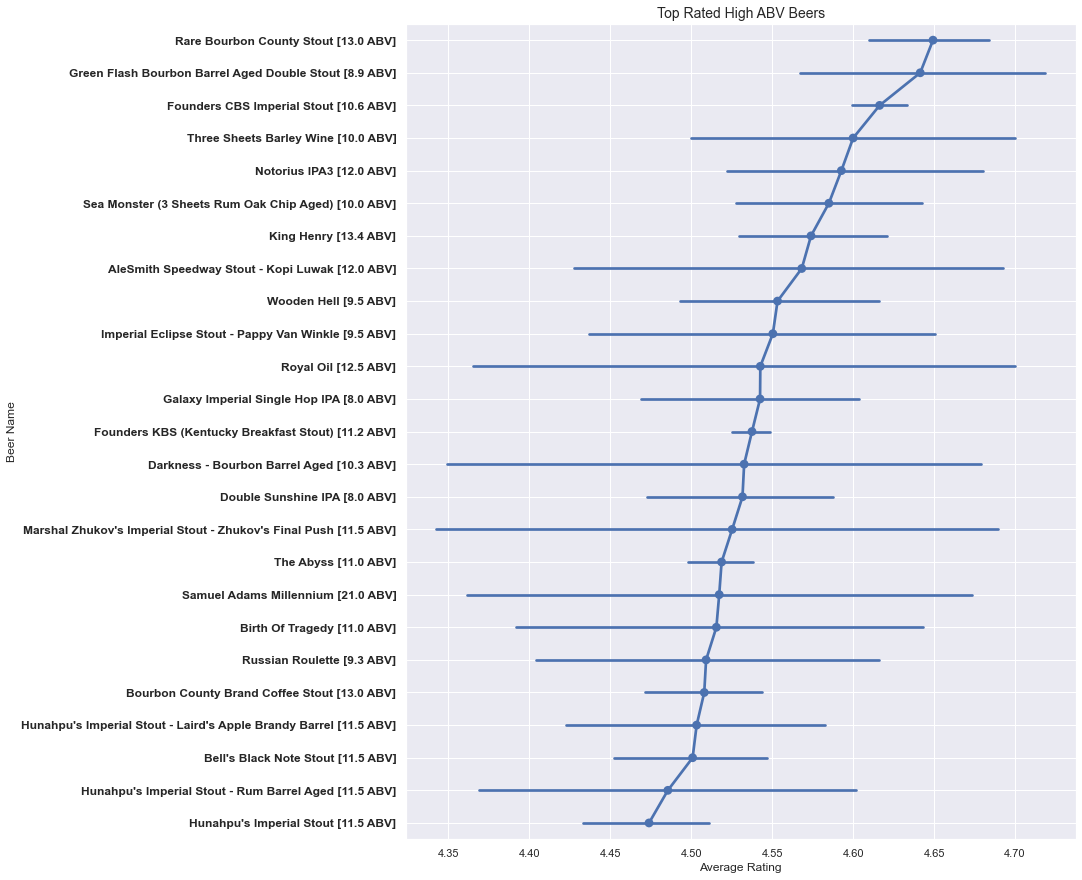

In [190]:
# replot
plt.figure(figsize=(12,15))
sns.set_theme(style='darkgrid')

ax = sns.pointplot(data=upperqrt_abv, x='weighted_review', y='beer_name', order=top25_upper_abv.beer_name)

plt.grid(True)
plt.title('Top Rated High ABV Beers' , fontsize=14)
plt.ylabel('Beer Name')
plt.xlabel('Average Rating')
ax.set_yticklabels(labels_abv, fontdict={'fontsize':12, 'fontweight':600});

> That looks better and a bit more informative in my opinion. 
>
>This plot shows us the top 25 rated beers in the upper quartile of ABV. This would be useful for anyone who is interested in drinking beers with above average ABV, while still taking into consideration other variables such as taste, feel, smell, and look of their beer.

--------

> Next, I want to do the same anlaysis with the lower quartile of `beer_abv`. This will attempt to answer the question: What low ABV beers have the highest ratings? In other words, what good beer can I drink for an extended amount of time, for example over the course of a day, without getting too intoxicated. 

In [191]:
# What ABV value defines the lower quratile?
beer_unique.beer_abv.describe()

count    9590.000000
mean        6.789241
std         2.170388
min         0.500000
25%         5.200000
50%         6.200000
75%         8.000000
max        41.000000
Name: beer_abv, dtype: float64

In [192]:
lowerqrt_abv = beer_df_clean.query('beer_abv <= 5.2')
lowerqrt_abv

beer_id                 beer_name             beer_style  beer_abv  \
1         52159       Caldera Ginger Beer   Herbed / Spiced Beer       4.7   
2         52159       Caldera Ginger Beer   Herbed / Spiced Beer       4.7   
3         52159       Caldera Ginger Beer   Herbed / Spiced Beer       4.7   
4         52159       Caldera Ginger Beer   Herbed / Spiced Beer       4.7   
5         52159       Caldera Ginger Beer   Herbed / Spiced Beer       4.7   
...         ...                       ...                    ...       ...   
563914    54635                Solidarity  English Dark Mild Ale       3.8   
563915    54635                Solidarity  English Dark Mild Ale       3.8   
563916    54635                Solidarity  English Dark Mild Ale       3.8   
563917    54635                Solidarity  English Dark Mild Ale       3.8   
563924    72212  Bourbon Oaked Solidarity  English Dark Mild Ale       3.8   

        weighted_review  review_overall  review_aroma  review_appearance  \
1                  3.35             3.0           3.5                3.5   
2                  3.75             3.5           3.5                3.5   
3                  3.01             3.0           2.5                3.5   
4                  3.68             4.0           3.0                3.5   
5                  4.04             4.5           3.5                5.0   
...                 ...             ...           ...                ...   
563914             4.07             4.5           4.0                3.5   
563915             4.08             5.0           3.5                4.0   
563916             3.85             4.0           4.0                4.0   
563917             4.33             4.5           4.0                4.5   
563924             3.23             3.5           3.5                4.0   

        review_palate  review_taste review_profilename  \
1                 3.0           3.5            oline73   
2                 4.0           4.0          Reidrover   
3                 2.0           3.5       alpinebryant   
4                 3.5           4.0      LordAdmNelson   
5                 4.0           4.0       augustgarage   
...               ...           ...                ...   
563914            4.0           4.0     Westsidebuddha   
563915            4.0           4.0          Sandstone   
563916            4.5           3.5       augustgarage   
563917            4.0           4.5            SShelly   
563924            2.5           3.0      womencantsail   

                   brewery_name brewery_type         city       state  \
1       Caldera Brewing Company        micro      Ashland      Oregon   
2       Caldera Brewing Company        micro      Ashland      Oregon   
3       Caldera Brewing Company        micro      Ashland      Oregon   
4       Caldera Brewing Company        micro      Ashland      Oregon   
5       Caldera Brewing Company        micro      Ashland      Oregon   
...                         ...          ...          ...         ...   
563914       Eagle Rock Brewery        micro  Los Angeles  California   
563915       Eagle Rock Brewery        micro  Los Angeles  California   
563916       Eagle Rock Brewery        micro  Los Angeles  California   
563917       Eagle Rock Brewery        micro  Los Angeles  California   
563924       Eagle Rock Brewery        micro  Los Angeles  California   

         longitude   latitude  
1      -122.663374  42.183738  
2      -122.663374  42.183738  
3      -122.663374  42.183738  
4      -122.663374  42.183738  
5      -122.663374  42.183738  
...            ...        ...  
563914 -118.244038  34.114731  
563915 -118.244038  34.114731  
563916 -118.244038  34.114731  
563917 -118.244038  34.114731  
563924 -118.244038  34.114731  

[103645 rows x 17 columns]

In [193]:
top25_lower_abv = lowerqrt_abv.groupby('beer_name').weighted_review.agg(['count', 'mean'])
top25_lower_abv = top25_lower_abv.query('count >= 10').sort_values('mean', ascending=False).reset_index().head(25)
top25_lower_abv = top25_lower_abv.merge(beer_unique.query('beer_name in @top25_lower_abv.beer_name'), on='beer_name')\
                  [['beer_name', 'count', 'mean', 'beer_abv']]
top25_lower_abv

beer_name  count      mean  beer_abv
0                       Carnie Fire     10  4.530000       5.0
1       Southampton Berliner Weisse     41  4.512927       2.0
2             Apollo Single Hop IPA     10  4.500000       5.2
3          Citra-delic Summer Wheat     11  4.476364       5.0
4                    Fresh Hop 2006     13  4.426923       4.6
5                           Tartare     11  4.377273       4.0
6       Great Lakes Wolfhound Stout     44  4.349545       4.8
7                   Edward Pale Ale    113  4.344336       5.2
8          Black Snow Coffee Porter     14  4.337143       5.0
9                 Solstice Pale Ale     15  4.306000       5.2
10  Blue Point Extra Special Bitter     35  4.274000       5.0
11                   Amarillo Amber     13  4.269231       5.2
12                           Simcoe     11  4.253636       5.2
13         Southampton Abbey Single     19  4.241579       4.5
14             Southampton Pale Ale     12  4.235000       5.2
15     Amarillo Single Hop Pale Ale     30  4.231000       5.0
16                            32/50     91  4.221209       4.8
17     Unfiltered Double Barrel Ale     64  4.216875       5.0
18              English Malt Porter     12  4.206667       5.2
19                          Briscoe     12  4.200000       5.0
20                    Coffee Bender   1254  4.163062       5.1
21         Founders Frangelic Stout     40  4.158500       4.2
22                        Wee Geech     10  4.155000       4.0
23      Brooklyn Sustainable Porter     23  4.151304       5.2
24                 Ichabod Ale 2009     57  4.150526       5.0

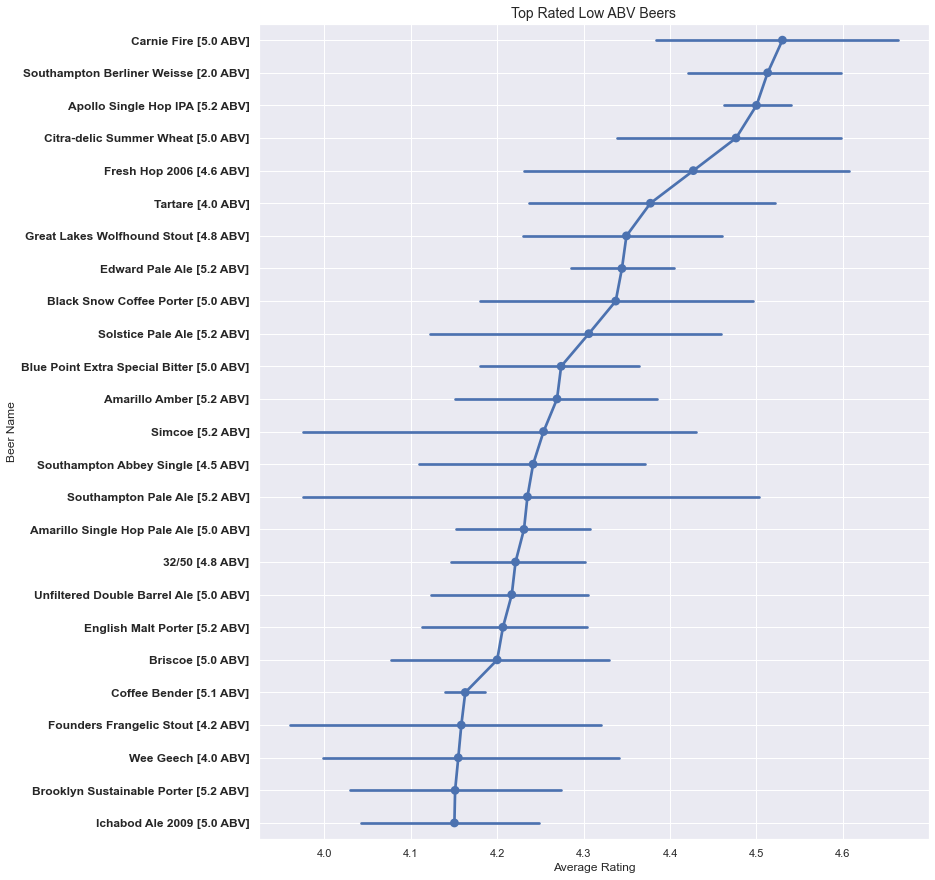

In [194]:
plt.figure(figsize=(12,15))
sns.set_theme(style='darkgrid')

ax1 = sns.pointplot(data=lowerqrt_abv, x='weighted_review', y='beer_name', order=top25_lower_abv.beer_name)

plt.grid(True)
plt.title('Top Rated Low ABV Beers' , fontsize=14)
plt.ylabel('Beer Name')
plt.xlabel('Average Rating')

lower_abv = top25_lower_abv.beer_abv.tolist()
labels_lower = [item.get_text() for item in ax1.get_yticklabels()]
labels_low_abv = [f'{label} [{lower_abv[i]} ABV]' for i, label in enumerate(labels_lower)]

ax1.set_yticklabels(labels_low_abv, fontdict={'fontsize':12, 'fontweight':600});

> One interesting thing to note between both the lower and upper quartile ABV plots, is that it seems as if there is a "sweet spot" for high ratings in both quartiles. For the lower quartile, beers with ABV between 4 and 5.2 dominate the list, apart from "Southampton Berliner Weisse" which ranks second. For the upper quartile, the same is true for beers between 8 and 12 ABV.
>
> Finally, let's take a look at beers in the IQR/between the lower and upper quartiles. Maybe someone just wants to know the highest rated 'medium' strength beers, in terms of ABV. So let's go ahead and do that. 

In [195]:
# What ABV value defines the median quratile?
beer_unique.beer_abv.describe()

count    9590.000000
mean        6.789241
std         2.170388
min         0.500000
25%         5.200000
50%         6.200000
75%         8.000000
max        41.000000
Name: beer_abv, dtype: float64

In [196]:
medianqrt_abv = beer_df_clean.query('5.2 < beer_abv < 8.0')
medianqrt_abv

beer_id                       beer_name  \
0         64883                   Cauldron DIPA   
10        10789           Caldera Oatmeal Stout   
11        10789           Caldera Oatmeal Stout   
12        12386                  Caldera OBF 15   
13        58046                   Rauch Ür Bock   
...         ...                             ...   
563961    58076                      Amber Wave   
563962    58078               Shipwrecked Stout   
563963    58078               Shipwrecked Stout   
563964    58385  Belgian Blonde Anniversary Ale   
563965    69416                  Belgian Dubbel   

                            beer_style  beer_abv  weighted_review  \
0       American Double / Imperial IPA       7.7             4.32   
10                       Oatmeal Stout       7.2             2.97   
11                       Oatmeal Stout       7.2             1.96   
12                 American Pale Lager       5.6             3.76   
13                           Rauchbier       7.4             4.36   
...                                ...       ...              ...   
563961        American Amber / Red Ale       5.4             3.46   
563962                  American Stout       6.5             3.31   
563963                  American Stout       6.5             3.75   
563964                Belgian Pale Ale       6.5             3.63   
563965                          Dubbel       6.0             3.27   

        review_overall  review_aroma  review_appearance  review_palate  \
0                  4.0           4.5                4.0            4.0   
10                 3.0           3.0                2.5            3.0   
11                 2.0           1.5                2.5            2.5   
12                 4.0           3.0                4.0            4.0   
13                 4.5           4.5                3.0            4.0   
...                ...           ...                ...            ...   
563961             3.5           3.0                4.0            4.0   
563962             3.0           3.0                4.0            3.5   
563963             3.5           3.5                3.5            4.0   
563964             4.0           3.5                4.0            3.5   
563965             3.0           3.5                3.0            2.5   

        review_taste review_profilename             brewery_name brewery_type  \
0                4.5     johnmichaelsen  Caldera Brewing Company        micro   
10               3.0   Beerandraiderfan  Caldera Brewing Company        micro   
11               2.0         RedDiamond  Caldera Brewing Company        micro   
12               4.0         beerguy101  Caldera Brewing Company        micro   
13               4.5        UCLABrewN84  Caldera Brewing Company        micro   
...              ...                ...                      ...          ...   
563961           3.5            DoubleJ  Pacific Beach Ale House      brewpub   
563962           3.5             glid02  Pacific Beach Ale House      brewpub   
563963           4.0            DoubleJ  Pacific Beach Ale House      brewpub   
563964           3.5             glid02  Pacific Beach Ale House      brewpub   
563965           3.5           mactrail  Pacific Beach Ale House      brewpub   

             city       state   longitude   latitude  
0         Ashland      Oregon -122.663374  42.183738  
10        Ashland      Oregon -122.663374  42.183738  
11        Ashland      Oregon -122.663374  42.183738  
12        Ashland      Oregon -122.663374  42.183738  
13        Ashland      Oregon -122.663374  42.183738  
...           ...         ...         ...        ...  
563961  San Diego  California -117.255265  32.794255  
563962  San Diego  California -117.255265  32.794255  
563963  San Diego  California -117.255265  32.794255  
563964  San Diego  California -117.255265  32.794255  
563965  San Diego  California -117.255265  32.794255  

[256945 rows x 17 columns]

In [197]:
medianqrt_abv.beer_abv.describe()

count    256945.000000
mean          6.346707
std           0.722926
min           5.210000
25%           5.700000
50%           6.200000
75%           7.000000
max           7.900000
Name: beer_abv, dtype: float64

In [198]:
top25_median_abv = medianqrt_abv.groupby('beer_name').weighted_review.agg(['count', 'mean'])
top25_median_abv = top25_median_abv.query('count >= 10').sort_values('mean', ascending=False).reset_index().head(25)
top25_median_abv = top25_median_abv.merge(beer_unique.query('beer_name in @top25_median_abv.beer_name'), on='beer_name')\
                  [['beer_name', 'count', 'mean', 'beer_abv']]
top25_median_abv['beer_abv'] = top25_median_abv.beer_abv.round(1)
top25_median_abv

beer_name  count      mean  beer_abv
0                               Hoppy Birthday     65  4.552154       5.2
1                                   Ashy Cynic     18  4.543333       6.7
2                     Founders Syrup Del Noche     12  4.501667       7.5
3                              Simcoe Pale Ale     17  4.462941       5.9
4                        Civil Disobedience #1     16  4.455000       7.0
5          Black Marlin Porter With Cocoa Nibs     30  4.452000       6.0
6                                 SuperShow 69     18  4.450000       6.9
7                            Columbus Pale Ale     16  4.439375       6.0
8                        Everett Robust Porter     89  4.437528       7.5
9                              Three Hour Tour     57  4.430877       6.1
10                       Big Ticket Double IPA     10  4.425000       7.6
11                      Sculpin India Pale Ale   8112  4.417885       7.0
12  Black Marlin Porter (Special Sour Version)     12  4.415000       5.5
13                  Masala Mama India Pale Ale    662  4.402764       5.9
14            Hill Farmstead Nelson Sauvin IPA     11  4.400000       5.5
15                                     RPM IPA     40  4.394500       7.5
16                             Triple Play IPA     16  4.393750       6.0
17                     Imperial Coconut Porter     11  4.386364       7.9
18                              King's Slipper     12  4.374167       6.2
19                       Great Lakes Honey Ale     18  4.366667       7.5
20                                 Melrose IPA     13  4.366154       7.2
21            Event Horizon Cascadian Dark Ale     22  4.362727       7.0
22                    Hill Farmstead Citra IPA     26  4.360769       5.5
23                       Allagash Coolship Red     28  4.355000       5.7
24                               O'Brien's IPA     53  4.352642       6.2

> Hoppy Birthday isn't rounding properly. It has an ABV value of 5.25, but is rounding to 5.2 due to a floating point limitation. No other value has this problem, so let's just fix Hoppy Birthday.  

In [199]:
# confirm ABV value of Hoppy Birthday. 
beer_df_clean.query("beer_name == 'Hoppy Birthday'").beer_abv.head(1)

293961    5.25
Name: beer_abv, dtype: float64

In [200]:
top25_median_abv.at[0, 'beer_abv'] = 5.3
top25_median_abv

beer_name  count      mean  beer_abv
0                               Hoppy Birthday     65  4.552154       5.3
1                                   Ashy Cynic     18  4.543333       6.7
2                     Founders Syrup Del Noche     12  4.501667       7.5
3                              Simcoe Pale Ale     17  4.462941       5.9
4                        Civil Disobedience #1     16  4.455000       7.0
5          Black Marlin Porter With Cocoa Nibs     30  4.452000       6.0
6                                 SuperShow 69     18  4.450000       6.9
7                            Columbus Pale Ale     16  4.439375       6.0
8                        Everett Robust Porter     89  4.437528       7.5
9                              Three Hour Tour     57  4.430877       6.1
10                       Big Ticket Double IPA     10  4.425000       7.6
11                      Sculpin India Pale Ale   8112  4.417885       7.0
12  Black Marlin Porter (Special Sour Version)     12  4.415000       5.5
13                  Masala Mama India Pale Ale    662  4.402764       5.9
14            Hill Farmstead Nelson Sauvin IPA     11  4.400000       5.5
15                                     RPM IPA     40  4.394500       7.5
16                             Triple Play IPA     16  4.393750       6.0
17                     Imperial Coconut Porter     11  4.386364       7.9
18                              King's Slipper     12  4.374167       6.2
19                       Great Lakes Honey Ale     18  4.366667       7.5
20                                 Melrose IPA     13  4.366154       7.2
21            Event Horizon Cascadian Dark Ale     22  4.362727       7.0
22                    Hill Farmstead Citra IPA     26  4.360769       5.5
23                       Allagash Coolship Red     28  4.355000       5.7
24                               O'Brien's IPA     53  4.352642       6.2

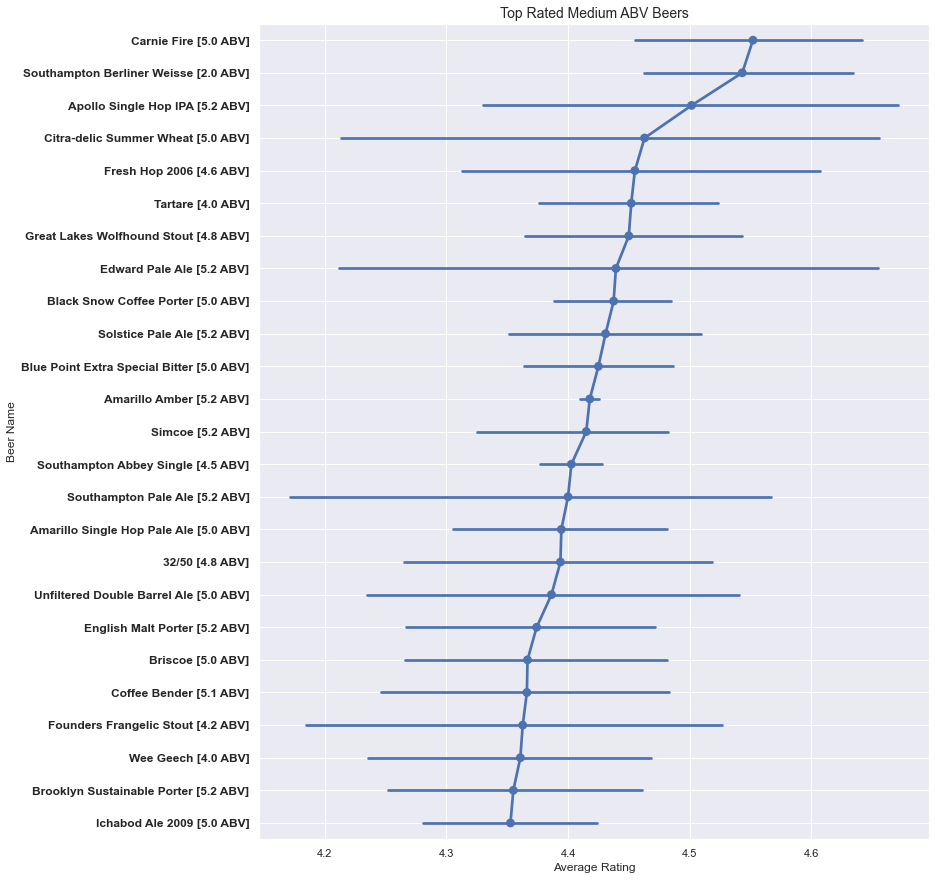

In [201]:
# plot
plt.figure(figsize=(12,15))
sns.set_theme(style='darkgrid')

ax2 = sns.pointplot(data=medianqrt_abv, x='weighted_review', y='beer_name', order=top25_median_abv.beer_name)

plt.grid(True)
plt.title('Top Rated Medium ABV Beers' , fontsize=14)
plt.ylabel('Beer Name')
plt.xlabel('Average Rating')

median_abv = top25_median_abv.beer_abv.tolist()
labels_median = [item.get_text() for item in ax2.get_yticklabels()]
labels_median_abv = [f'{label} [{median_abv[i]} ABV]' for i, label in enumerate(labels_median)]

ax2.set_yticklabels(labels_low_abv, fontdict={'fontsize':12, 'fontweight':600});

> Sweet, looks good. This plot represents the top rated beers with average ABV values. 

------

### Multivariate findings and relationships

> The realtionship looked at during this section was the correlation between `review_overall` and the variables `beer_abv`, `review_aroma`, `review_appearance`, `review_palate`, and `review_taste`, with respect to `brewery_type`. We found that 'large' breweries have the highest correlations across all variables, aside from 'proprietor' breweries who only had 117 data points with the potential for a large margin of error.  
>
> Next, we took a look at a few multivariate rankings instead of correlations. These variables were `beer_name`, `weighted_review`, and `beer_abv`, where each beer was grouped into its respective quartile in terms of `beer_abv`. The aim here was to answer practical questions a beer drinker might have about the best beers to drink for different situations. For example someone might ask, what is the best/highest rated beer to drink over the course of the day? To answer this question, you may want to look for the highest rated beers that are in the lower quartile of `beer_abv`. In other words, you would want a beer with a high rating and a relatively low ABV content, so that you could drink it over the course of a day.  
>
>These were the top rated beers for each `beer_abv` quartile: 
    > - Lower Quartile: Carnie Fire at 5.0 ABV
    > - Interquartile Range: Hoppy Birthday at 5.3 ABV
    > - Upper Quartile: Rare Bourbon County Stout at 13.0 ABV
>
> One intersting thing found in the rankings of lower quartile beers, was that the 2nd highest rated beer 'Southampton Berliner Weisse' has 2.0 ABV content, while having 4x the number of reviews as Carnie Fire (1st ranked). 
>
> When it came to the upper quartile of `beer_abv`, the top 3 ranked beers were all stouts. In addition, 16 of the top 25 beers in the upper quartile were either stouts or stout variations. From the 'Top Rated High ABV Beers' plot, there are 12 beers that have 'stout' in their name, while 4 do not, Russian Roulette, Sea Monster, Darkness - Bourbon Barrel Aged, and The Abyss. With well over half of the highest rated, high ABV beers being stouts, recommending a stout to someone looking for high ABV beers would be a safe bet.  

--------

<a id='exports'></a>
**Exports for Explanatory Analysis  <a href="#top" style="font-size :12px">(Back to top)</a>**

In [203]:
# Export clean DataFrame for slide deck
beer_df_clean.to_csv('data/processed/beer_df_clean.csv', index=False)

In [204]:
# Export state and city cleaned DataFrames for geospatial visualizations
top_states.to_csv('data/processed/state_data.csv', index=False)
top_cities.to_csv('data/processed/city_data.csv', index=False)

In [205]:
# Export ABV quartiles
top25_upper_abv.to_csv('data/processed/upper_abv.csv', index=False)
top25_median_abv.to_csv('data/processed/median_abv.csv', index=False)
top25_lower_abv.to_csv('data/processed/lower_abv.csv', index=False)

In [206]:
# Export correlation dataframes
reviewer_corr_df.to_csv('data/processed/reviewer_corr.csv', index=False)
reviewer50_corr_df.to_csv('data/processed/reviewer50_corr.csv', index=False) 
reviewer100_corr_df.to_csv('data/processed/reviewer100_corr.csv', index=False)